<a href="https://colab.research.google.com/github/itsmeayushipanday/Car_Price_Prediction/blob/main/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv(r'https://raw.githubusercontent.com/amankharwal/Website-data/master/CarPrice.csv')

In [ ]:
df.shape

(205, 26)

In [ ]:
df.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \
0        mpfi       3.47    2.68              9.0        111     5000      21   
1        mpfi       3.47    2.68              9.0        111     5000      21   
2        mpfi       2.68    3.47              9.0        154     5000      19   
3        mpfi       3.19    3.40             10.0        102     5500      24   
4        mpfi       3.19    3.40              8.0        115     5500      18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0  

[5 rows x 26 columns]

In [ ]:
df.describe()

car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    2.070000          7.000000   
25%    2145.000000   97.000000    3.150000    3.110000          8.600000   
50%    2414.000000  120.000000    3.310000    3.290000          9.000000   
75%    2935.000000  141.000000    3.580000    3.410000          9.400000   
max    4066.000000  326.000000    3.940000    4.170000         23.000000   

       horsepower      peakrpm     citympg  highwaympg         price  
count  205.000000   205.000000  205.000000  205.000000    205.000000  
mean   104.117073  5125.121951   25.219512   30.751220  13276.710571  
std     39.544167   476.985643    6.542142    6.886443   7988.852332  
min     48.000000  4150.000000   13.000000   16.000000   5118.000000  
25%     70.000000  4800.000000   19.000000   25.000000   7788.000000  
50%     95.000000  5200.000000   24.000000   30.000000  10295.000000  
75%    116.000000  5500.000000   30.000000   34.000000  16503.000000  
max    288.000000  6600.000000   49.000000   54.000000  45400.000000

In [ ]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

DATA CLEANING

In [ ]:
df.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \
0        mpfi       3.47    2.68              9.0        111     5000      21   
1        mpfi       3.47    2.68              9.0        111     5000      21   
2        mpfi       2.68    3.47              9.0        154     5000      19   
3        mpfi       3.19    3.40             10.0        102     5500      24   
4        mpfi       3.19    3.40              8.0        115     5500      18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0  

[5 rows x 26 columns]

In [ ]:
df.drop('car_ID', axis=1, inplace=True)

In [ ]:
df.isnull().sum().sort_values(ascending=False)

symboling           0
enginetype          0
highwaympg          0
citympg             0
peakrpm             0
horsepower          0
compressionratio    0
stroke              0
boreratio           0
fuelsystem          0
enginesize          0
cylindernumber      0
curbweight          0
CarName             0
carheight           0
carwidth            0
carlength           0
wheelbase           0
enginelocation      0
drivewheel          0
carbody             0
doornumber          0
aspiration          0
fueltype            0
price               0
dtype: int64

In [ ]:
df.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [ ]:
for i in df.columns:
  print(df[i].value_counts())
  print("_______________________")

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64
_______________________
toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: CarName, Length: 147, dtype: int64
_______________________
gas       185
diesel     20
Name: fueltype, dtype: int64
_______________________
std      168
turbo     37
Name: aspiration, dtype: int64
_______________________
four    115
two      90
Name: doornumber, dtype: int64
_______________________
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64
_______________________
fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64
_______________________
front    202
rear       3
Name: enginelocation, dtype: int64
_________

<Axes: >

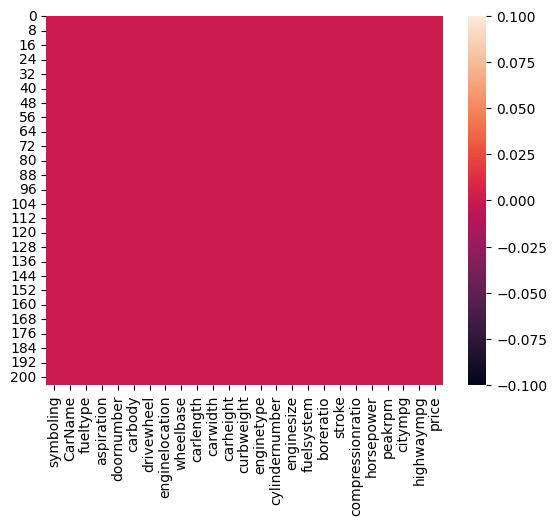

In [ ]:
sns.heatmap(df.isnull())

In [ ]:
details=[ 'fueltype', 'aspiration', 'doornumber','carbody', 'drivewheel', 'wheelbase', 'carlength','carwidth',
         'carheight','enginelocation','enginetype', 'cylindernumber','fuelsystem','enginesize','peakrpm', 'citympg',
         'highwaympg','boreratio', 'stroke', 'compressionratio','horsepower']

gas       185
diesel     20
Name: fueltype, dtype: int64


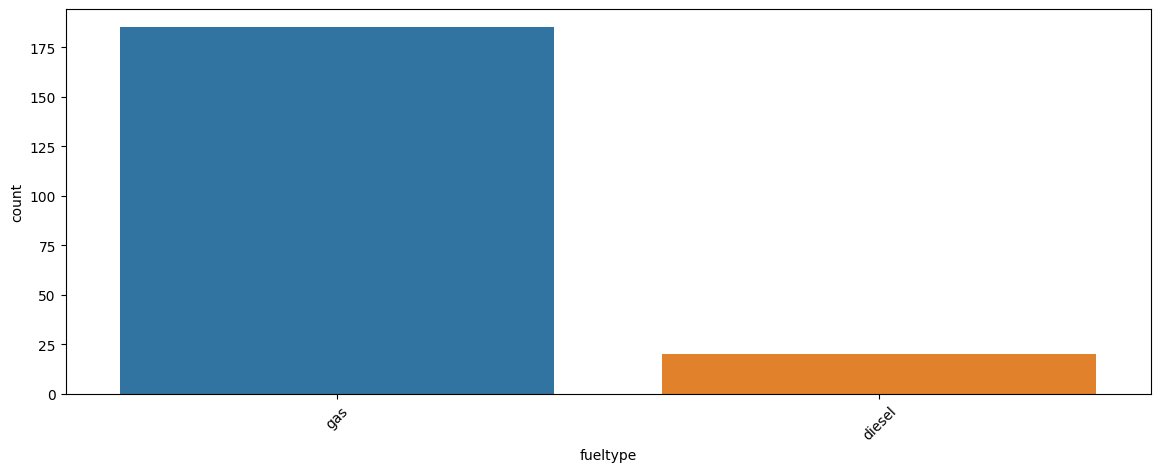

___________________________________
std      168
turbo     37
Name: aspiration, dtype: int64


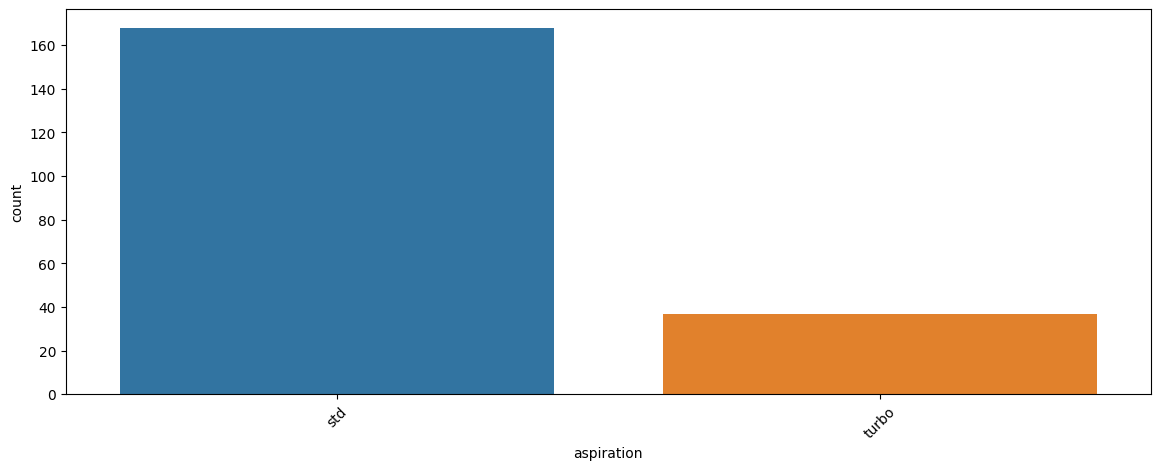

___________________________________
four    115
two      90
Name: doornumber, dtype: int64


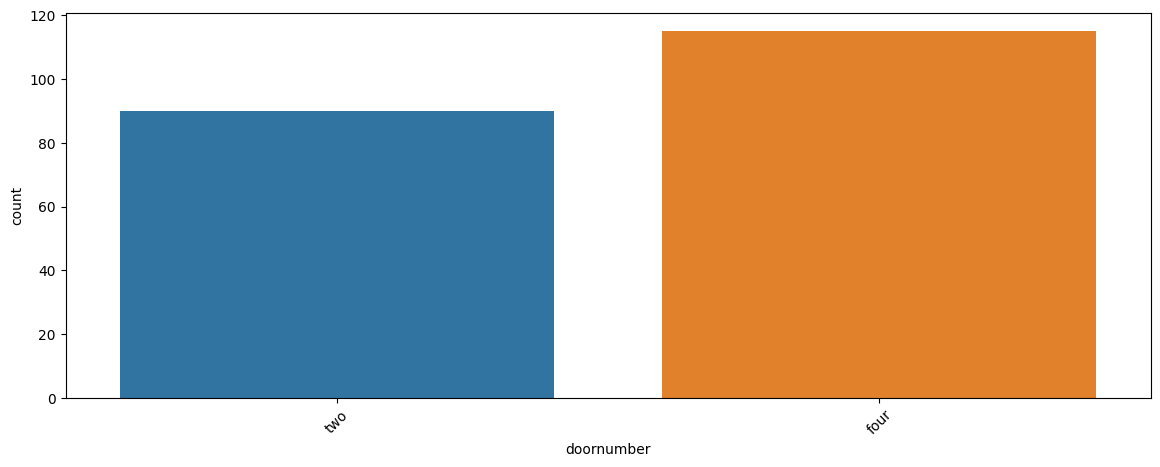

___________________________________
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64


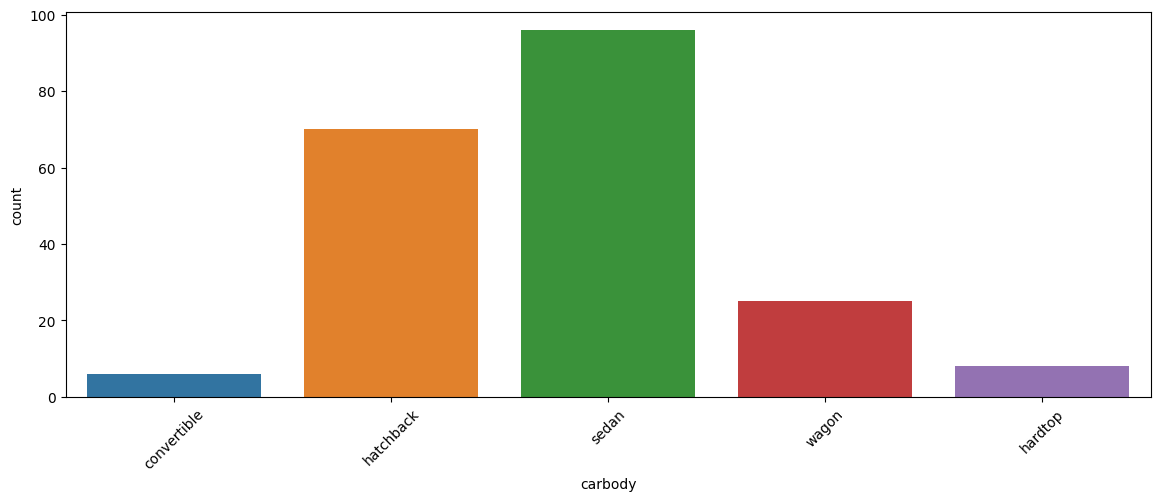

___________________________________
fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64


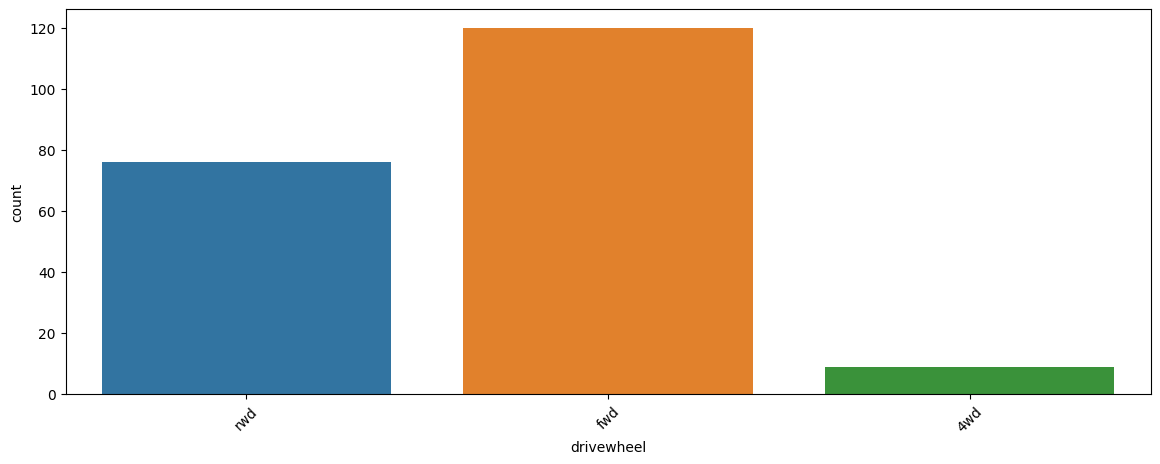

___________________________________
94.5     21
93.7     20
95.7     13
96.5      8
97.3      7
98.4      7
104.3     6
100.4     6
107.9     6
98.8      6
99.1      6
96.3      6
109.1     5
93.1      5
97.2      5
95.9      5
102.4     5
97.0      4
95.3      4
114.2     4
101.2     4
110.0     3
103.5     3
89.5      3
105.8     3
96.1      2
102.9     2
104.5     2
91.3      2
96.9      2
88.6      2
113.0     2
99.8      2
115.6     2
103.3     2
86.6      2
104.9     2
93.3      1
99.4      1
99.5      1
88.4      1
94.3      1
96.0      1
95.1      1
93.0      1
102.0     1
106.7     1
108.0     1
96.6      1
99.2      1
112.0     1
102.7     1
120.9     1
Name: wheelbase, dtype: int64


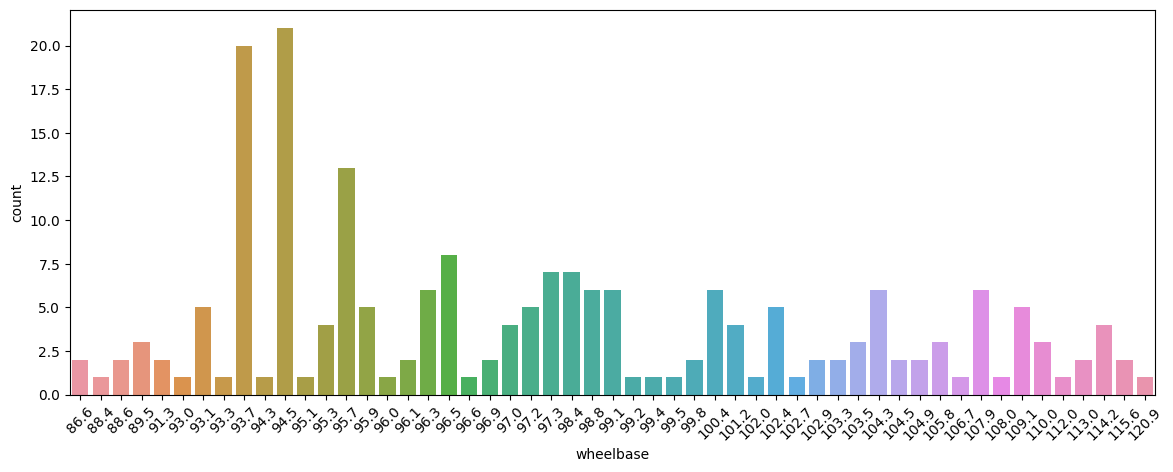

___________________________________
157.3    15
188.8    11
171.7     7
186.7     7
166.3     7
         ..
165.6     1
187.5     1
180.3     1
208.1     1
199.2     1
Name: carlength, Length: 75, dtype: int64


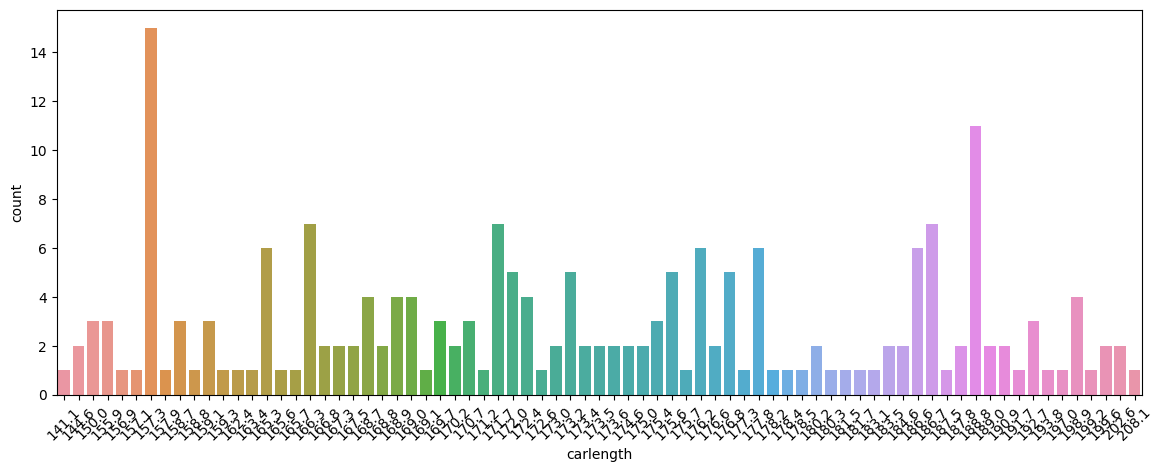

___________________________________
63.8    24
66.5    23
65.4    15
63.6    11
64.4    10
68.4    10
64.0     9
65.5     8
65.2     7
64.2     6
66.3     6
65.6     6
67.2     6
67.9     5
66.9     5
65.7     4
68.9     4
64.8     4
63.9     3
70.3     3
71.7     3
71.4     3
65.0     3
68.3     2
67.7     2
64.1     2
66.1     2
69.6     2
64.6     2
72.0     1
68.0     1
70.5     1
61.8     1
66.0     1
62.5     1
70.6     1
72.3     1
66.6     1
63.4     1
60.3     1
70.9     1
66.4     1
66.2     1
68.8     1
Name: carwidth, dtype: int64


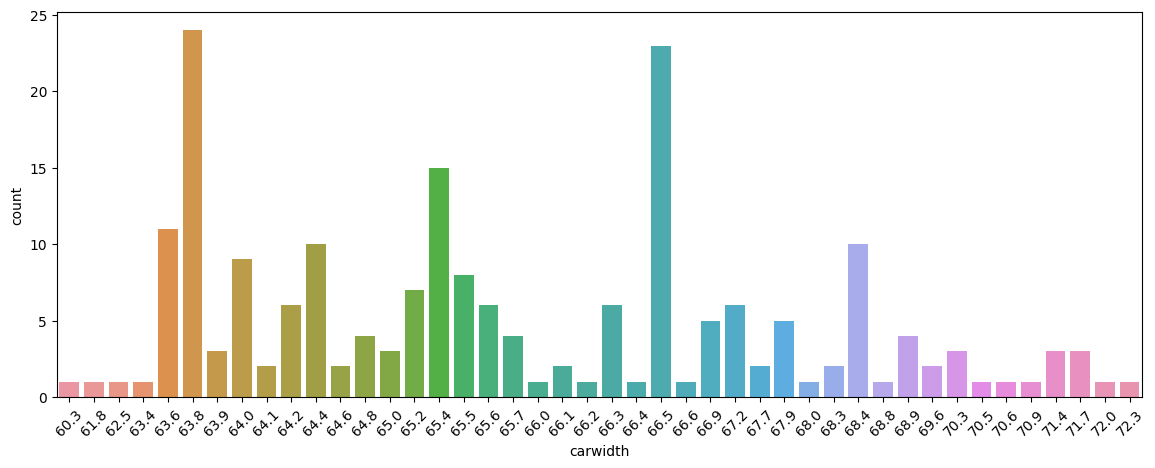

___________________________________
50.8    14
52.0    12
55.7    12
54.1    10
54.5    10
55.5     9
56.7     8
54.3     8
52.6     7
56.1     7
51.6     7
53.0     6
52.8     6
54.9     6
50.2     6
53.7     5
55.1     5
50.6     5
49.6     4
58.7     4
53.3     4
52.5     3
59.1     3
56.2     3
49.7     3
57.5     3
53.5     3
54.4     2
53.9     2
56.3     2
50.5     2
59.8     2
56.5     2
54.7     2
48.8     2
49.4     2
51.4     2
51.0     1
54.8     1
55.4     1
56.0     1
55.2     1
53.2     1
47.8     1
55.9     1
52.4     1
55.6     1
53.1     1
58.3     1
Name: carheight, dtype: int64


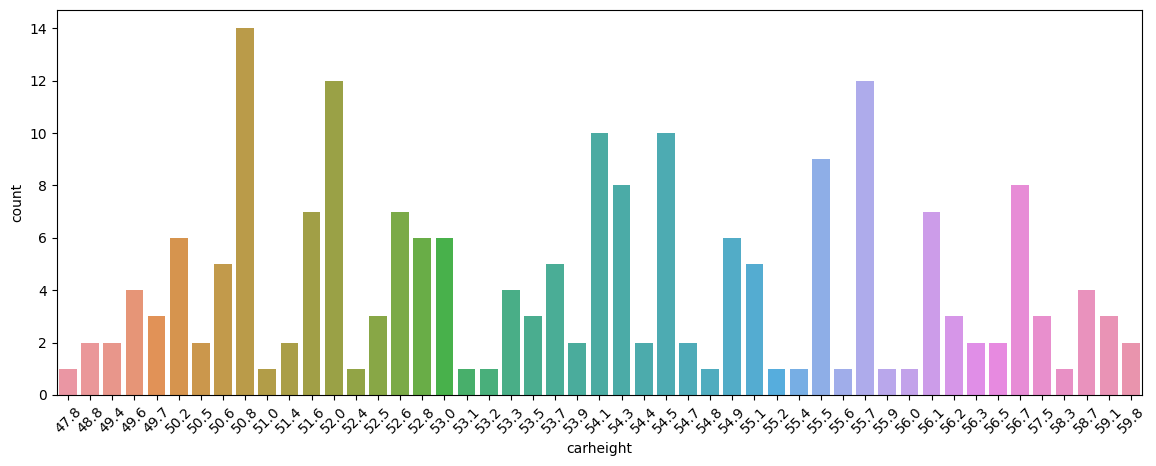

___________________________________
front    202
rear       3
Name: enginelocation, dtype: int64


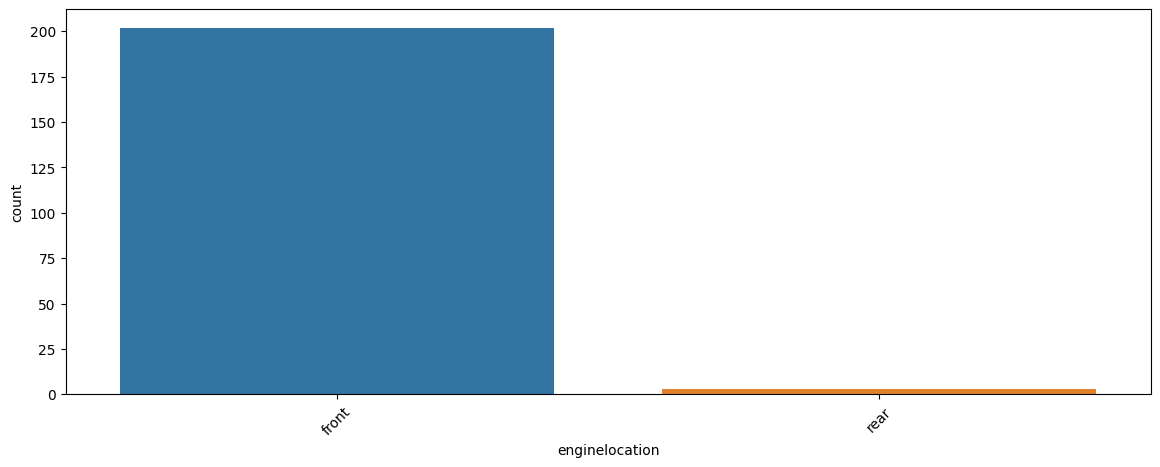

___________________________________
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64


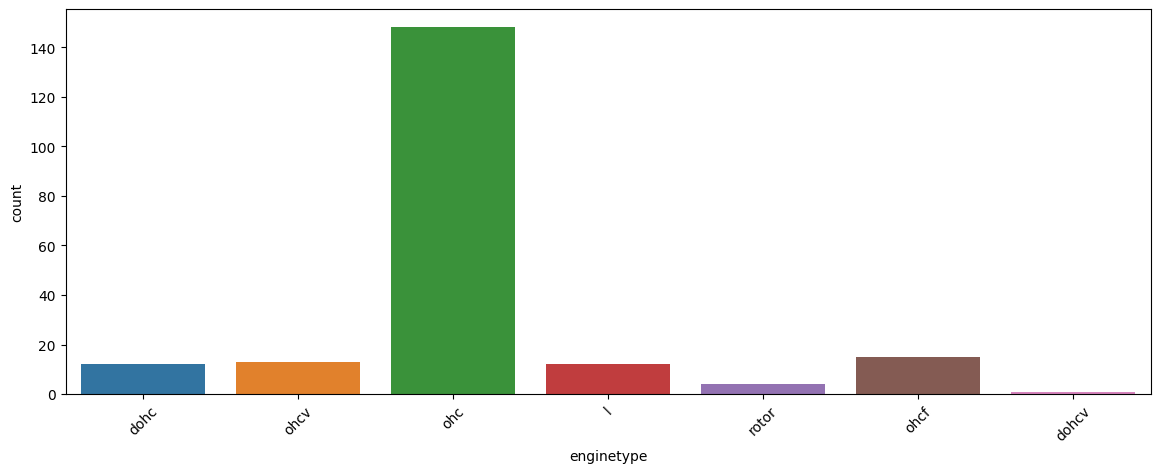

___________________________________
four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64


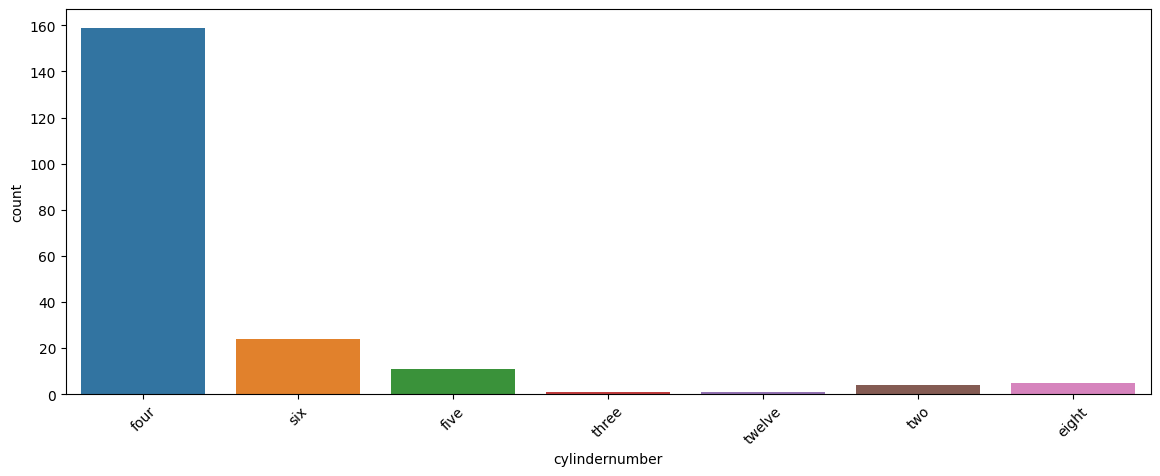

___________________________________
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64


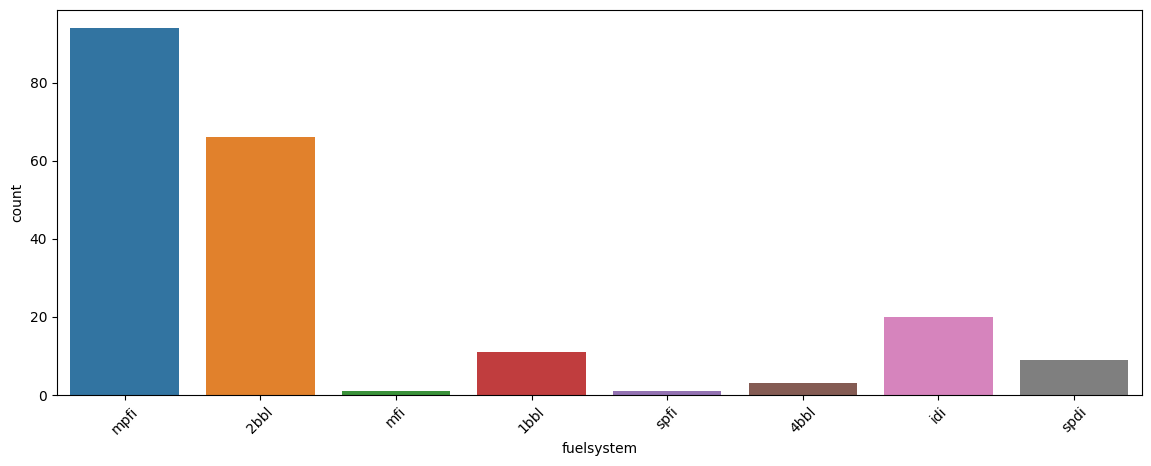

___________________________________
122    15
92     15
97     14
98     14
108    13
90     12
110    12
109     8
120     7
141     7
152     6
181     6
146     6
121     6
156     5
136     5
91      5
183     4
130     4
171     3
70      3
194     3
209     3
164     3
258     2
140     2
134     2
234     2
132     2
131     2
173     1
203     1
161     1
80      1
151     1
103     1
304     1
308     1
326     1
119     1
111     1
79      1
61      1
145     1
Name: enginesize, dtype: int64


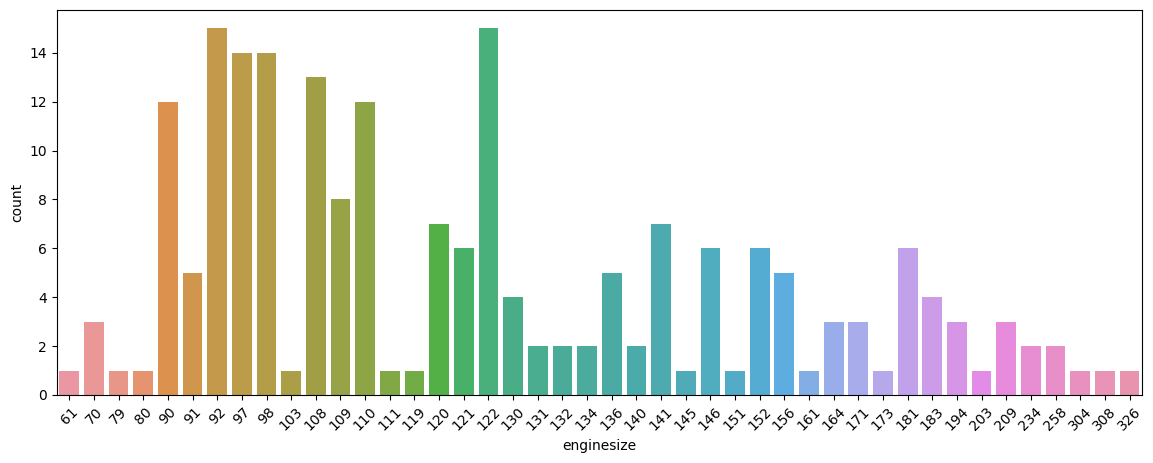

___________________________________
5500    37
4800    36
5000    27
5200    23
5400    13
6000     9
4500     7
5800     7
5250     7
5100     5
4150     5
4200     5
4350     4
4750     4
5900     3
4250     3
4400     3
6600     2
4650     1
5600     1
5750     1
4900     1
5300     1
Name: peakrpm, dtype: int64


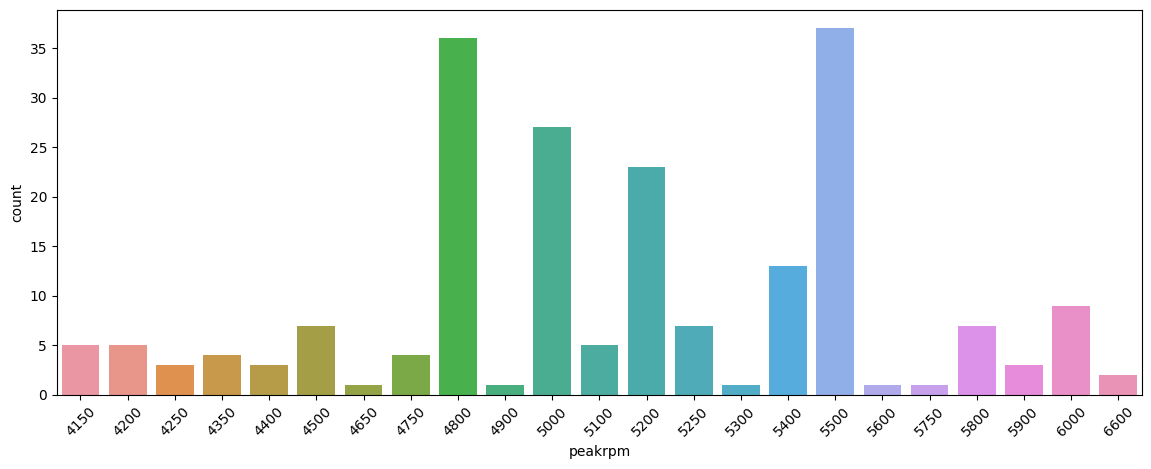

___________________________________
31    28
19    27
24    22
27    14
17    13
26    12
23    12
21     8
25     8
30     8
38     7
28     7
16     6
37     6
22     4
29     3
15     3
20     3
18     3
14     2
34     1
35     1
32     1
36     1
45     1
13     1
49     1
47     1
33     1
Name: citympg, dtype: int64


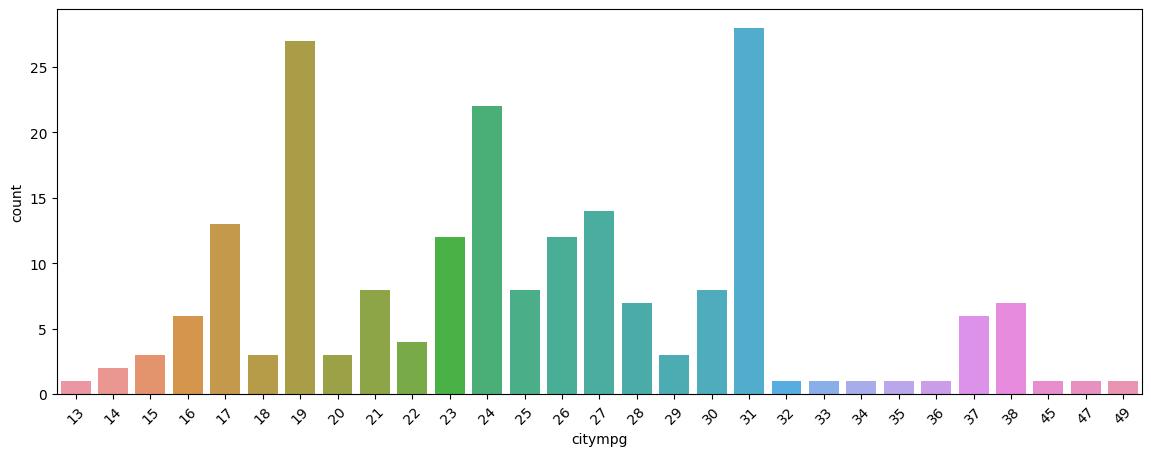

___________________________________
25    19
38    17
24    17
30    16
32    16
34    14
37    13
28    13
29    10
33     9
22     8
31     8
23     7
27     5
43     4
42     3
26     3
41     3
19     2
39     2
18     2
16     2
20     2
36     2
47     2
46     2
54     1
17     1
53     1
50     1
Name: highwaympg, dtype: int64


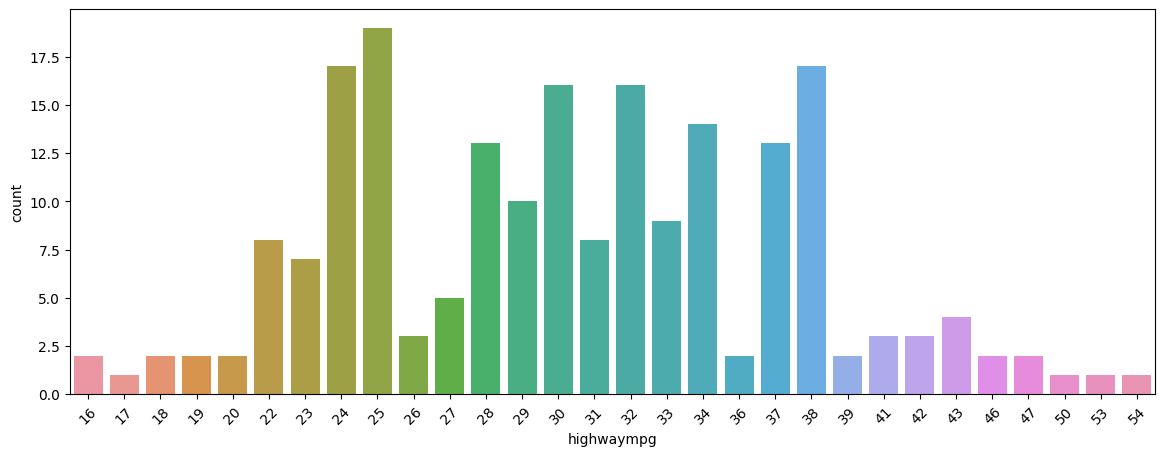

___________________________________
3.62    23
3.19    20
3.15    15
3.03    12
2.97    12
3.46     9
3.31     8
3.43     8
3.78     8
3.27     7
2.91     7
3.58     6
3.39     6
3.33     6
3.05     6
3.54     6
3.70     5
3.01     5
3.35     4
3.17     3
3.59     3
3.74     3
3.47     2
3.94     2
3.24     2
3.63     2
3.13     2
3.80     2
3.50     2
2.54     1
3.08     1
3.61     1
3.34     1
2.68     1
3.60     1
2.92     1
3.76     1
2.99     1
Name: boreratio, dtype: int64


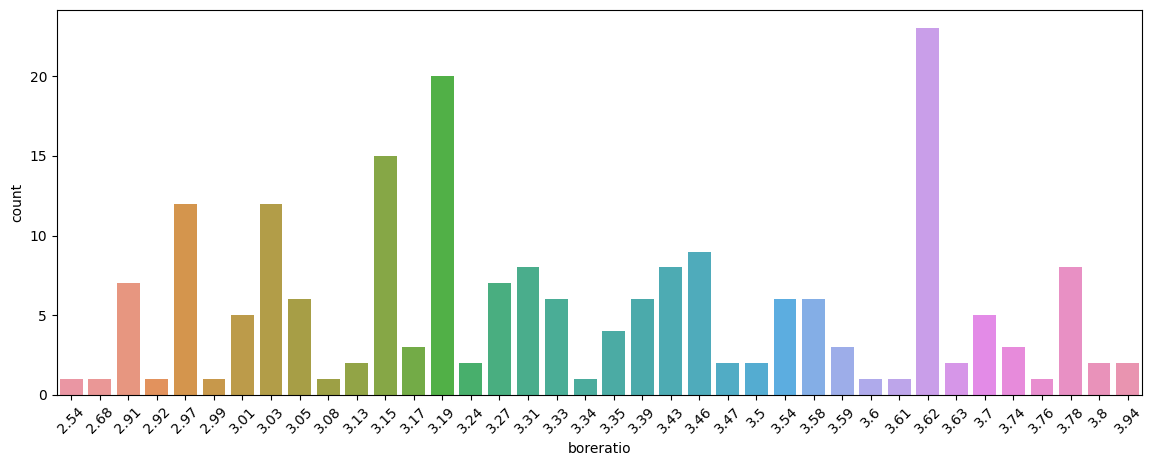

___________________________________
3.400    20
3.230    14
3.150    14
3.030    14
3.390    13
2.640    11
3.290     9
3.350     9
3.460     8
3.110     6
3.270     6
3.410     6
3.070     6
3.580     6
3.190     6
3.500     6
3.640     5
3.520     5
3.860     4
3.540     4
3.470     4
3.255     4
3.900     3
2.900     3
3.100     2
4.170     2
2.800     2
2.190     2
3.080     2
2.680     2
2.360     1
3.160     1
2.070     1
3.210     1
3.120     1
2.760     1
2.870     1
Name: stroke, dtype: int64


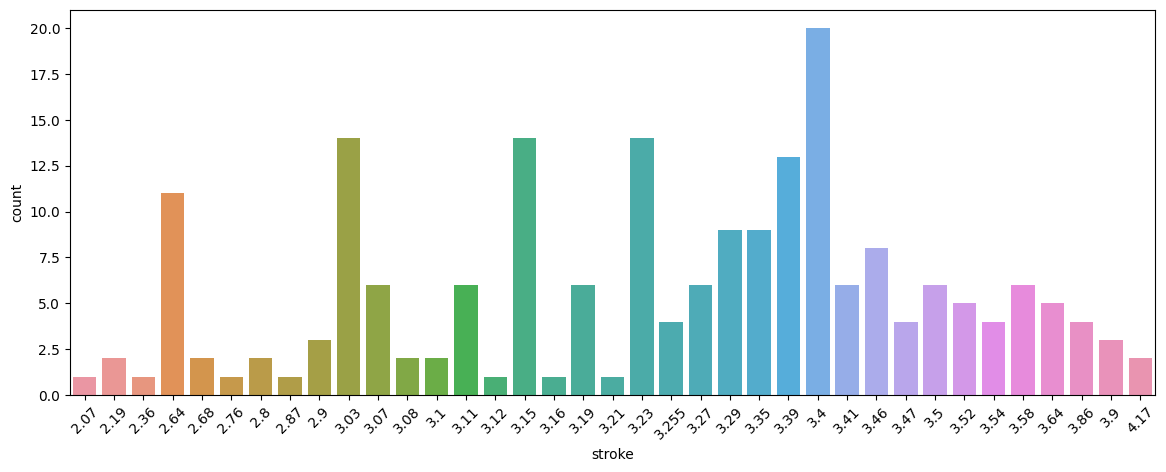

___________________________________
9.00     46
9.40     26
8.50     14
9.50     13
9.30     11
8.70      9
8.00      8
9.20      8
7.00      7
8.60      5
21.00     5
8.40      5
7.50      5
23.00     5
9.60      5
21.50     4
7.60      4
10.00     3
22.50     3
8.30      3
8.80      3
7.70      2
8.10      2
9.10      1
9.31      1
7.80      1
9.41      1
21.90     1
22.00     1
22.70     1
10.10     1
11.50     1
Name: compressionratio, dtype: int64


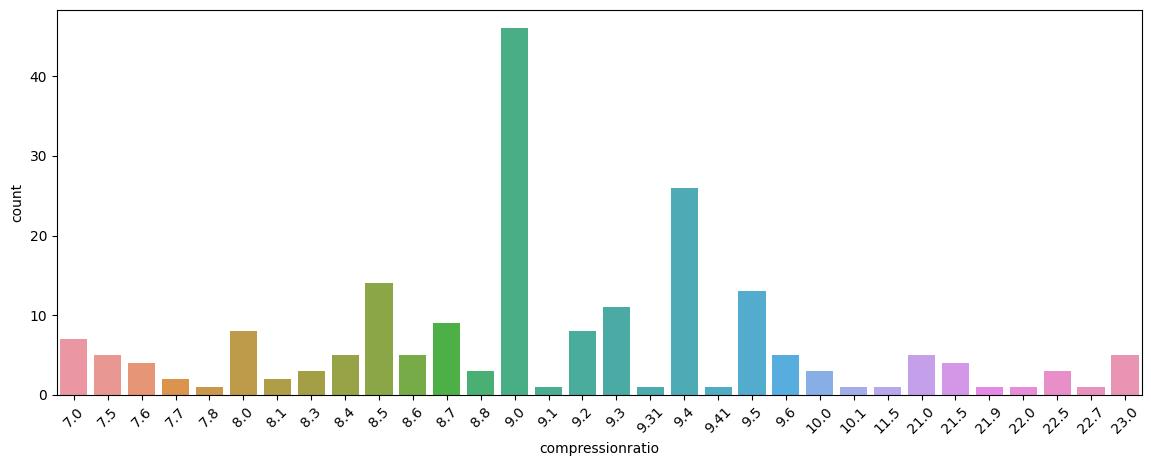

___________________________________
68     19
70     11
69     10
116     9
110     8
95      7
114     6
160     6
101     6
62      6
88      6
145     5
76      5
97      5
84      5
90      5
82      5
102     5
92      4
111     4
123     4
86      4
207     3
73      3
182     3
121     3
85      3
152     3
176     2
94      2
56      2
112     2
161     2
184     2
155     2
156     2
52      2
100     2
162     2
140     1
115     1
134     1
78      1
142     1
288     1
143     1
48      1
200     1
58      1
55      1
60      1
175     1
154     1
72      1
120     1
64      1
135     1
262     1
106     1
Name: horsepower, dtype: int64


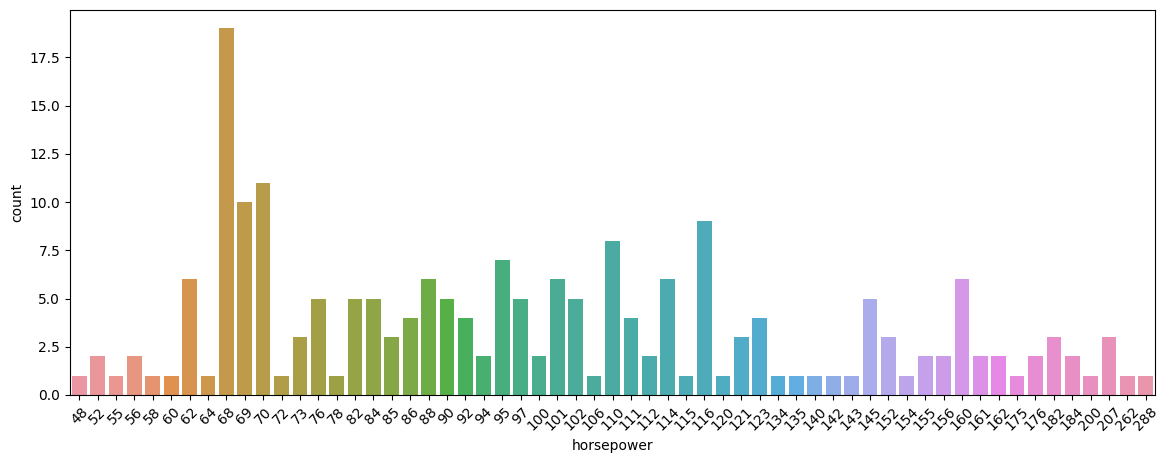

___________________________________


In [ ]:
for column in details:
  print(df[column].value_counts())
  plt.figure(figsize=(14,5))
  sns.countplot(x=df[column])
  plt.xticks(rotation=45)
  plt.show()
  print("___________________________________")

array([[<Axes: title={'center': 'symboling'}>,
        <Axes: title={'center': 'wheelbase'}>,
        <Axes: title={'center': 'carlength'}>,
        <Axes: title={'center': 'carwidth'}>],
       [<Axes: title={'center': 'carheight'}>,
        <Axes: title={'center': 'curbweight'}>,
        <Axes: title={'center': 'enginesize'}>,
        <Axes: title={'center': 'boreratio'}>],
       [<Axes: title={'center': 'stroke'}>,
        <Axes: title={'center': 'compressionratio'}>,
        <Axes: title={'center': 'horsepower'}>,
        <Axes: title={'center': 'peakrpm'}>],
       [<Axes: title={'center': 'citympg'}>,
        <Axes: title={'center': 'highwaympg'}>,
        <Axes: title={'center': 'price'}>, <Axes: >]], dtype=object)

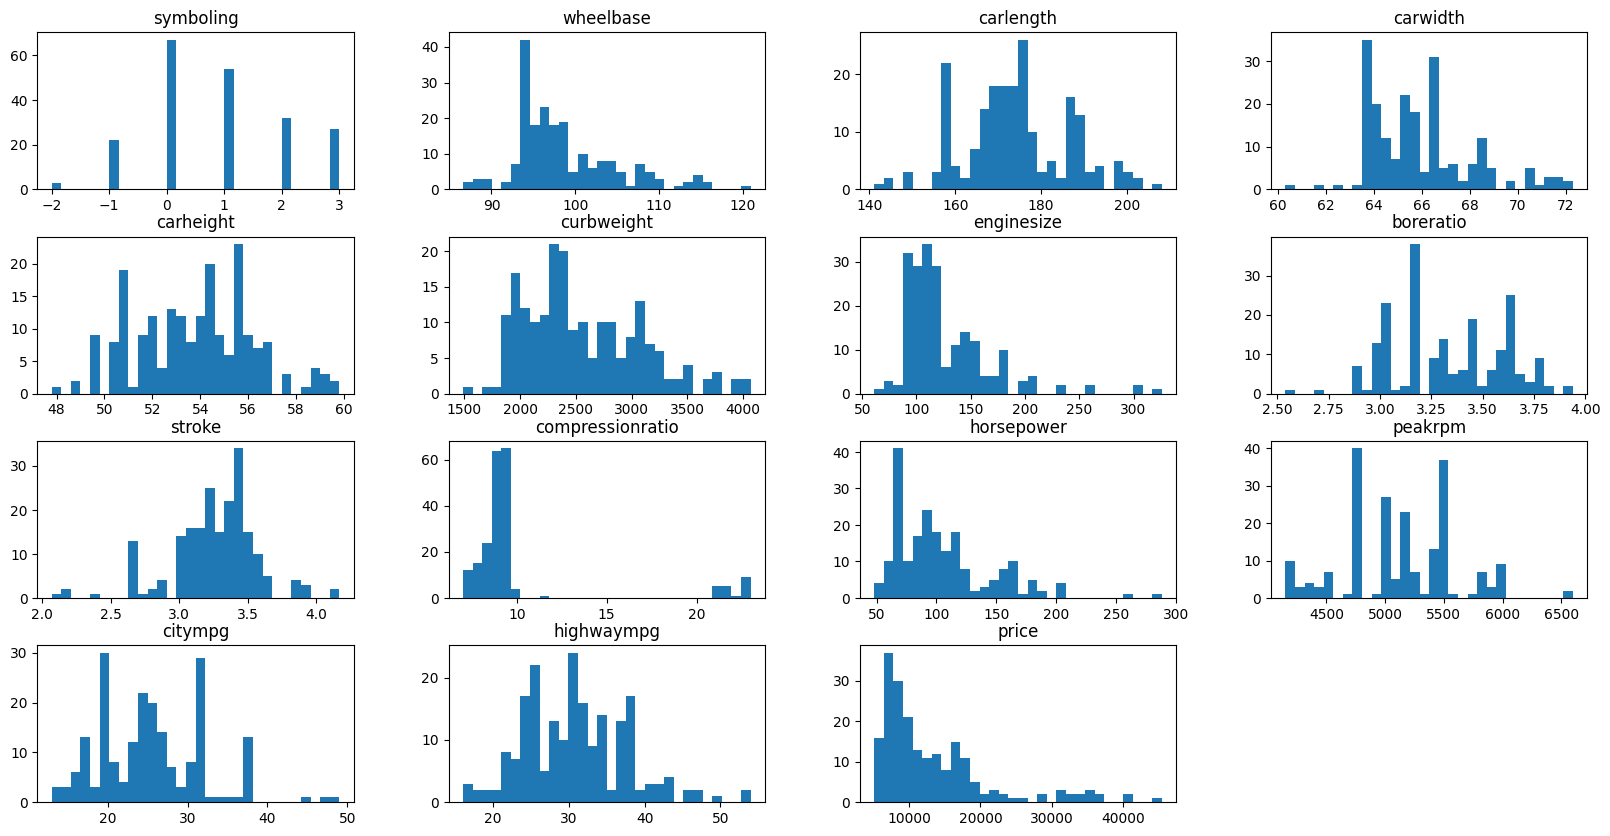

In [ ]:
df.hist(figsize=(20,10), grid=False,layout=(4,4),bins=30)

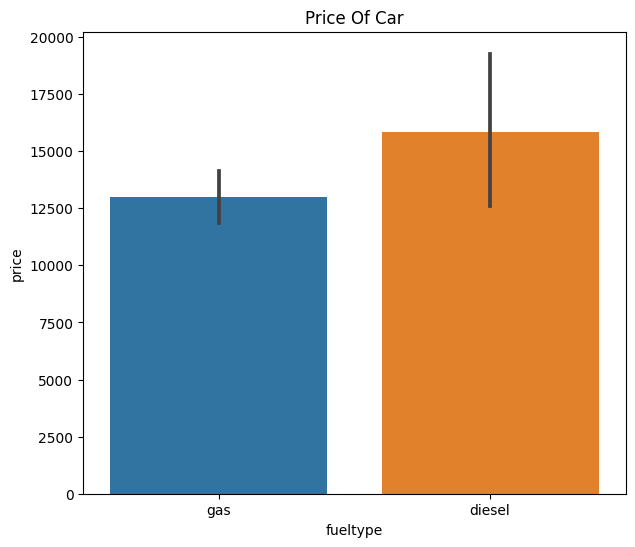

In [ ]:
plt.figure(figsize=[7,6])
sns.barplot(x='fueltype', y='price', data = df.sort_values('price', ascending=False))
plt.title("Price Of Car")
plt.show()

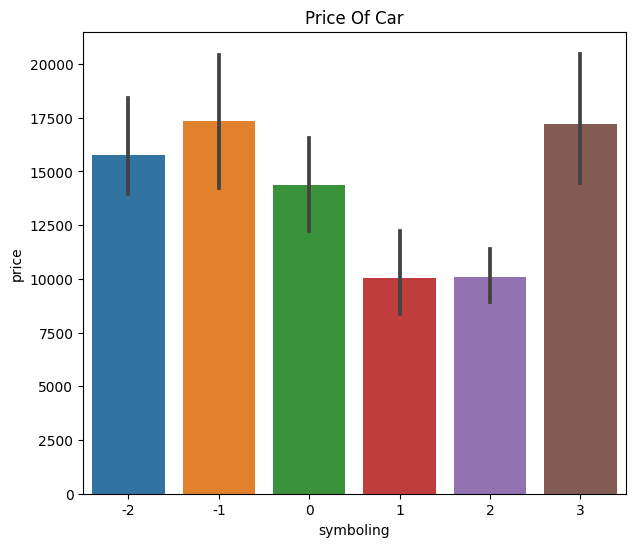

In [ ]:
plt.figure(figsize=[7,6])
sns.barplot(x='symboling', y='price', data = df.sort_values('price', ascending=True))
plt.title("Price Of Car")
plt.show()

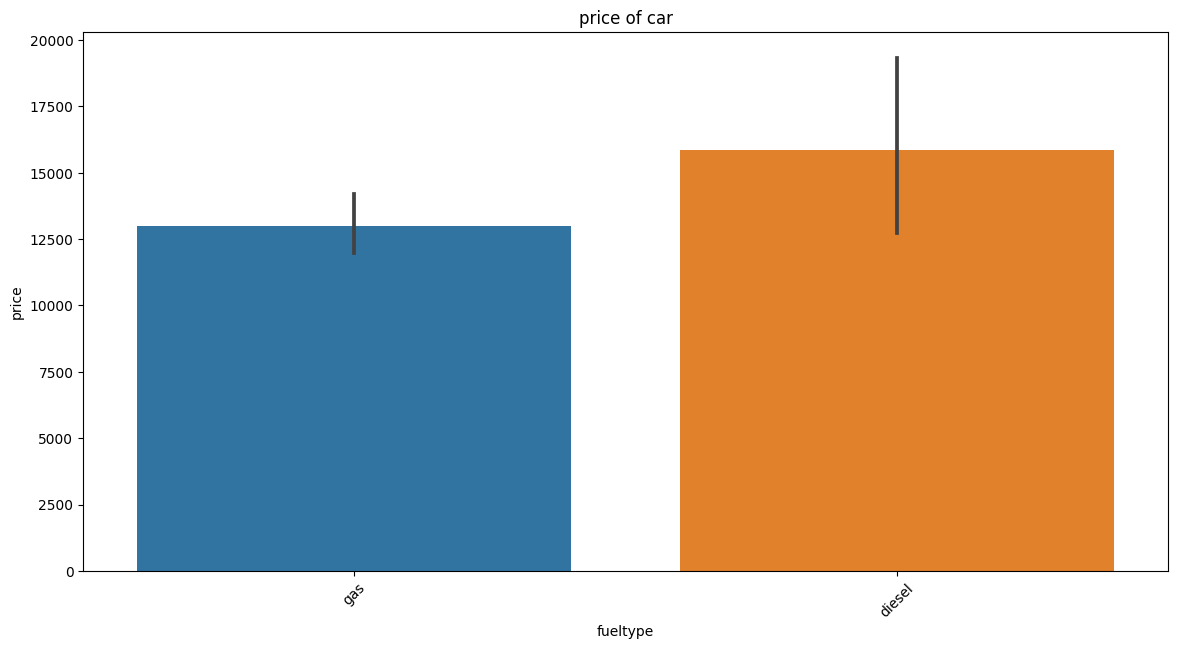

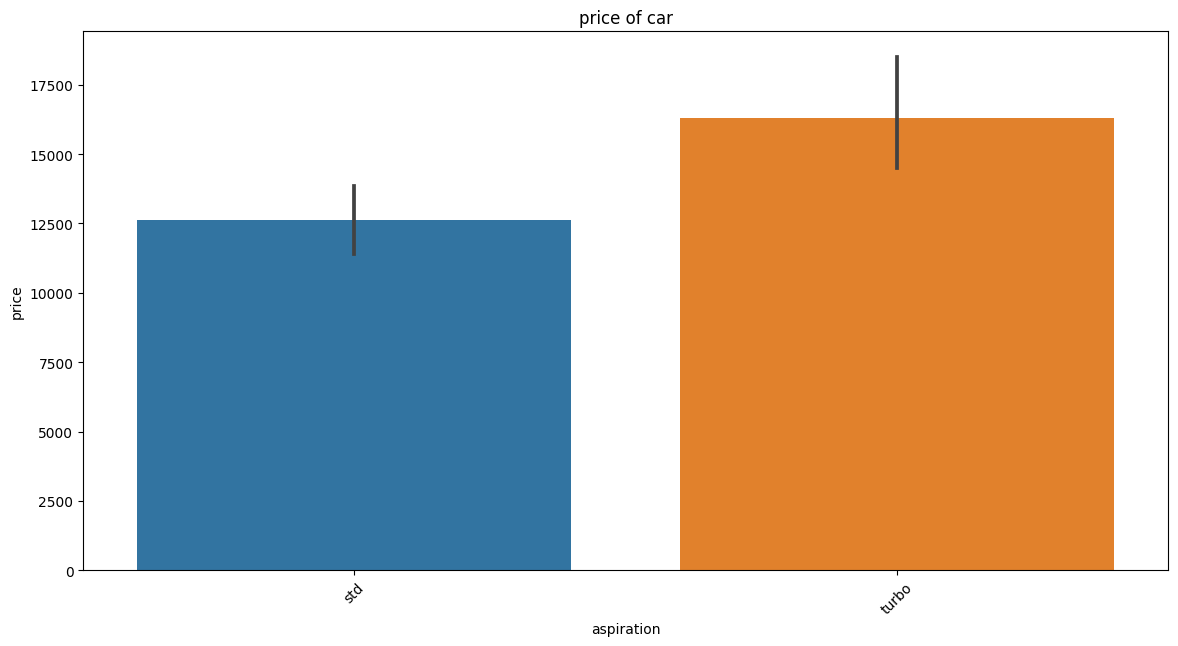

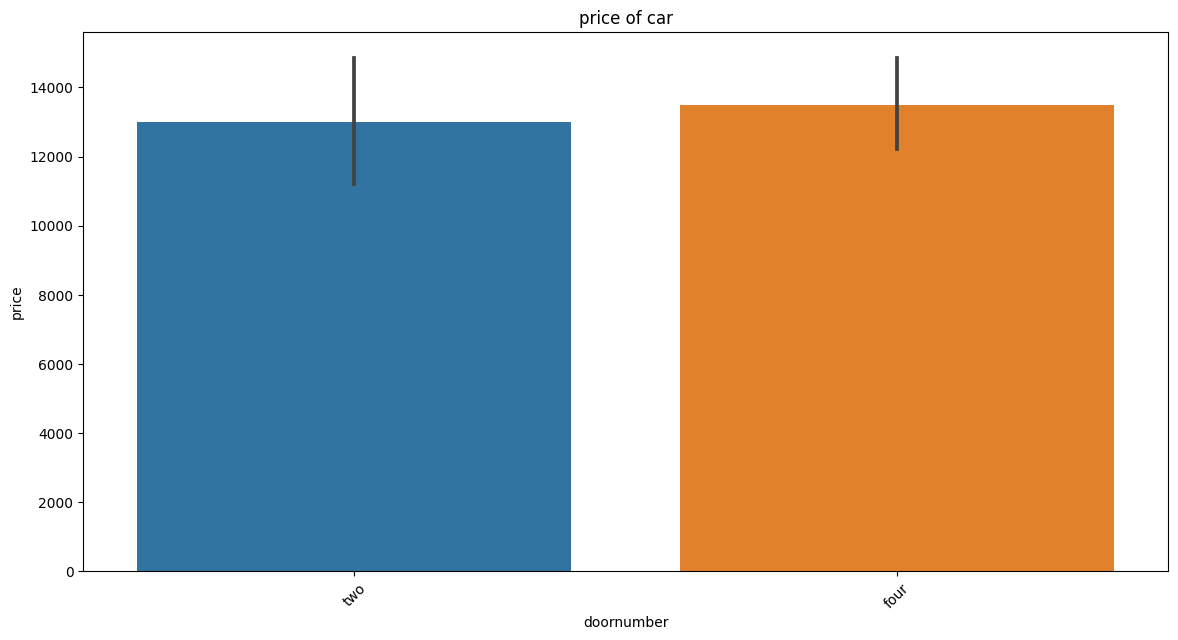

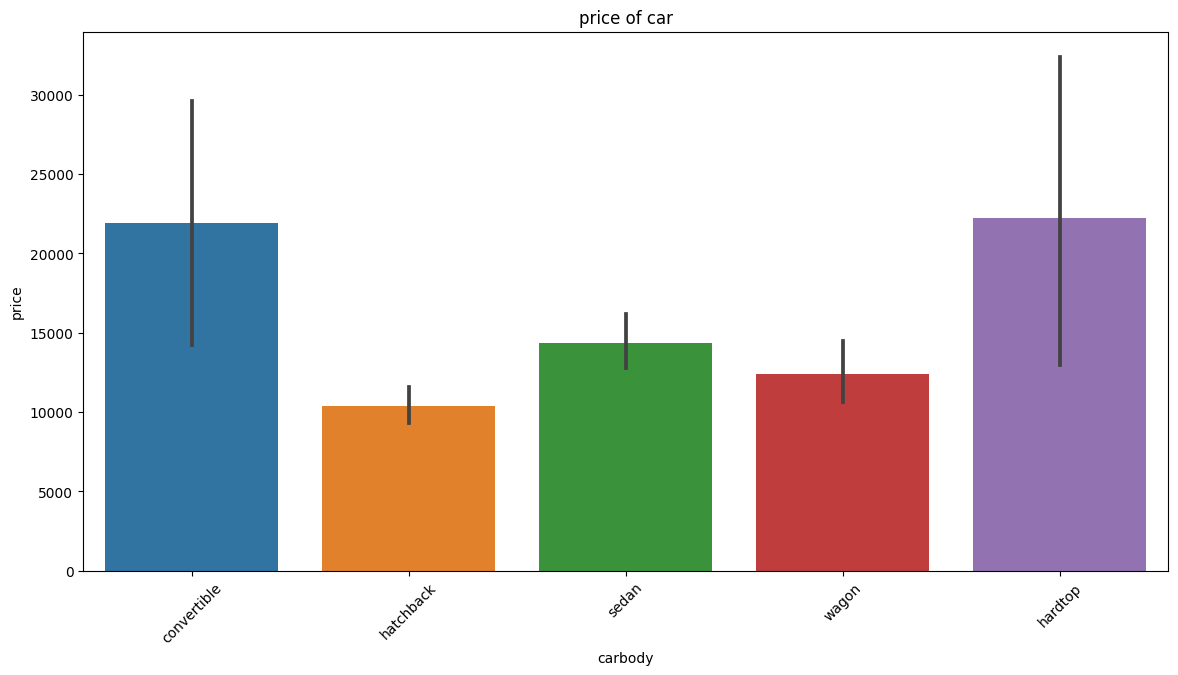

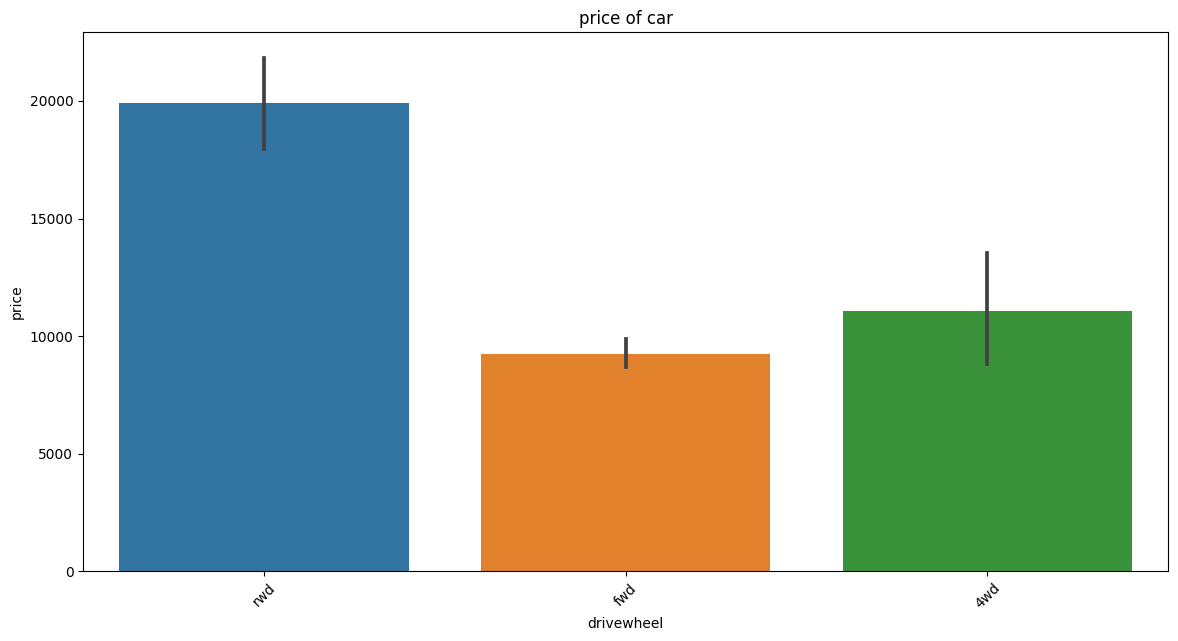

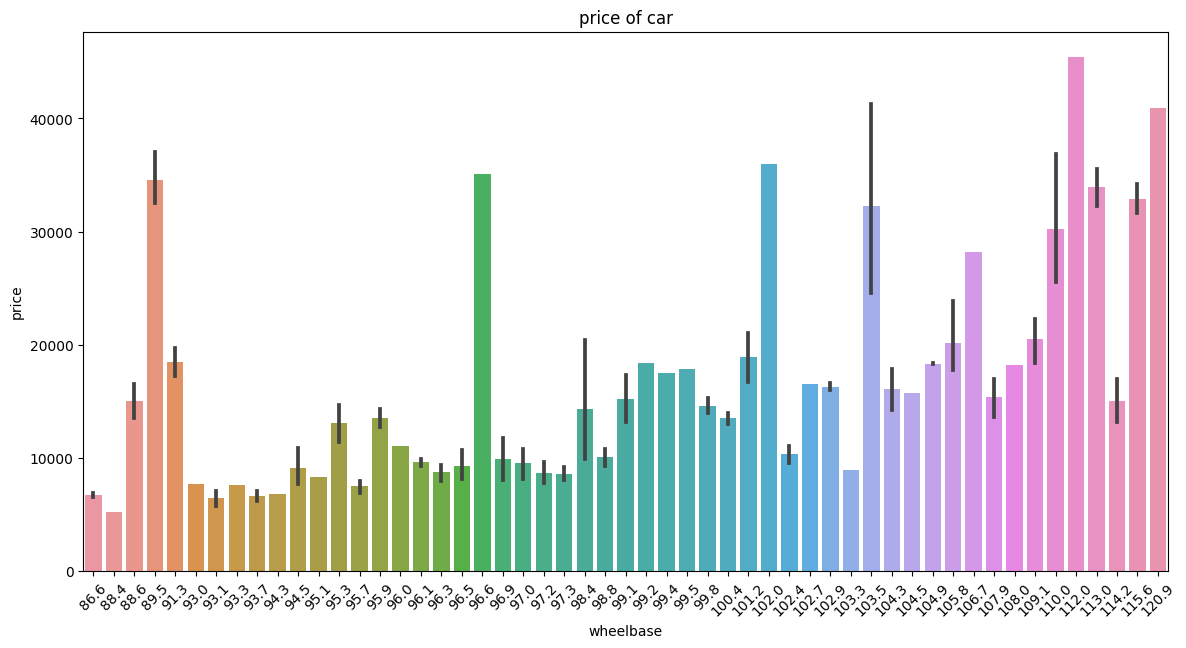

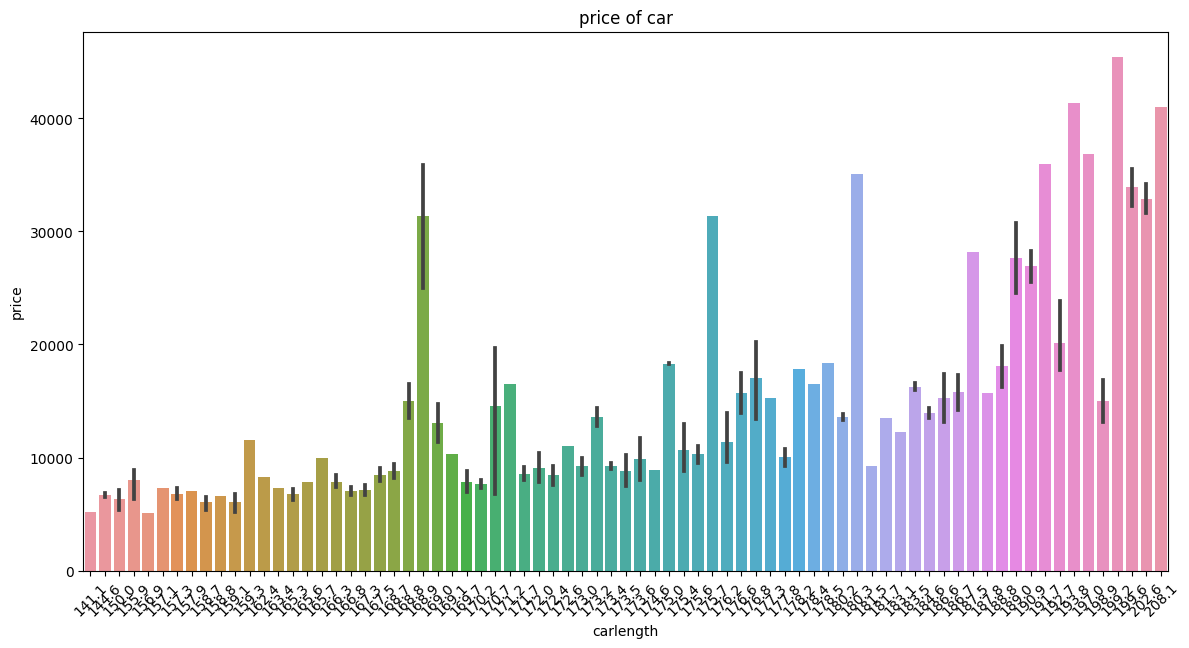

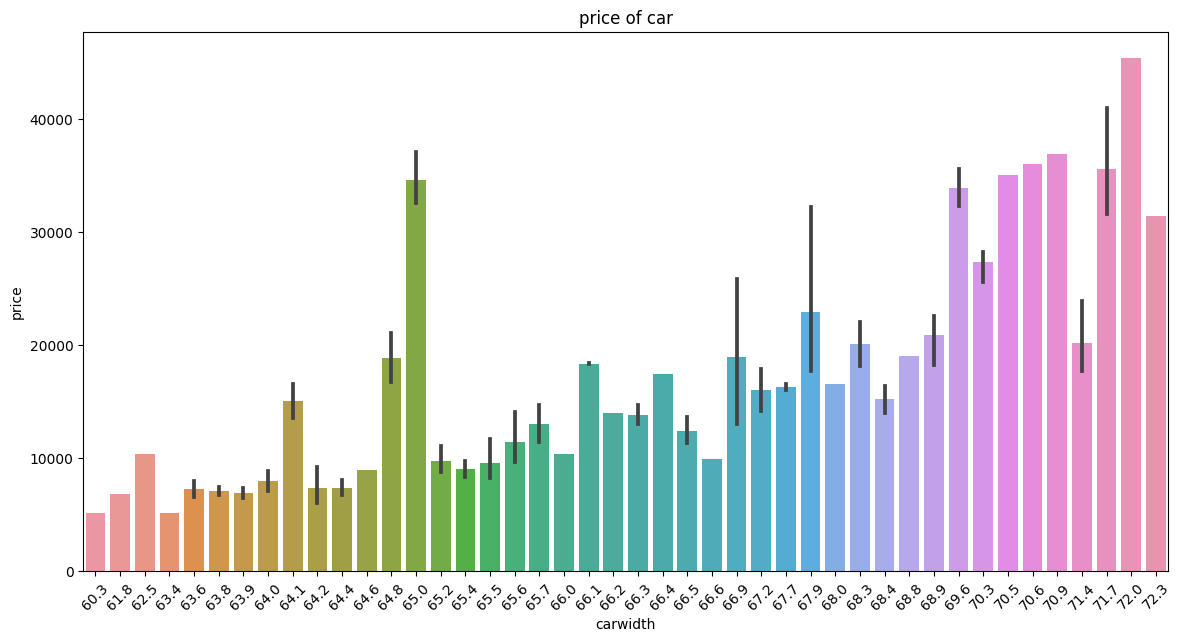

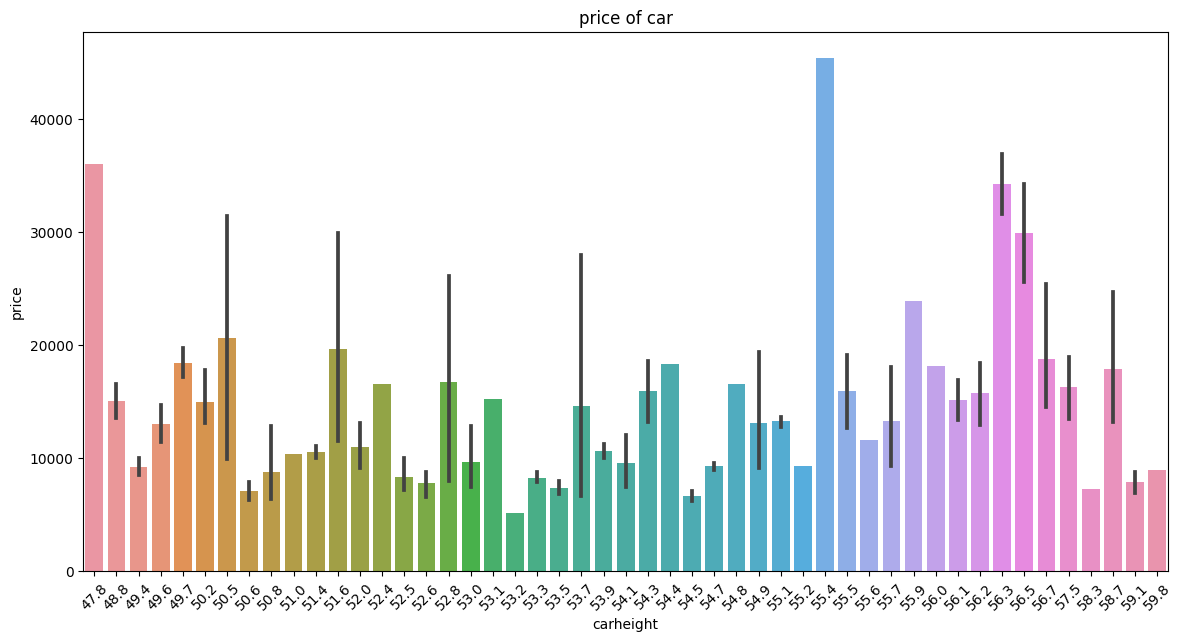

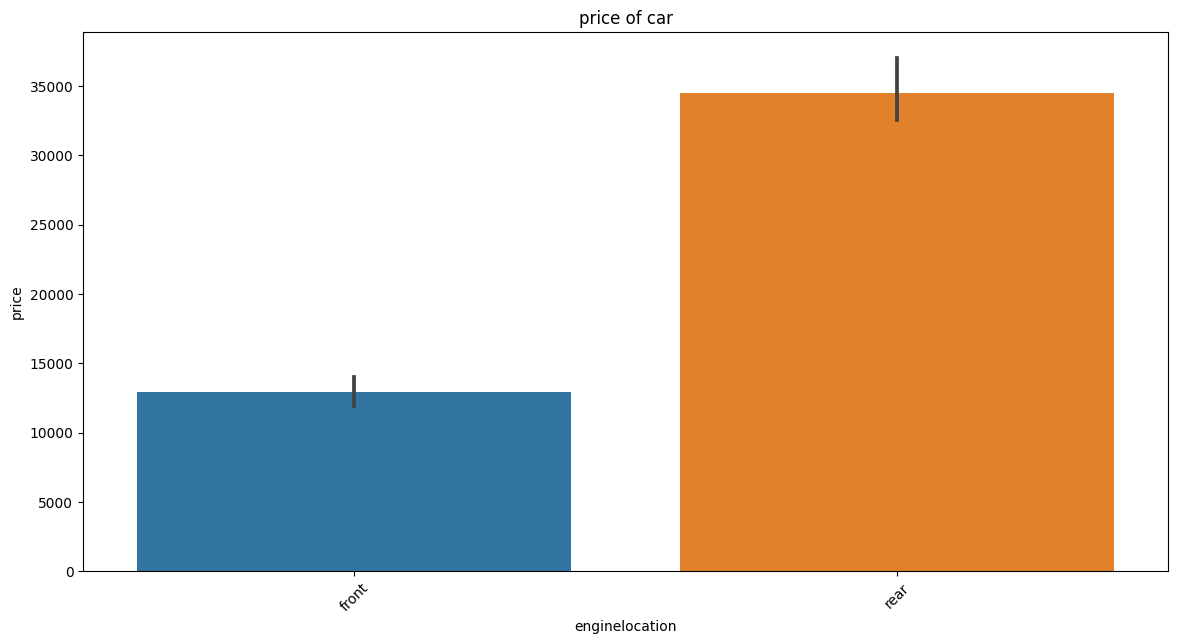

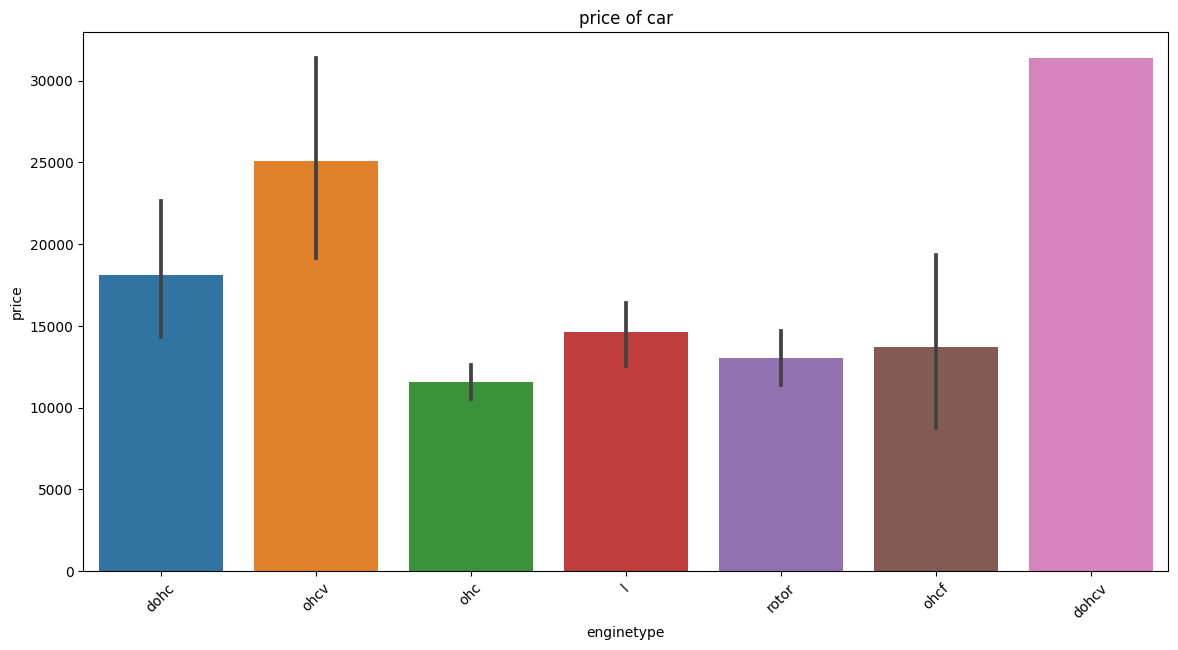

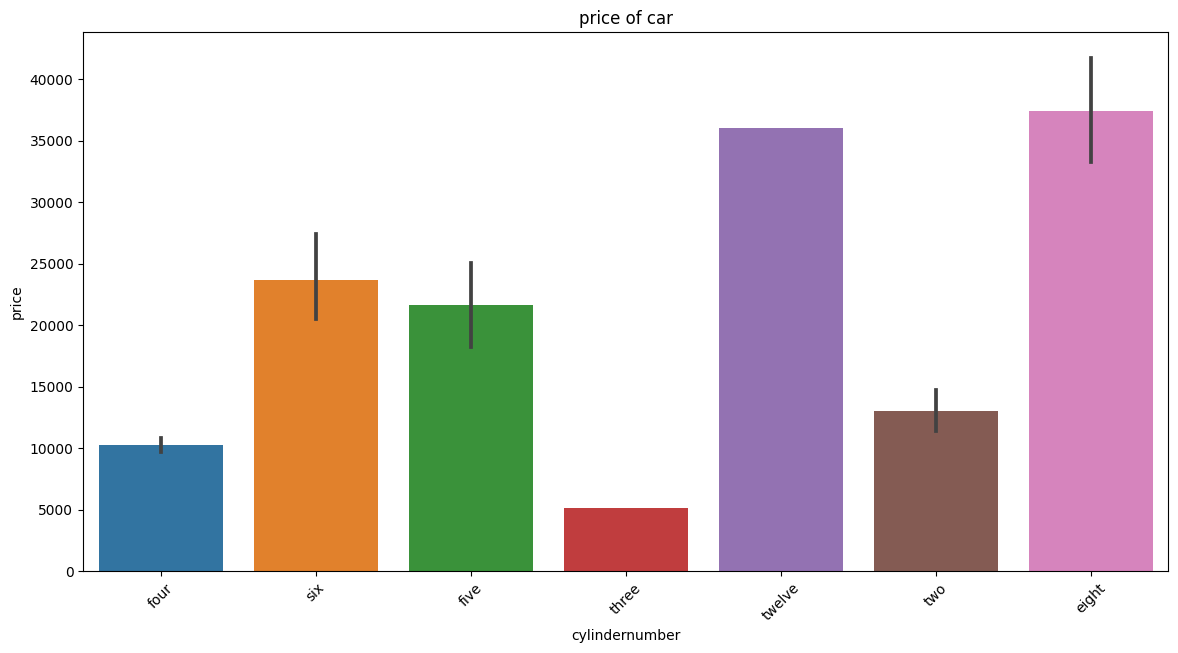

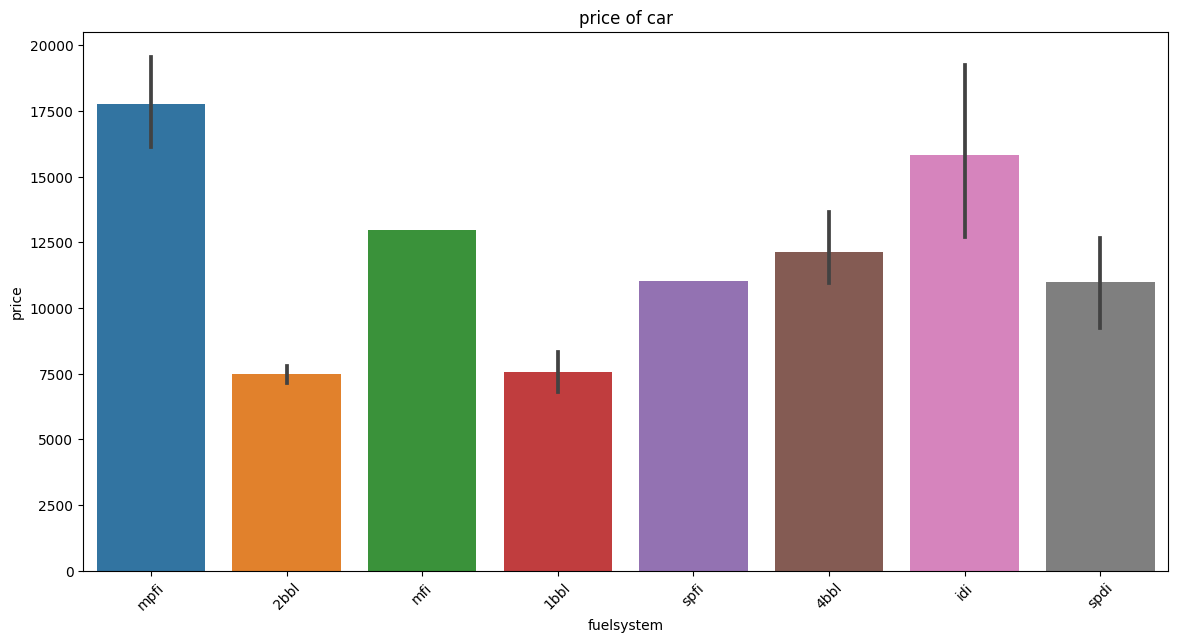

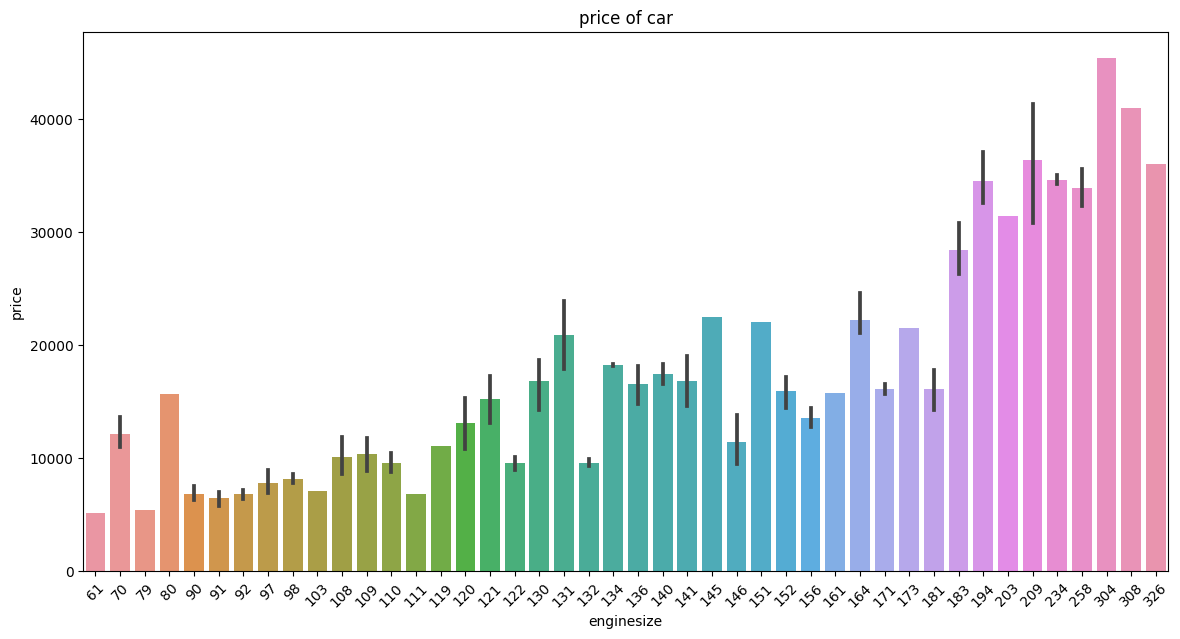

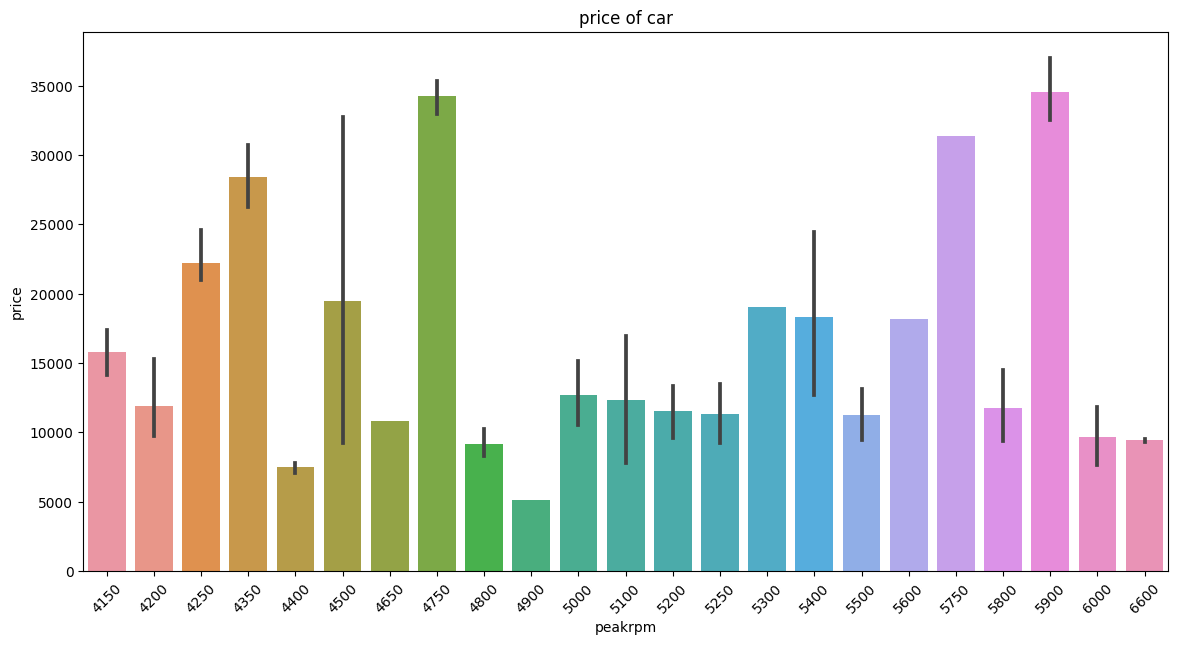

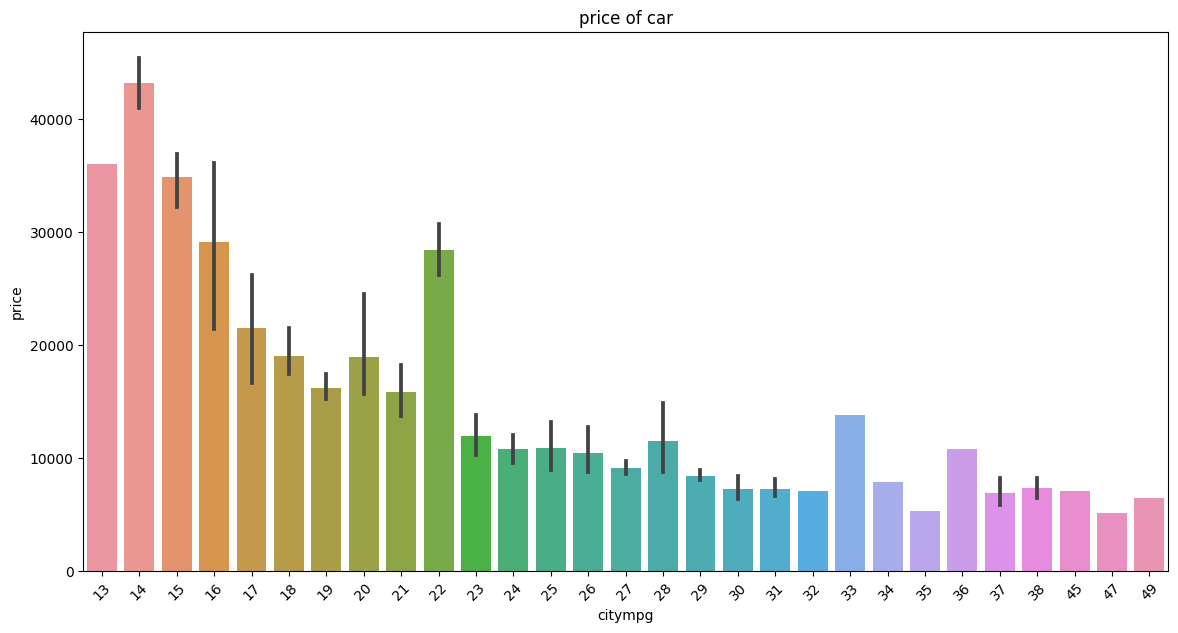

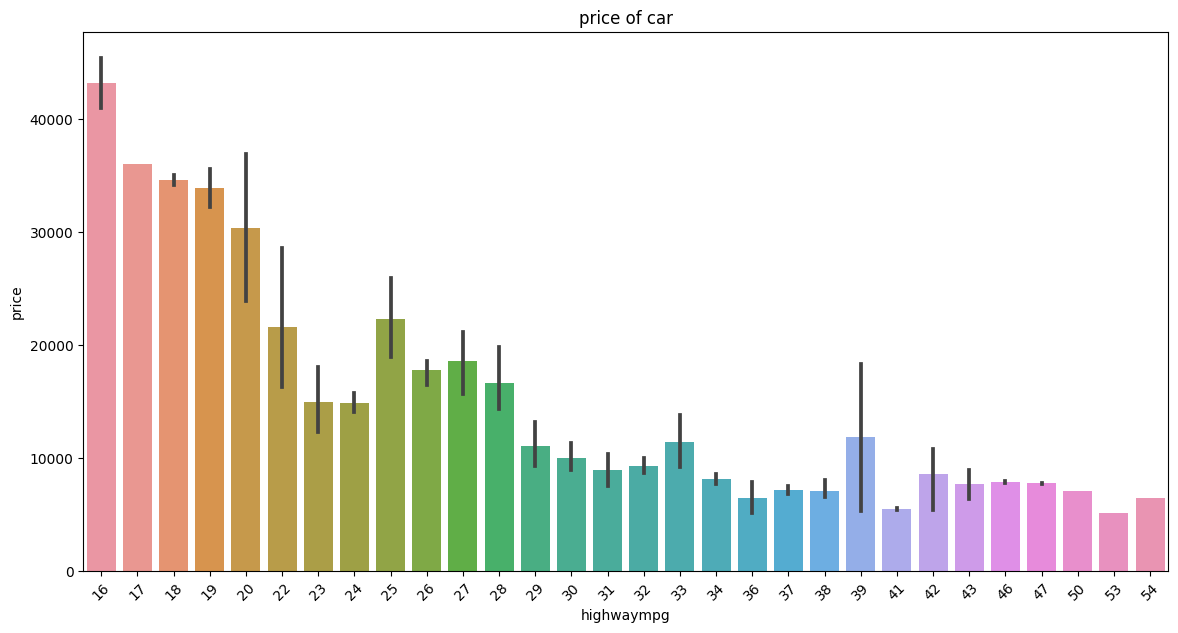

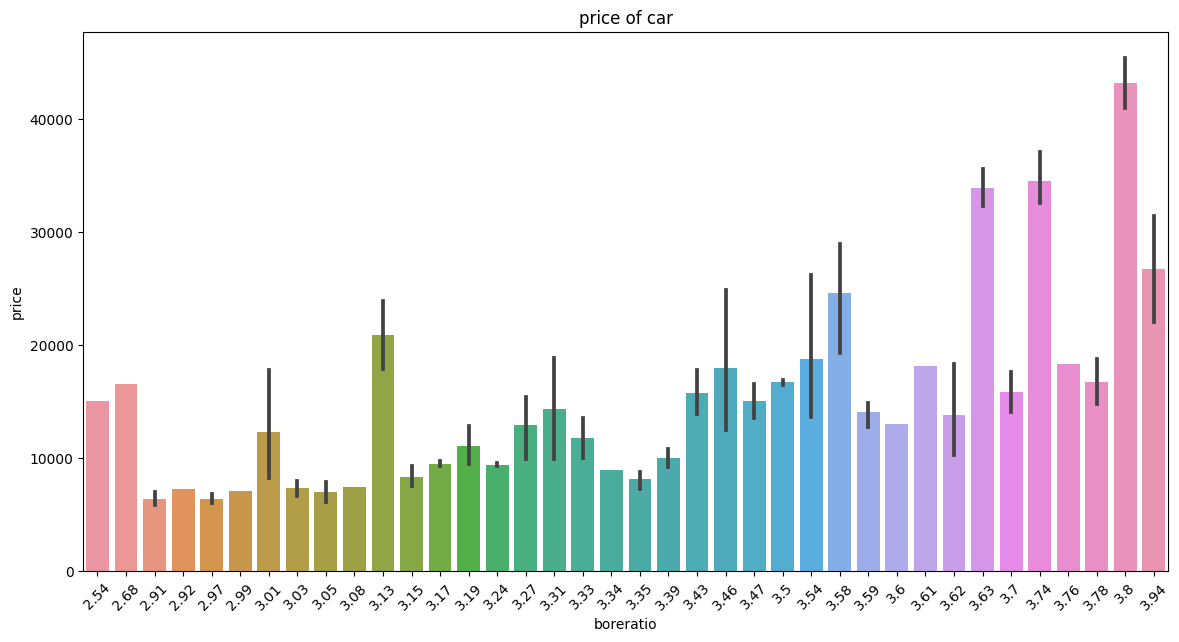

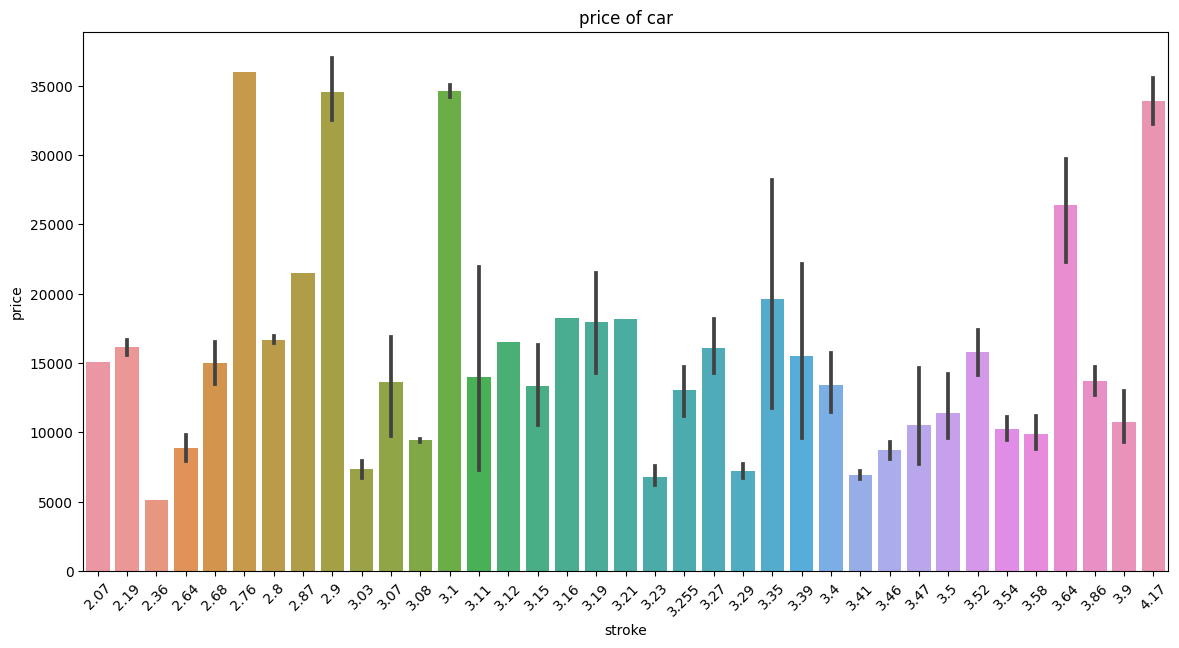

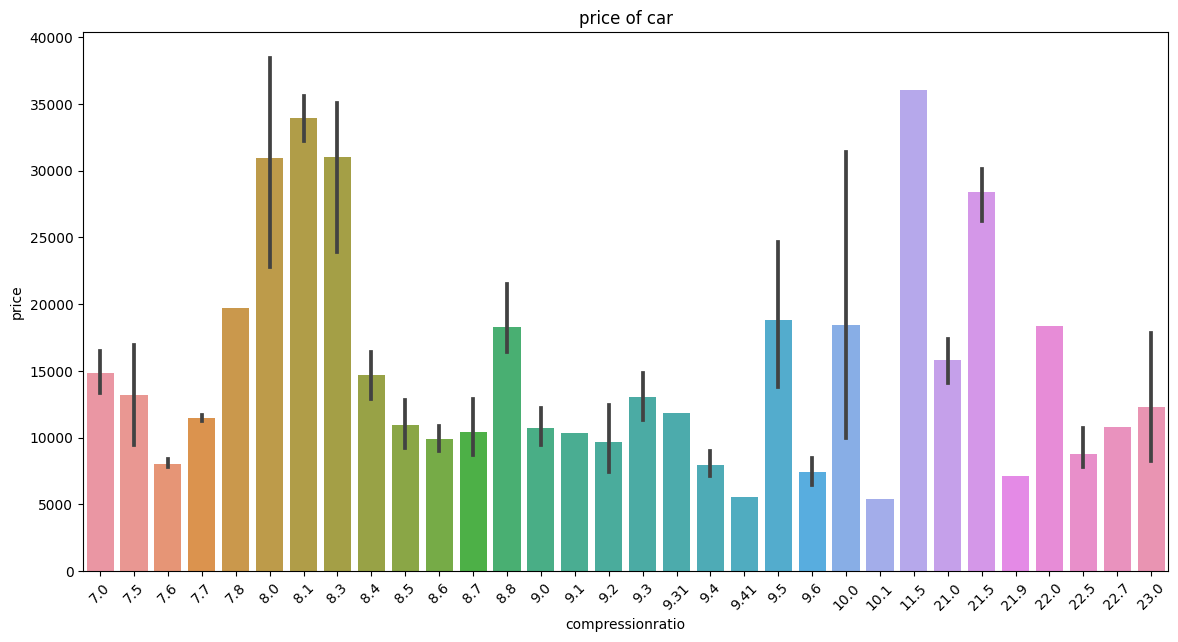

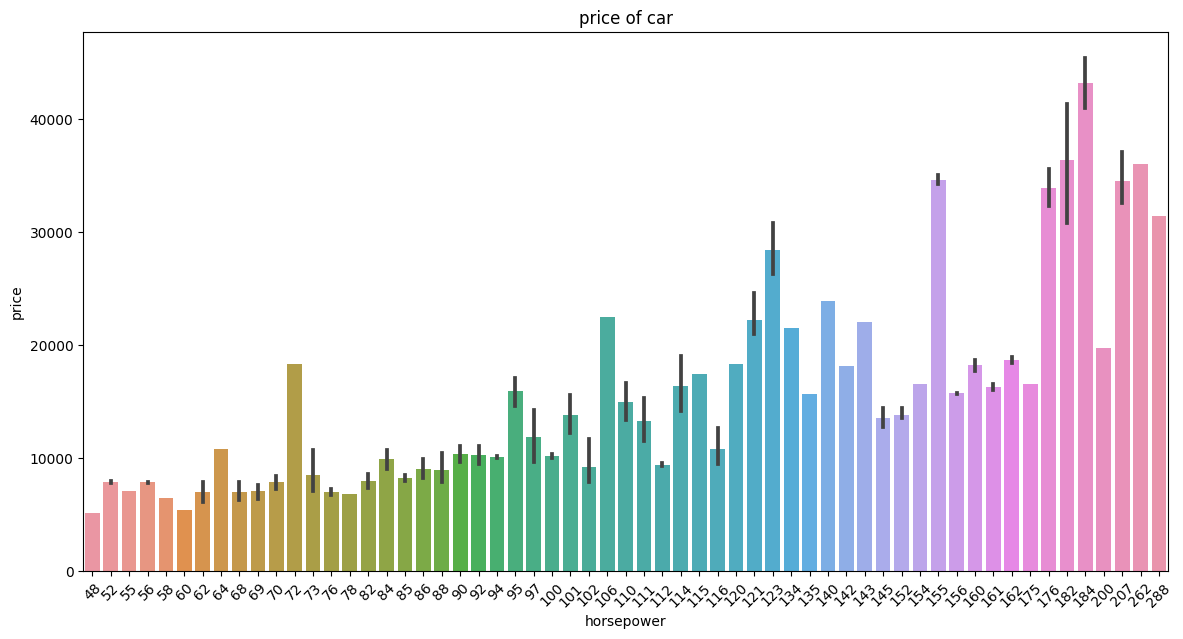

In [ ]:
for column in details:
    plt.figure(figsize=(14,7))
    sns.barplot(x=df[column], y='price', data = df.sort_values('price', ascending=False))
    plt.title('price of car')
    plt.xticks(rotation=45)
    plt.show()

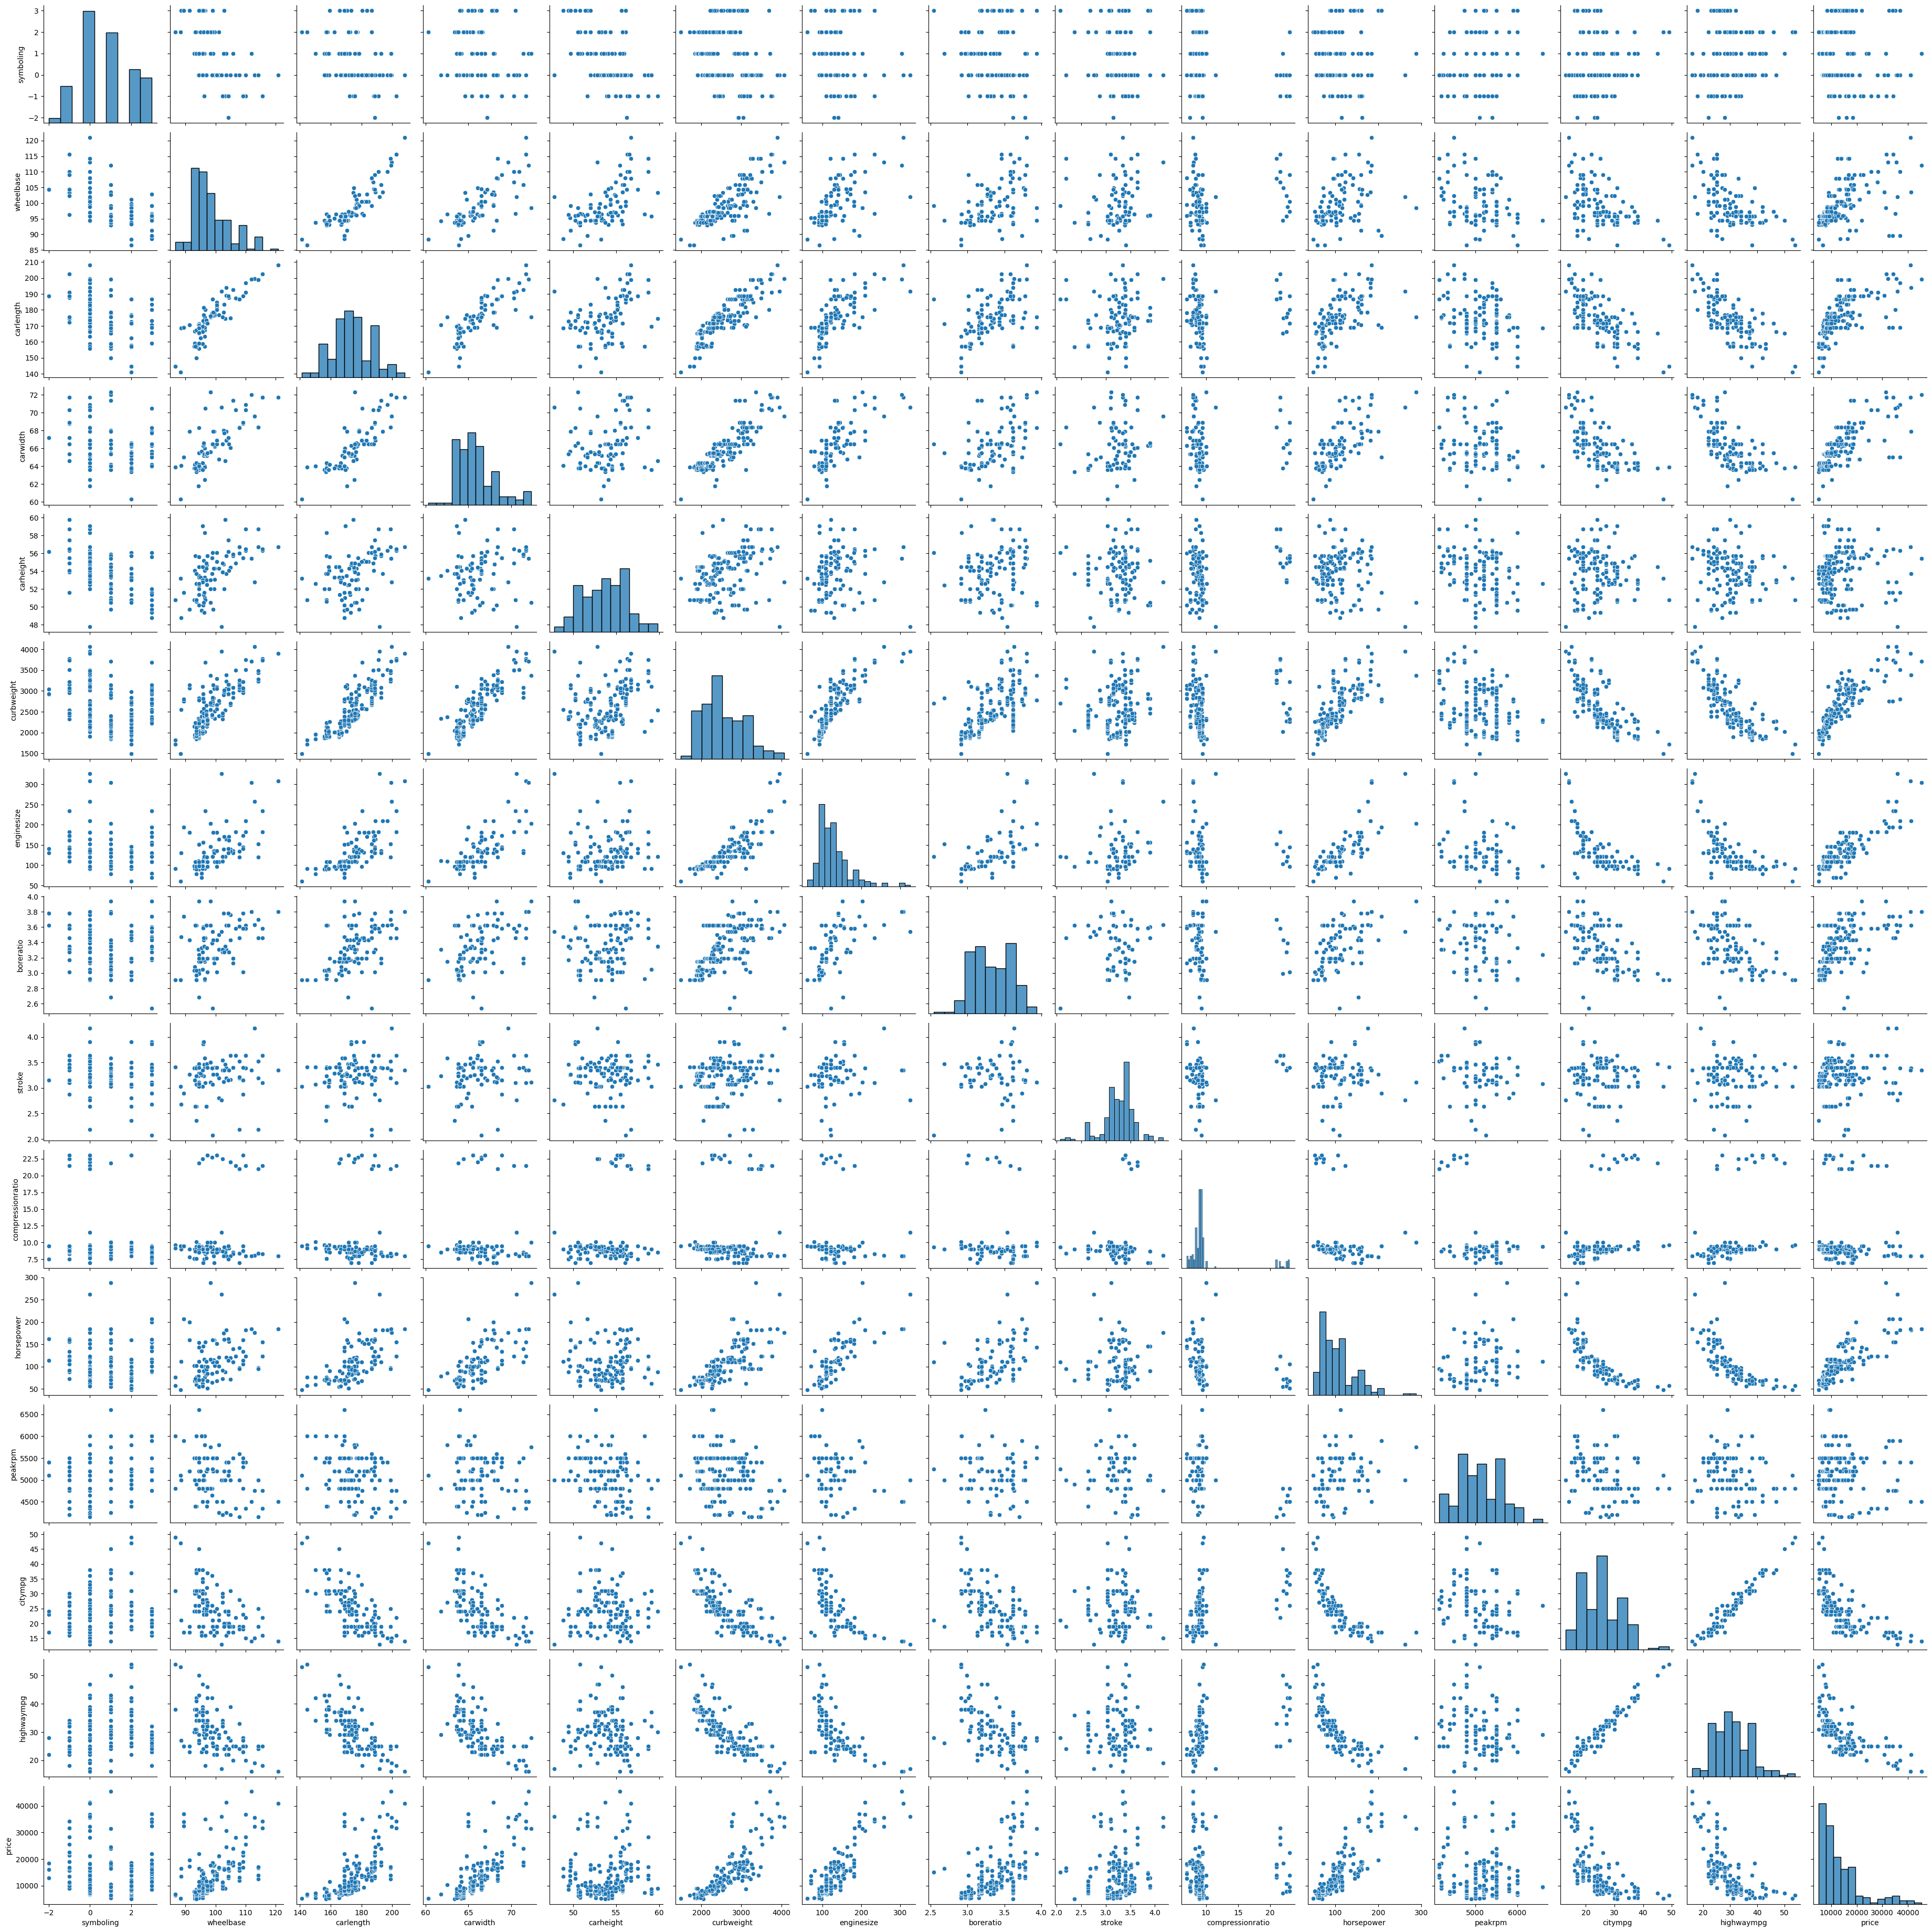

In [ ]:
sns.pairplot(df)

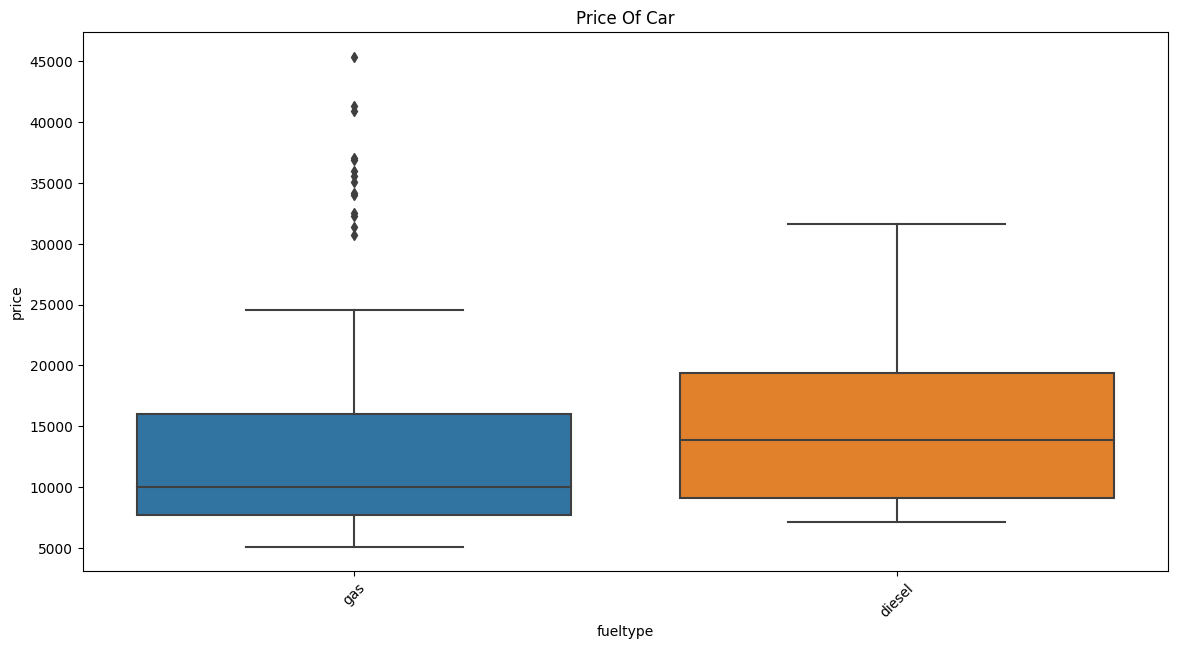

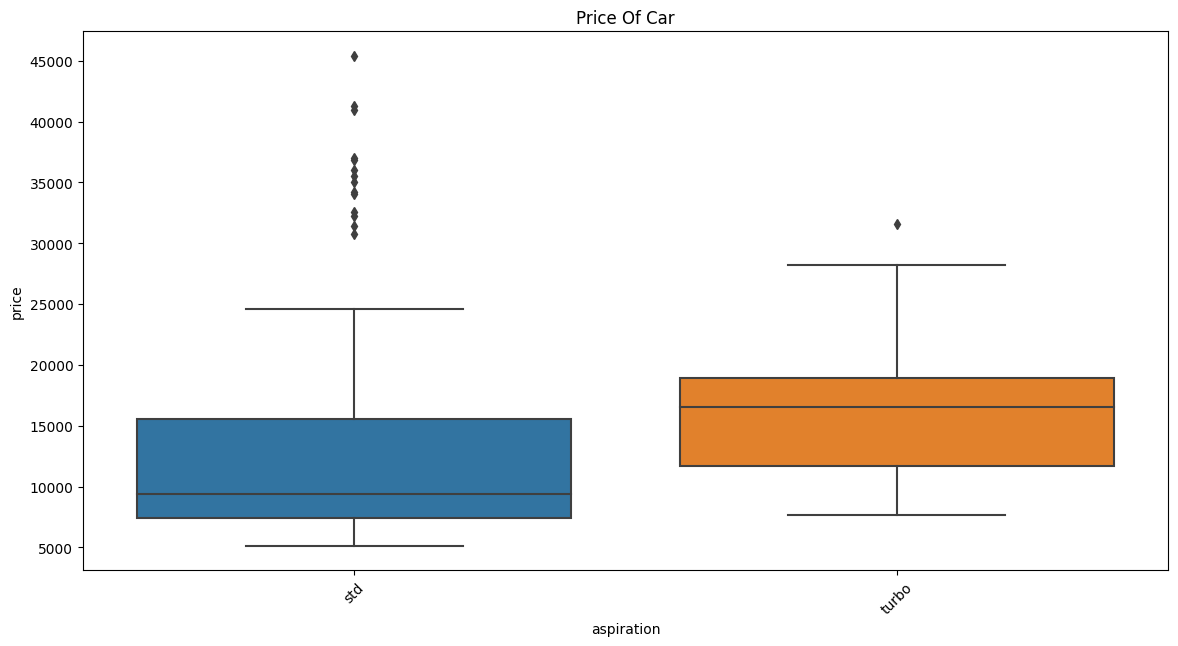

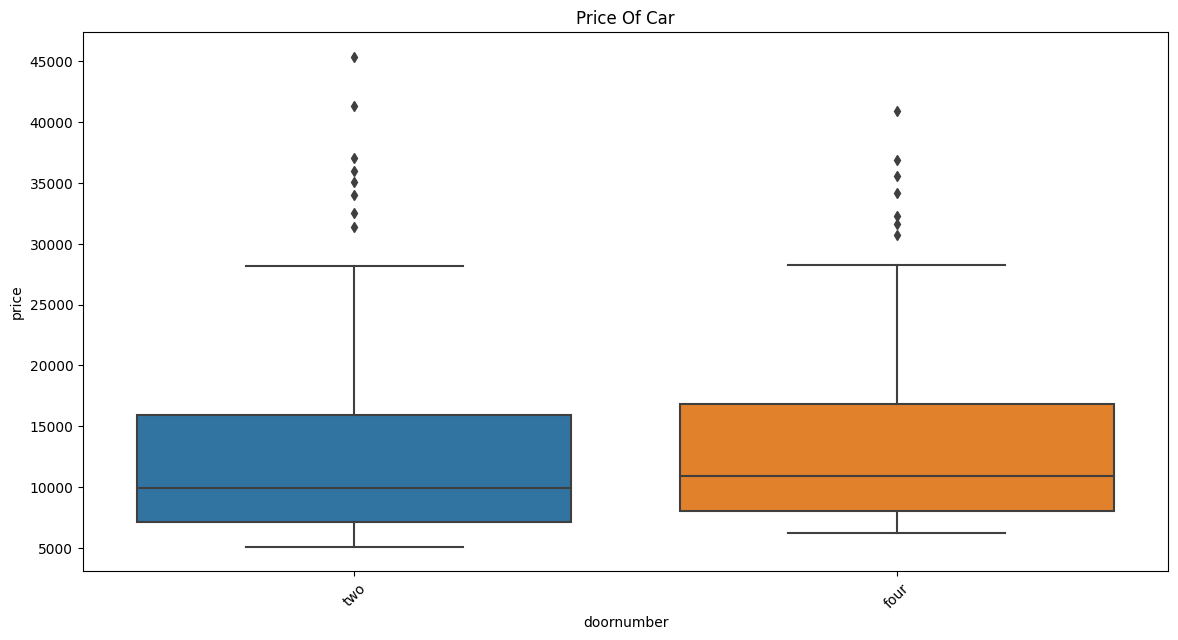

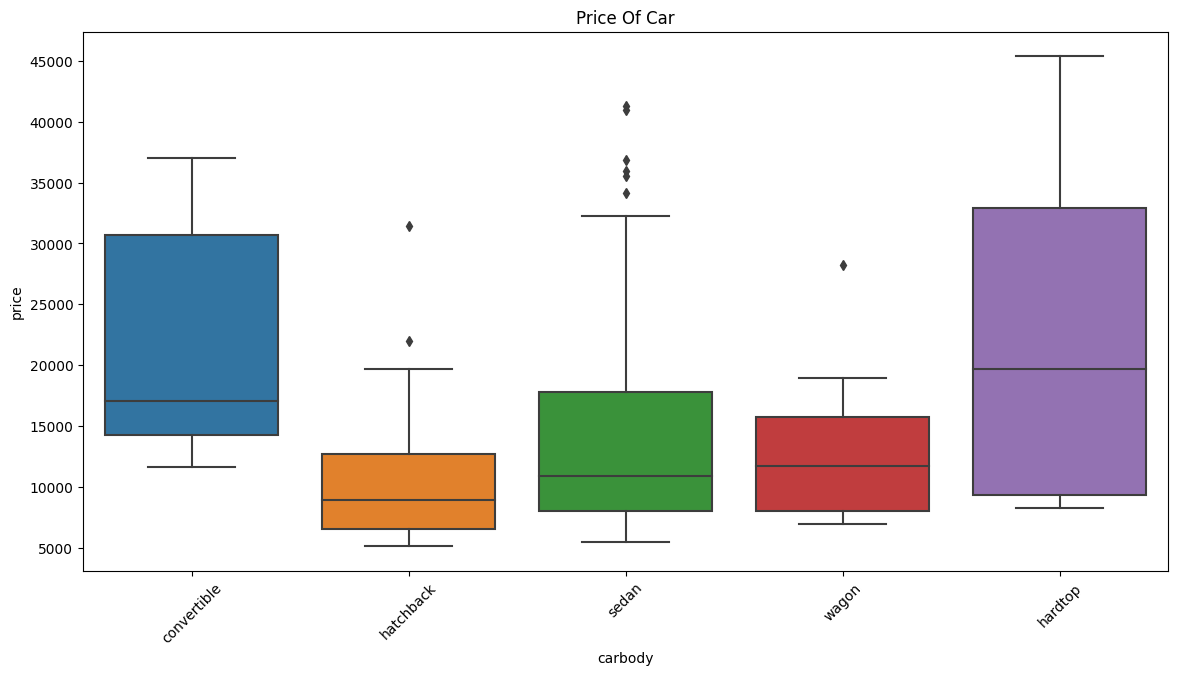

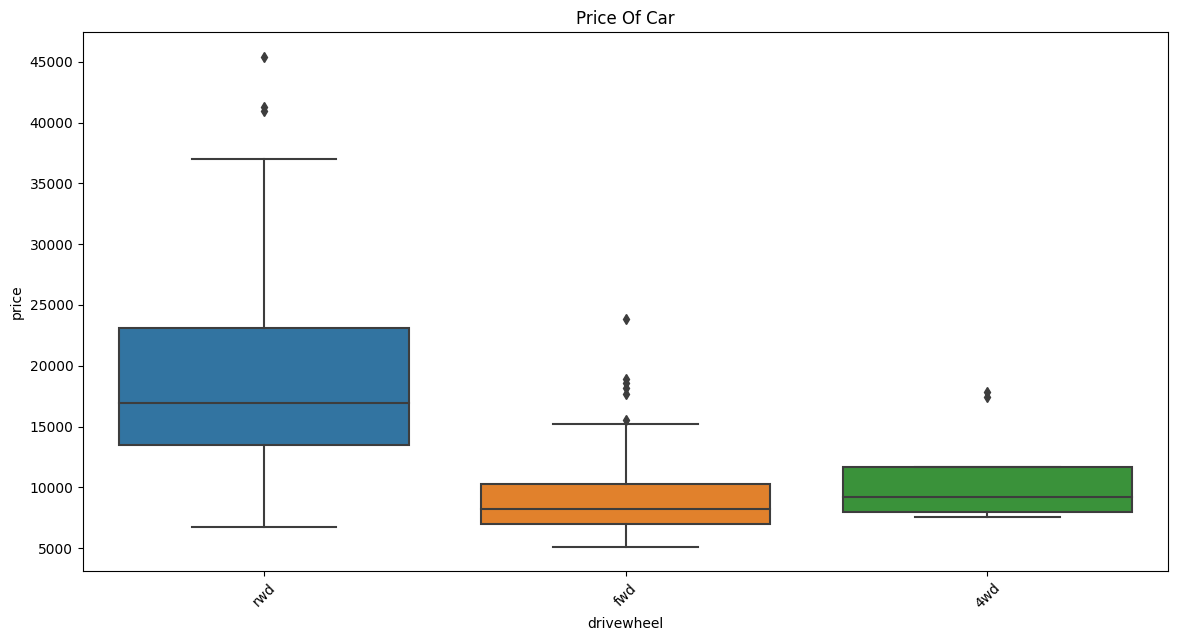

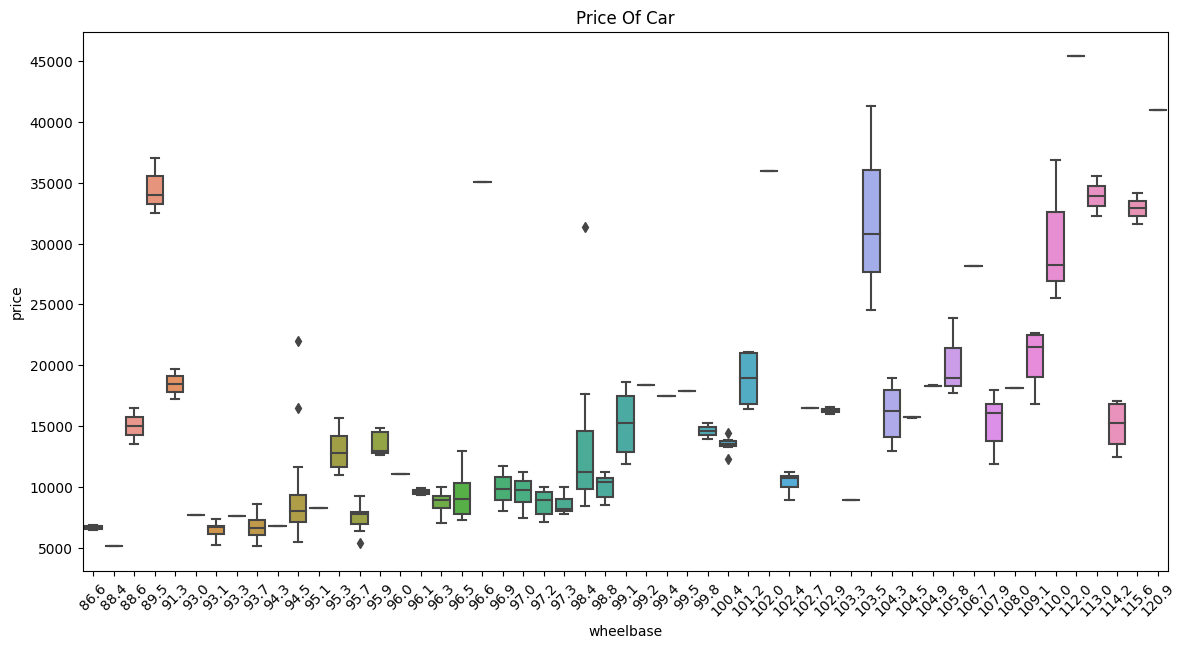

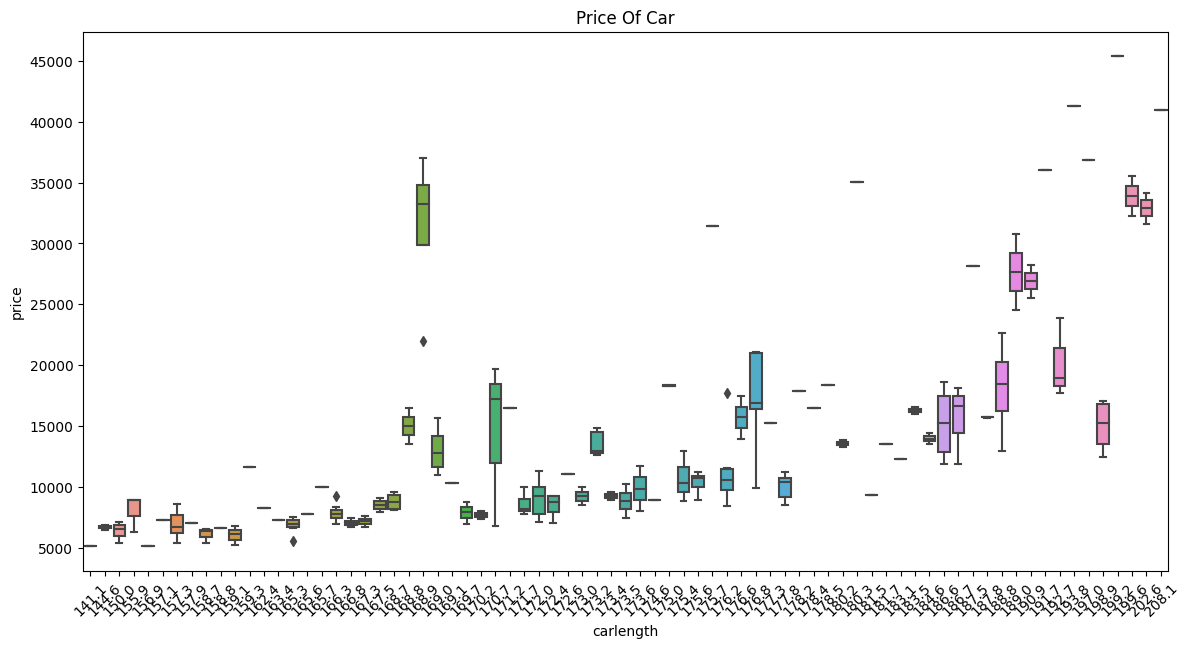

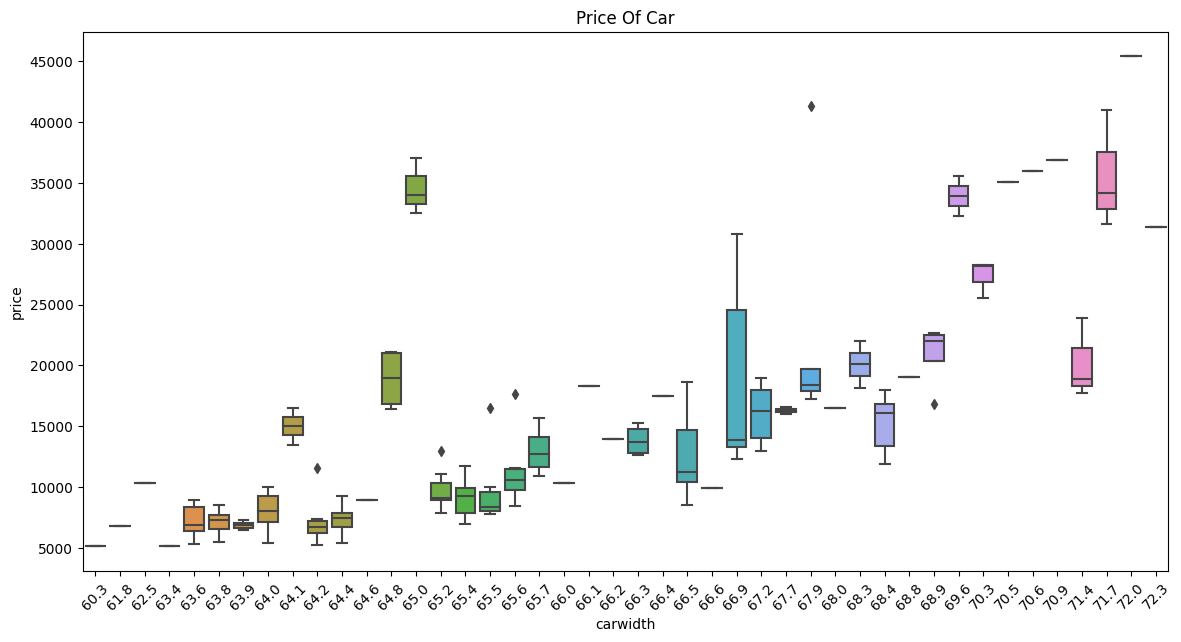

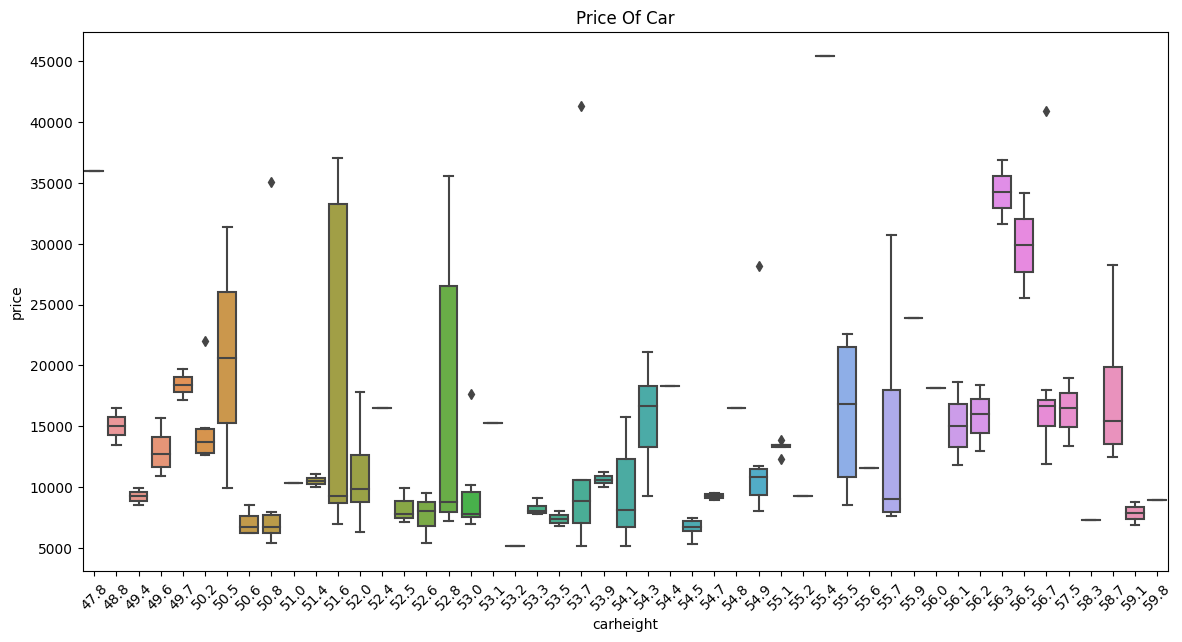

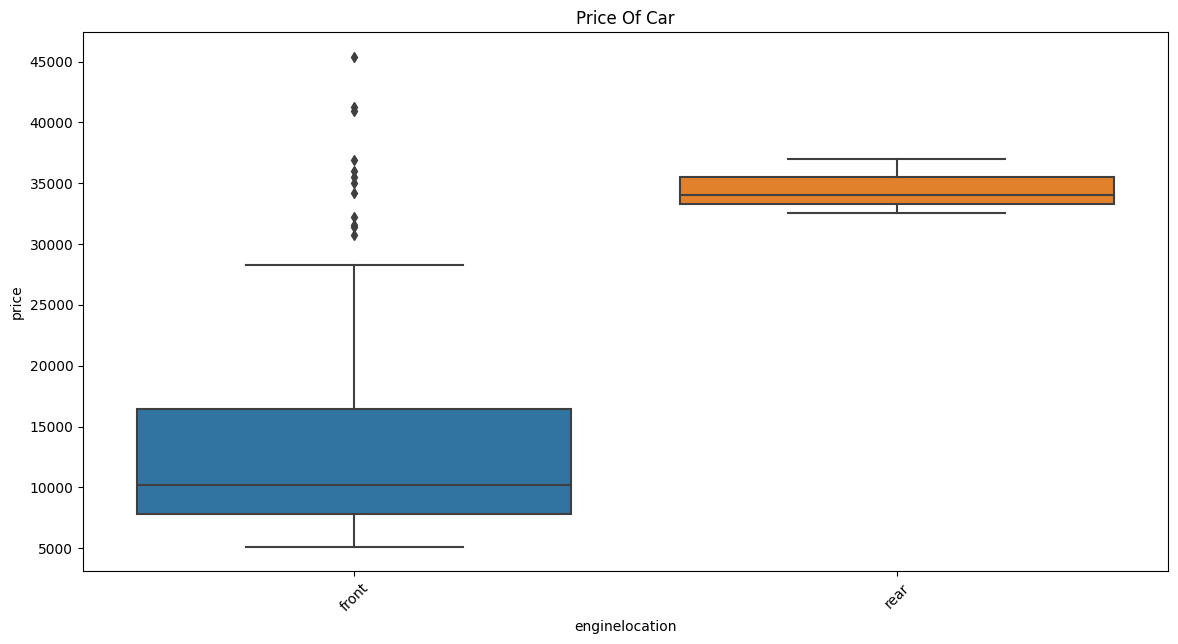

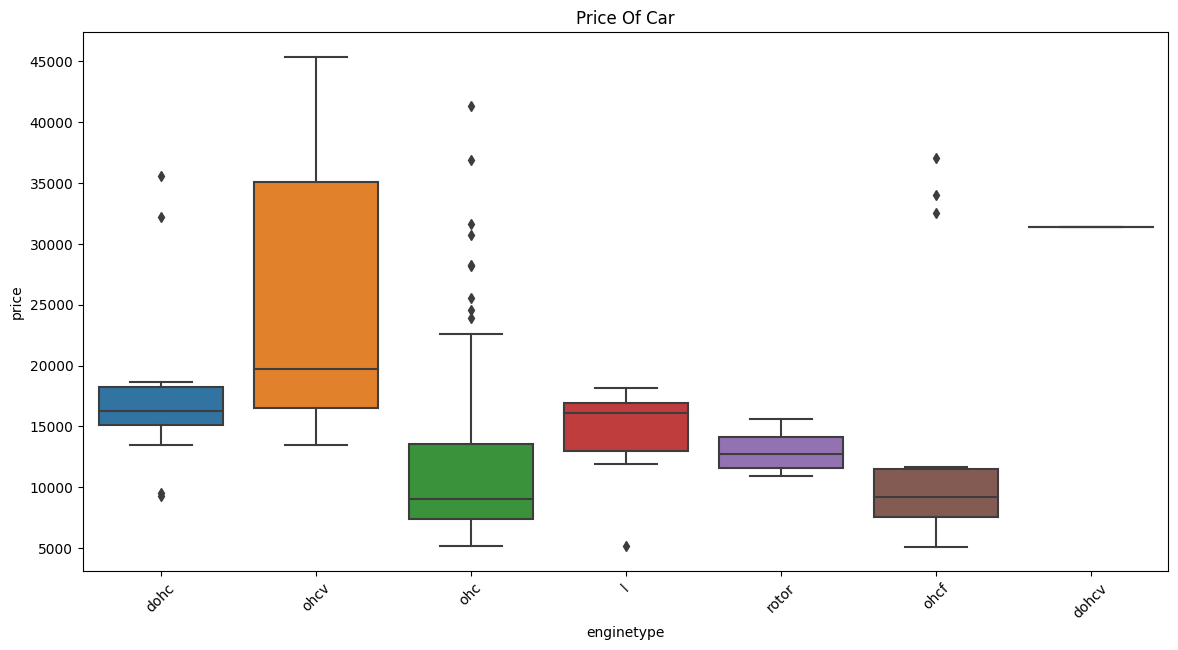

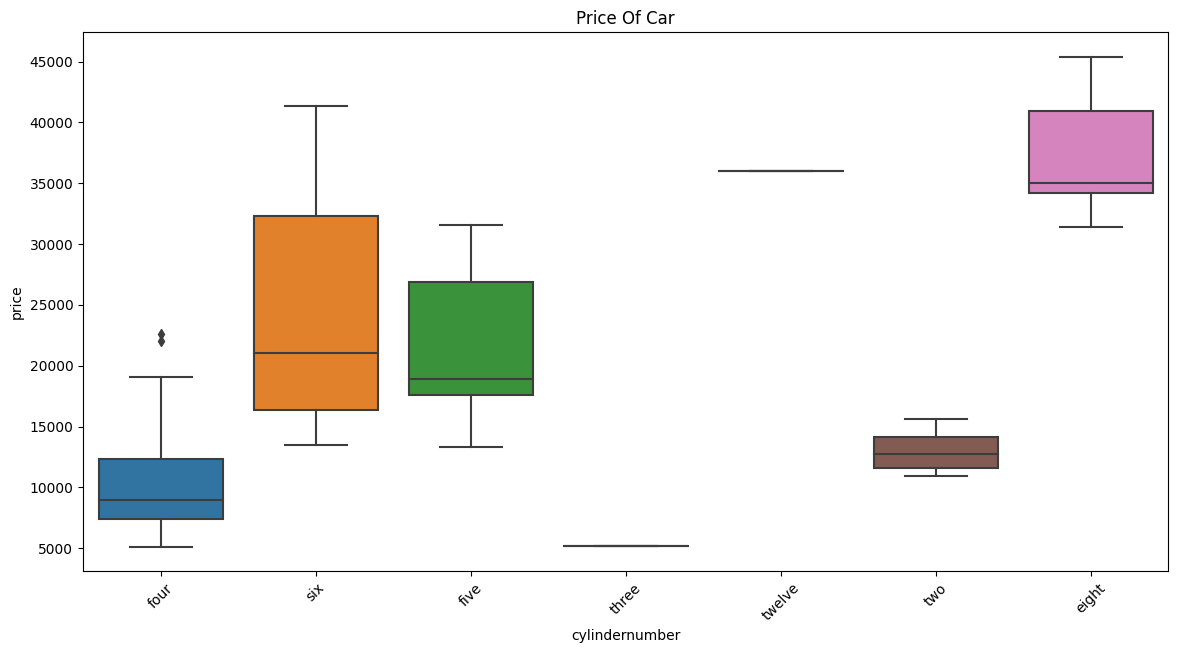

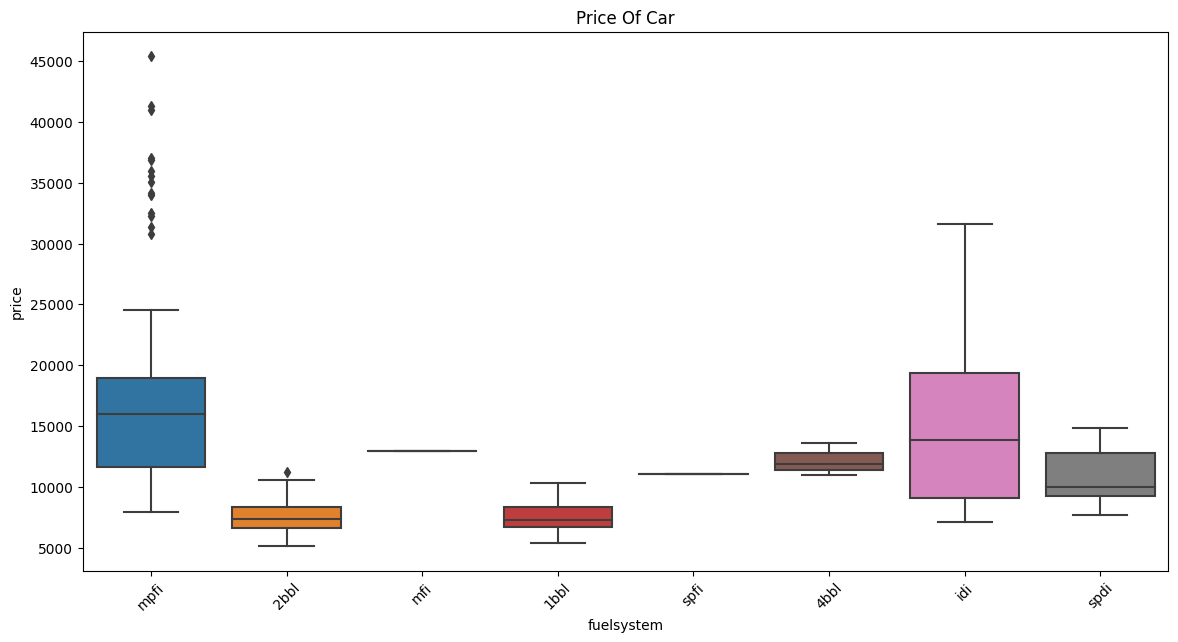

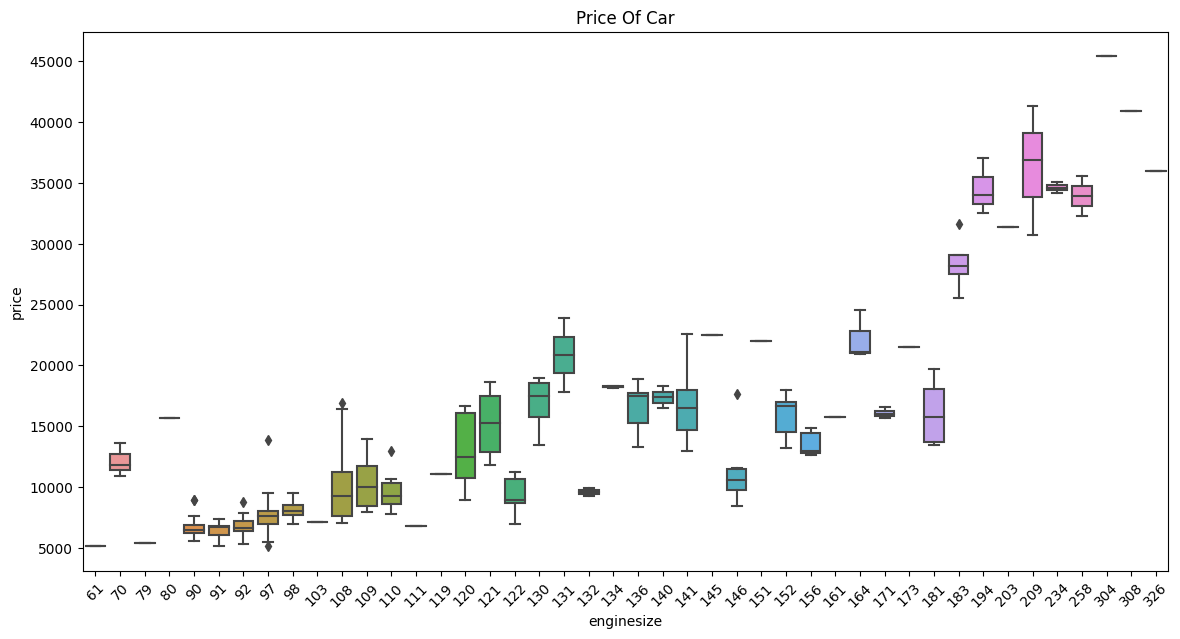

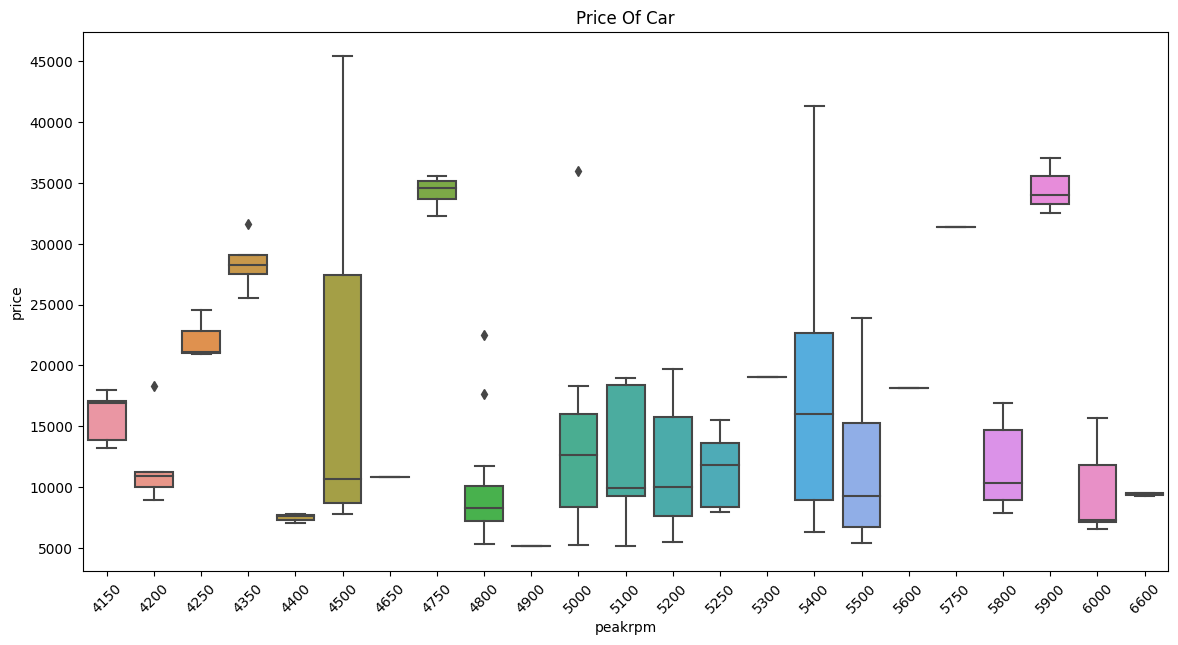

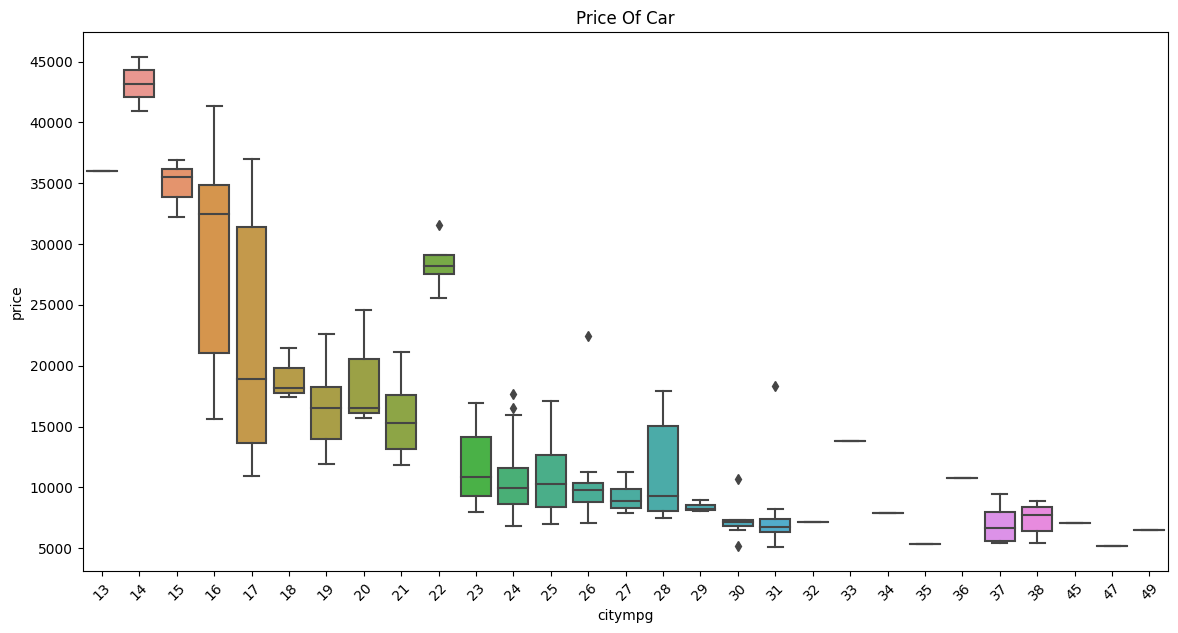

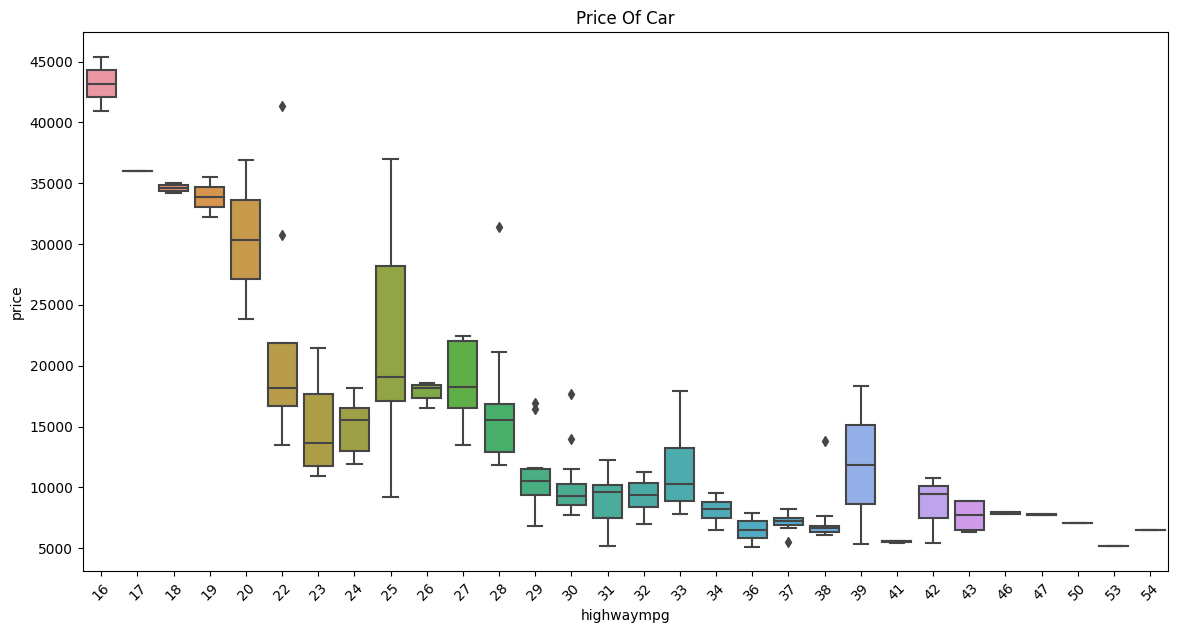

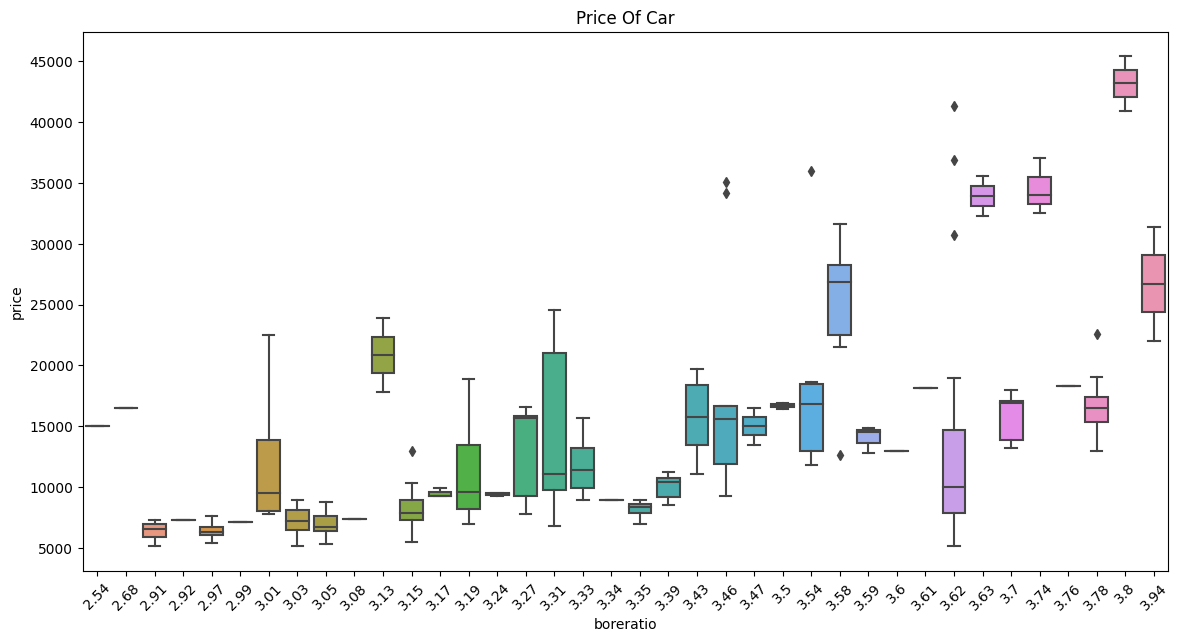

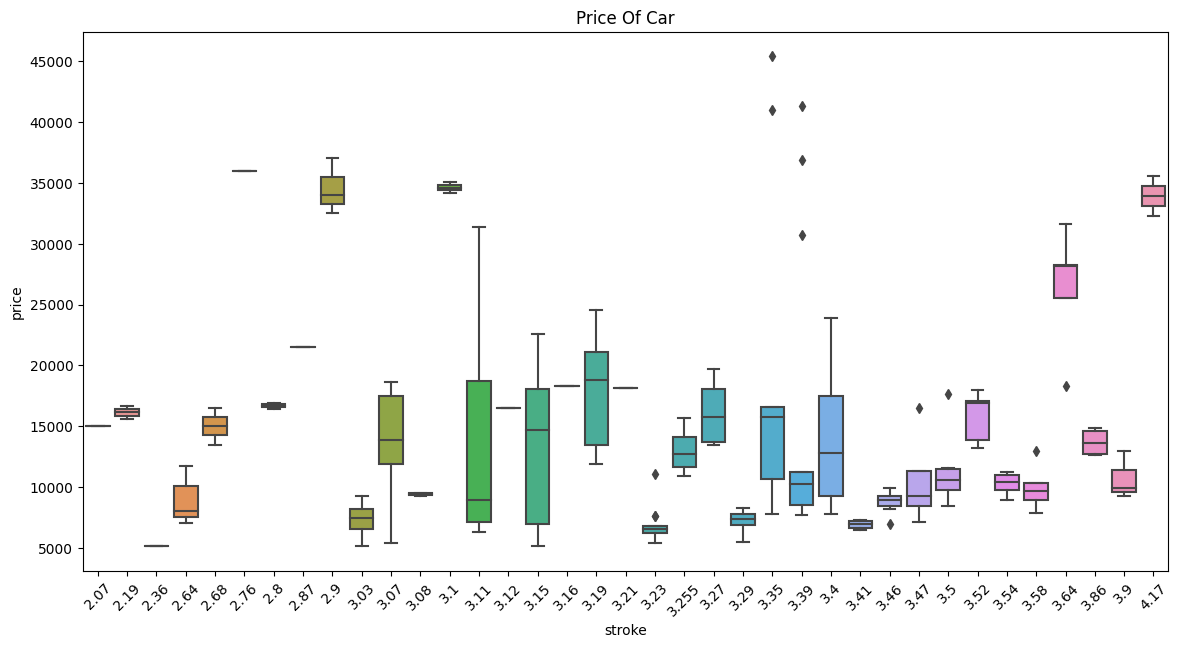

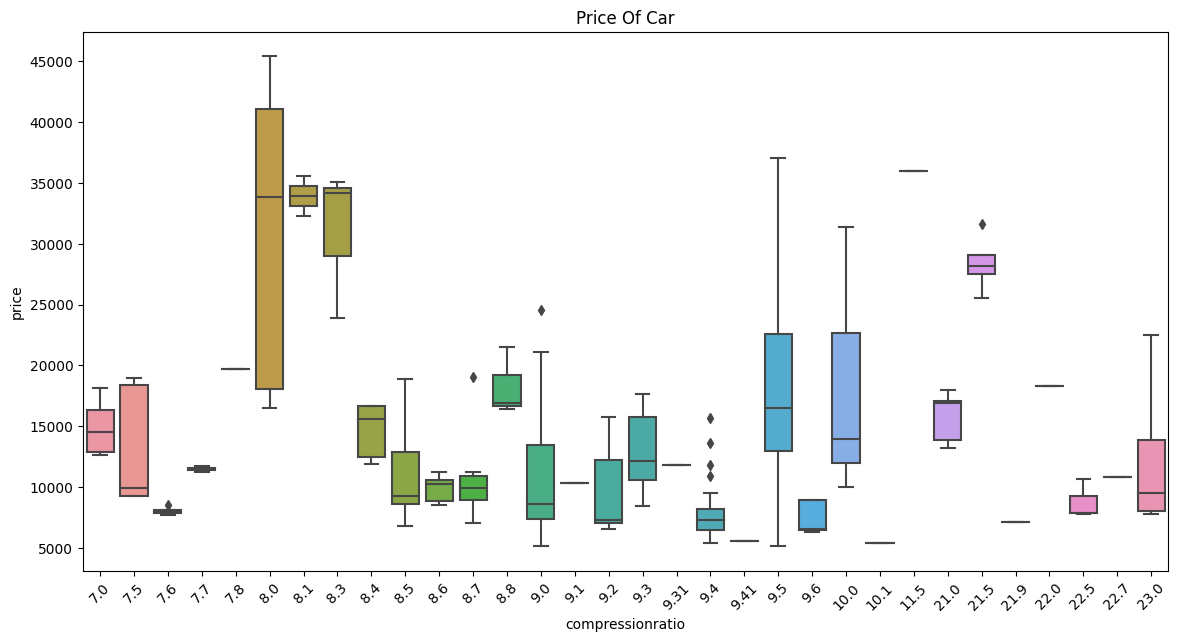

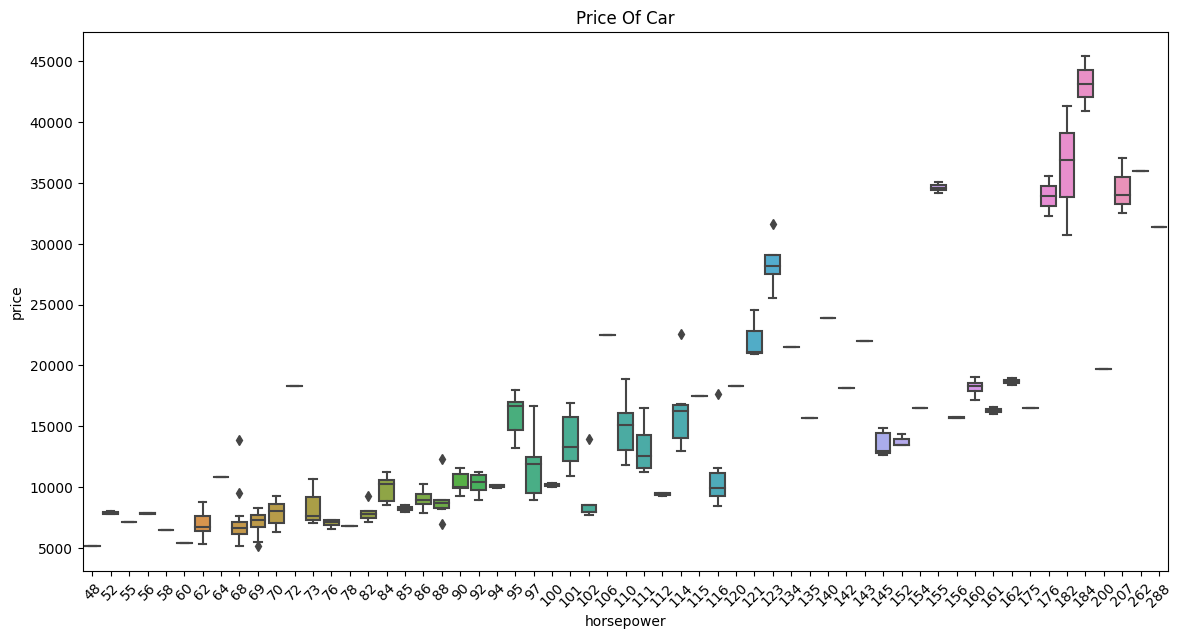

In [ ]:
for column in details:
  plt.figure(figsize=(14,7))
  sns.boxplot(x=df[column],y='price', data=df.sort_values('price', ascending=False))
  plt.title("Price Of Car")
  plt.xticks(rotation=45)
  plt.show()

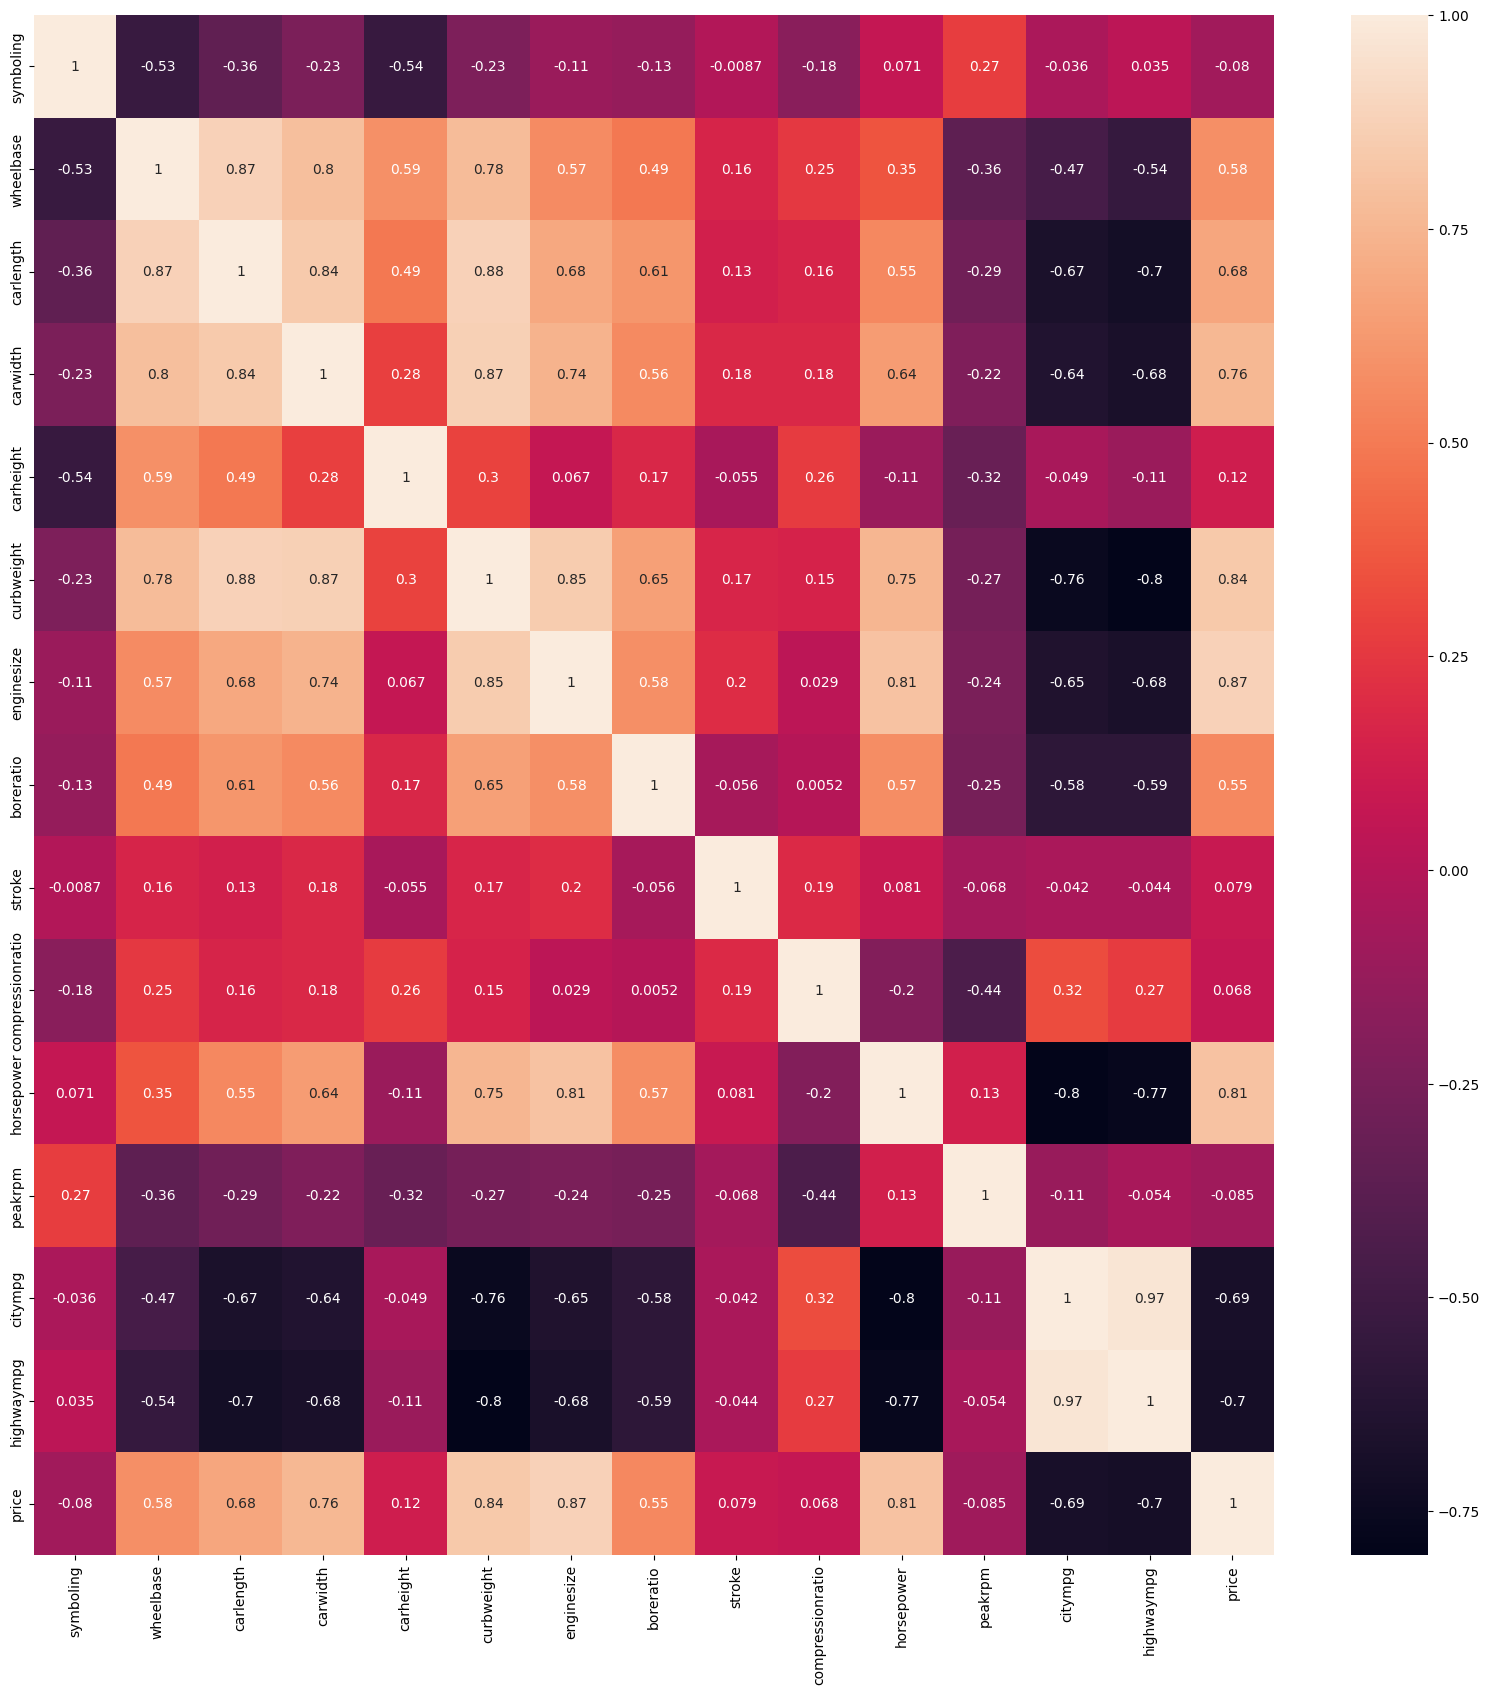

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, cmap='rocket')
plt.show()

In [ ]:
df['CarName'] = df['CarName'].str.split('', expand=True)[0]

In [ ]:
df['CarName'].value_counts()

    205
Name: CarName, dtype: int64

In [ ]:
# handling duplicate values

df['CarName'] = df['CarName'].replace({'toyouta': 'toyota', 'Nissan': 'nissan', 'maxda': 'mazda', 'vokswagen': 'volkswagen',
                                      'vw': 'volkswagen', 'porcshce': 'porsche'})

In [ ]:
df['CarName'].value_counts()


    205
Name: CarName, dtype: int64

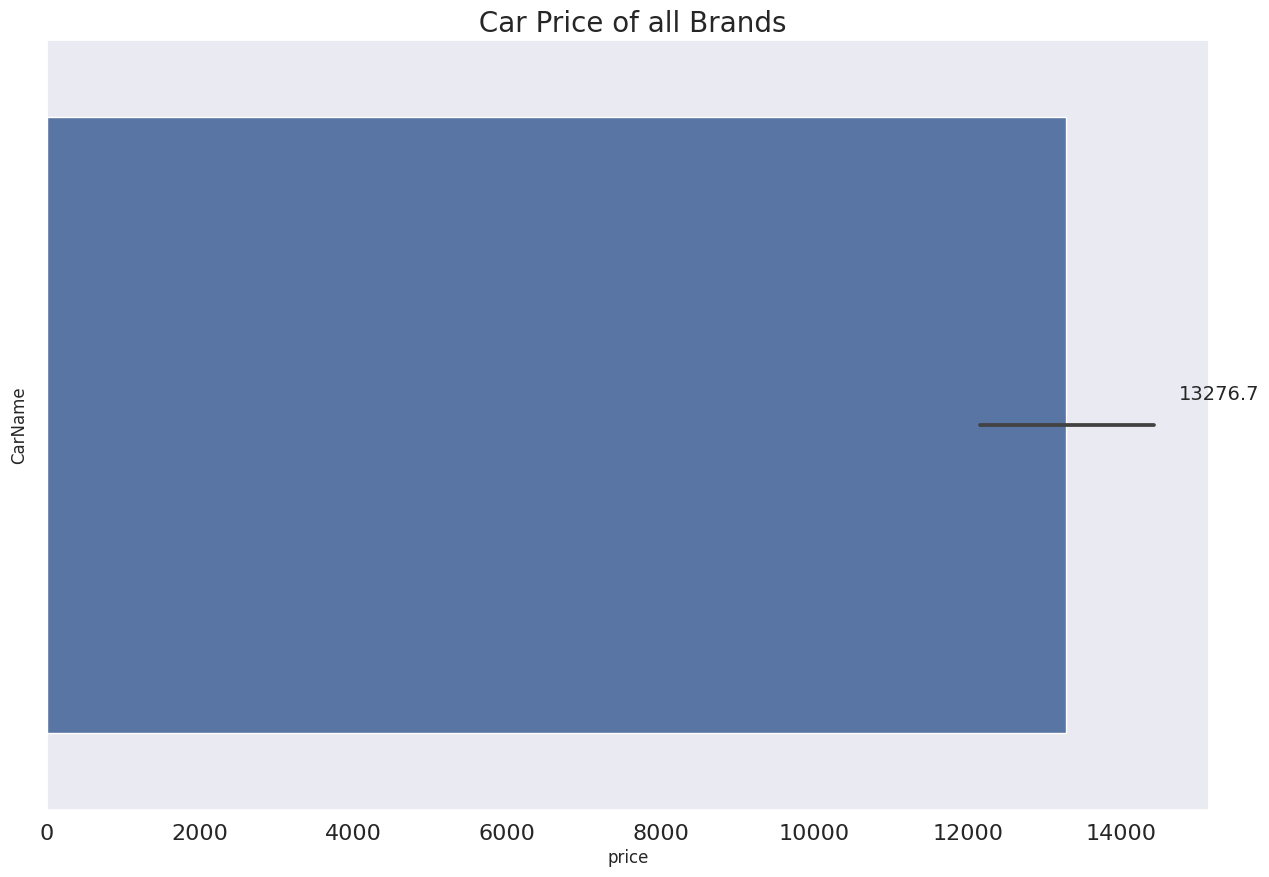

In [ ]:
plt.figure(figsize=(15,10))
sns.set(rc={'figure.figsize':(15,10)})
a = sns.barplot(y ='CarName',x='price',data=df)
plt.xticks(rotation=0,fontsize=16)
plt.yticks(fontsize=16)
for p in a.patches:
    width = p.get_width()
    plt.text(2000+p.get_width(),p.get_y()+0.45*p.get_height(),'{:1.1f}'.format(width),ha='center',
             va='center',fontsize=14)
plt.title(" Car Price of all Brands",fontsize=20)
plt.grid(False)

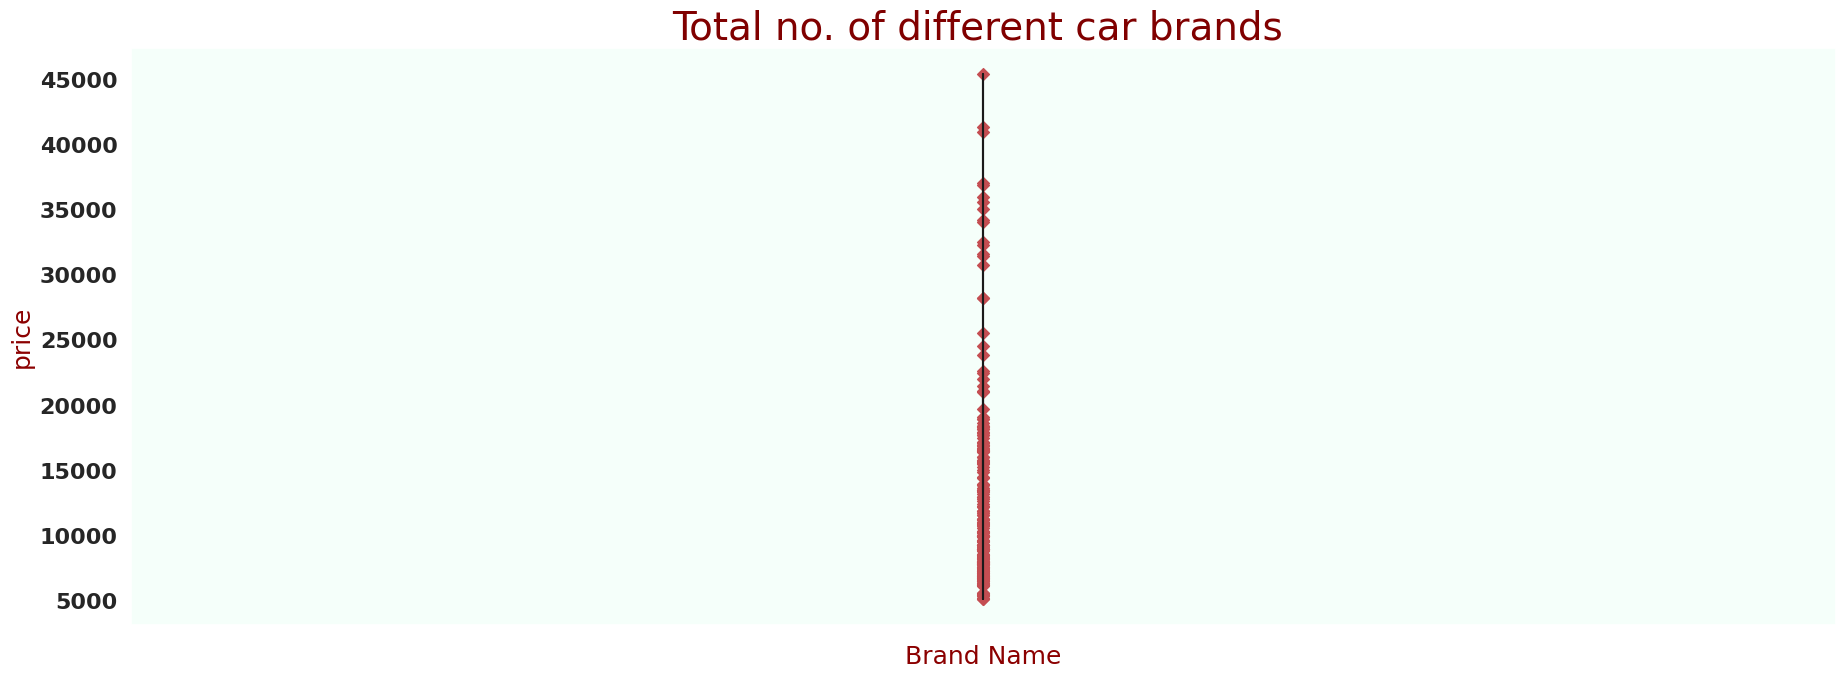

In [ ]:
sns.set(rc={'figure.figsize':(22,7.5)})
fig, ax = plt.subplots()
ax.set_facecolor('mintcream')
plt.plot('CarName','price',data=df,color='k')
plt.scatter('CarName','price',data=df,color='r',marker='D')
plt.xticks(rotation=60,fontsize=16,fontweight='bold')
plt.yticks(fontsize=16,fontweight='bold')

plt.title("Total no. of different car brands ",fontsize=28,color='maroon')
plt.xlabel("Brand Name", fontsize = 18,color='darkred')
plt.ylabel("price", fontsize =18, color='darkred')
plt.grid(False)

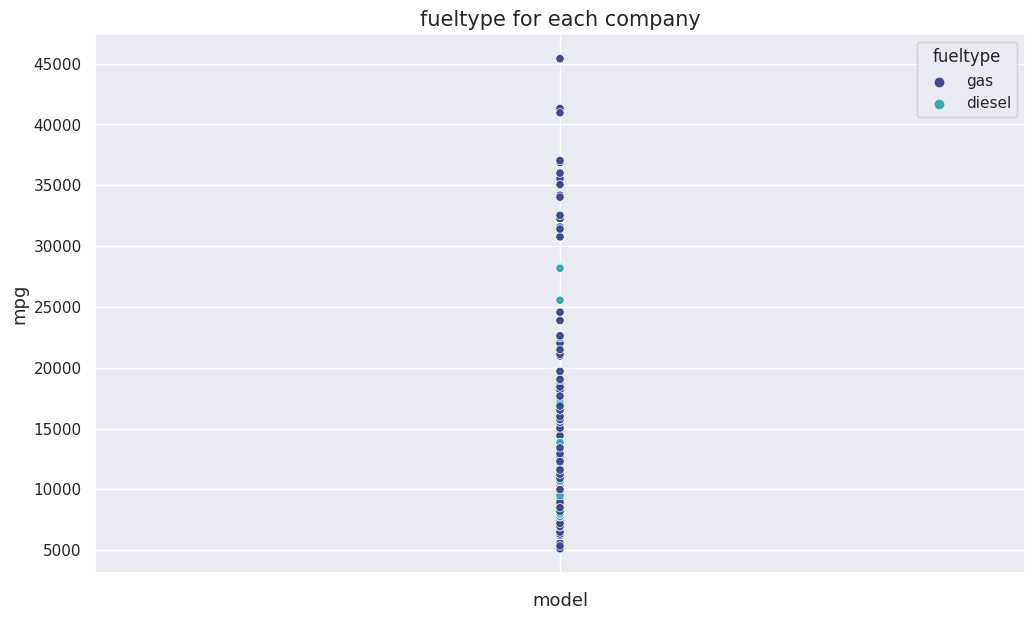

In [ ]:
plt.figure(figsize=(12,7))
sns.scatterplot(x="CarName",y="price",data=df[0:10000],hue="fueltype",palette="mako")
plt.title("fueltype for each company",size=15)
plt.xlabel("model",size=13)
plt.ylabel("mpg" , size=13)
plt.xticks(rotation=45)
plt.show()

In [ ]:
categ_columns=['Car Brand','Model','Gear','Fuel','Location' ]
from sklearn.preprocessing import LabelEncoder
for col in df.columns:
    if df[col].dtypes == 'object':
        encoder = LabelEncoder()
        df[col] = encoder.fit_transform(df[col])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    int64  
 2   fueltype          205 non-null    int64  
 3   aspiration        205 non-null    int64  
 4   doornumber        205 non-null    int64  
 5   carbody           205 non-null    int64  
 6   drivewheel        205 non-null    int64  
 7   enginelocation    205 non-null    int64  
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    int64  
 14  cylindernumber    205 non-null    int64  
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    int64  
 1

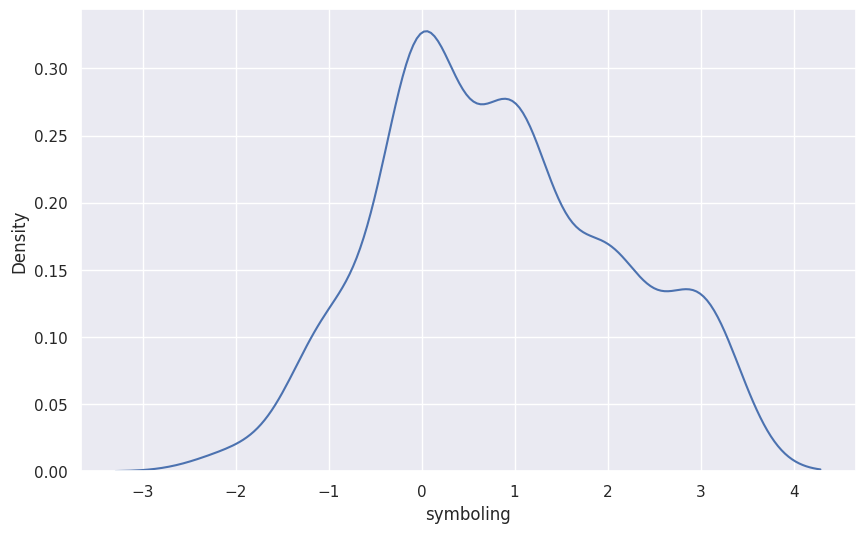

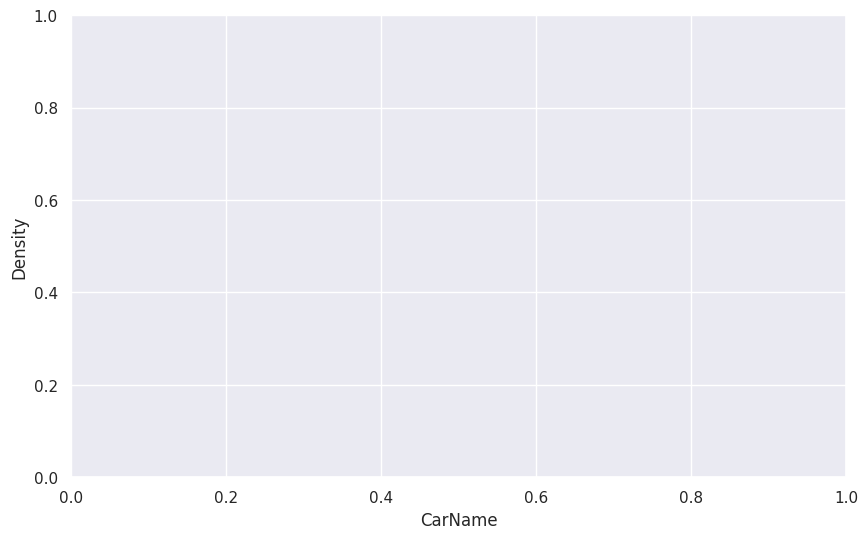

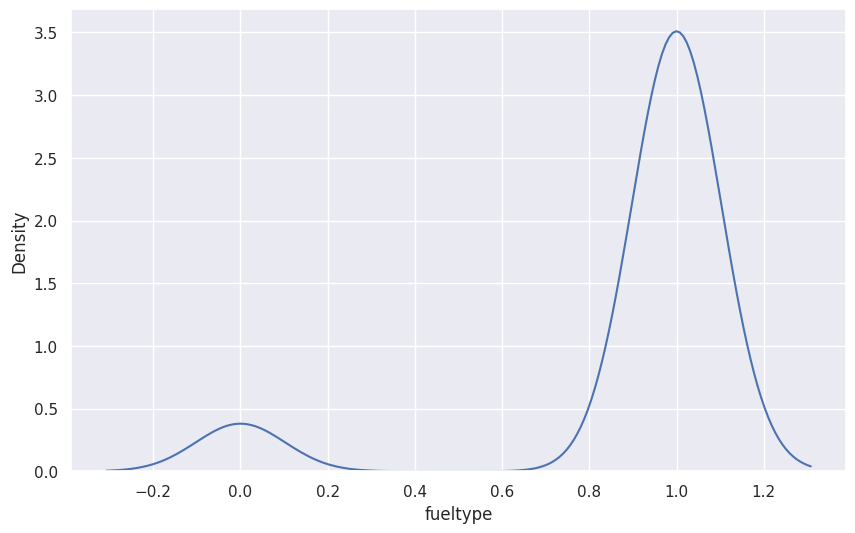

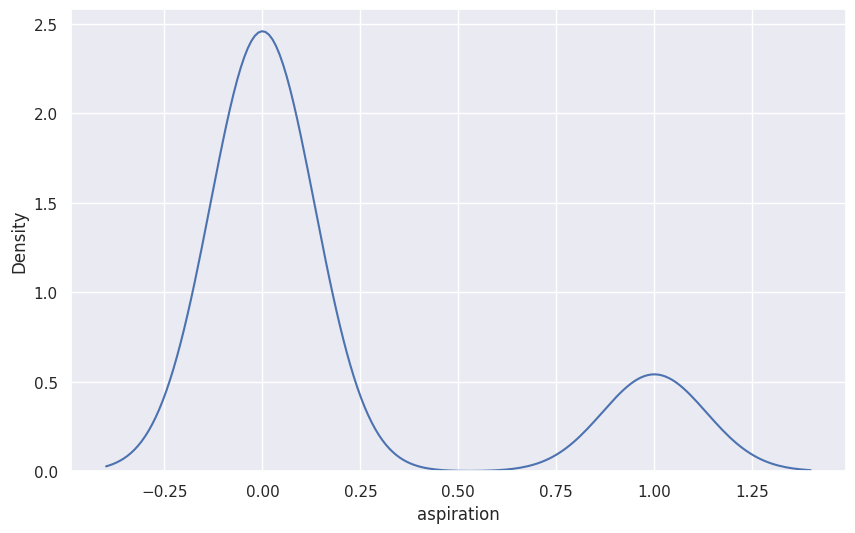

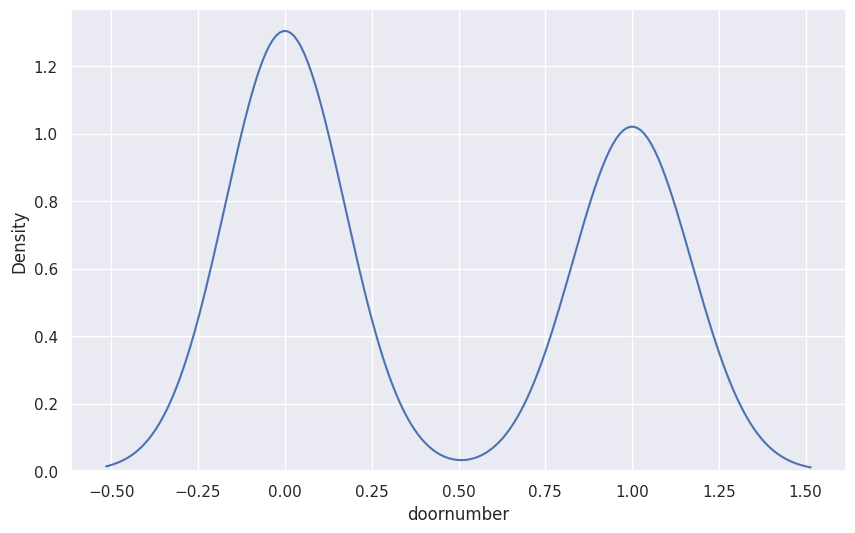

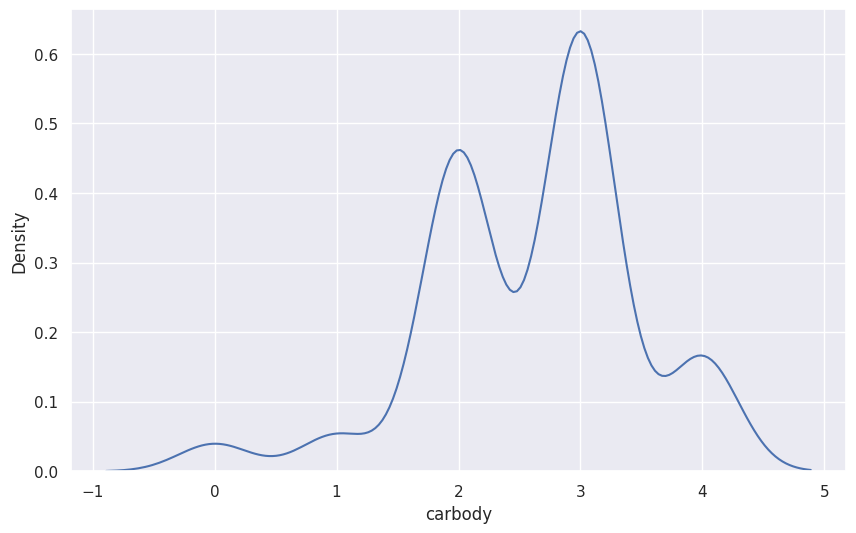

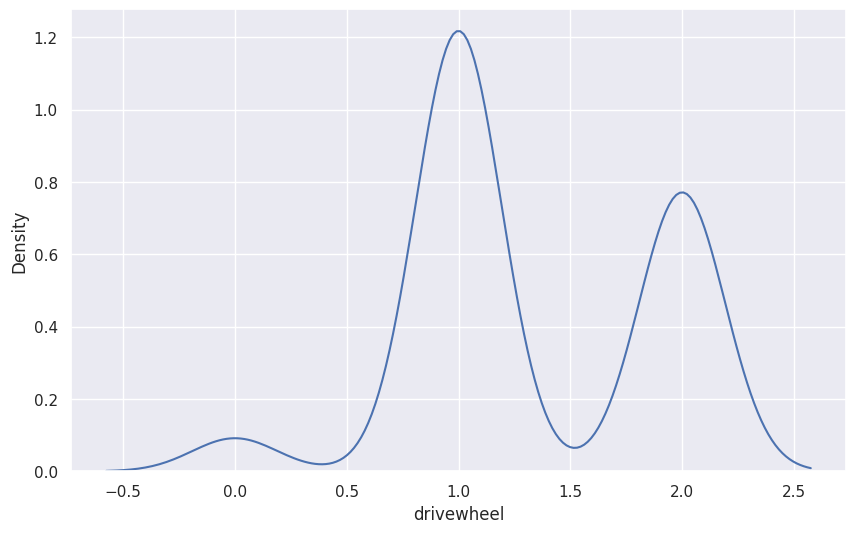

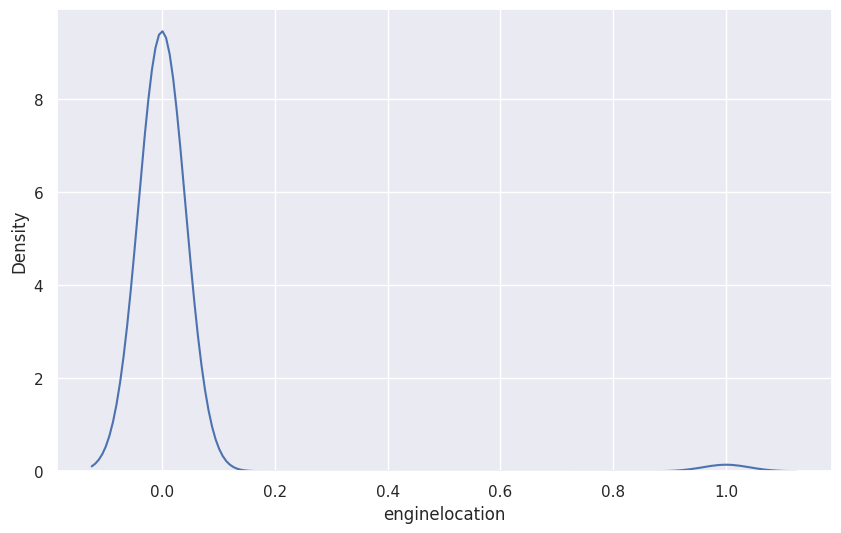

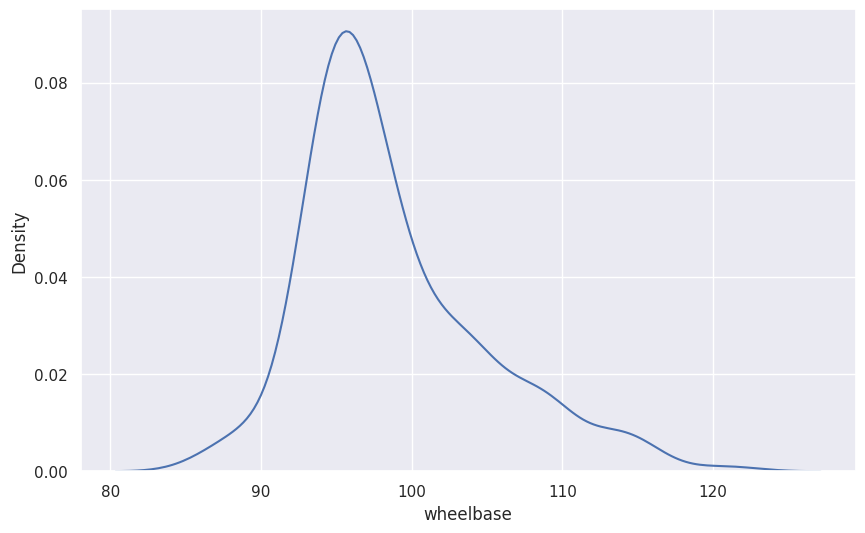

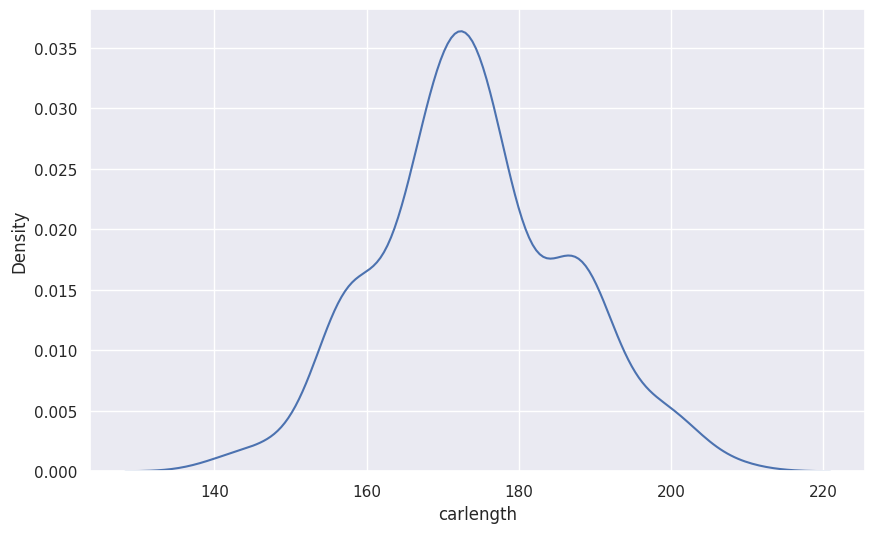

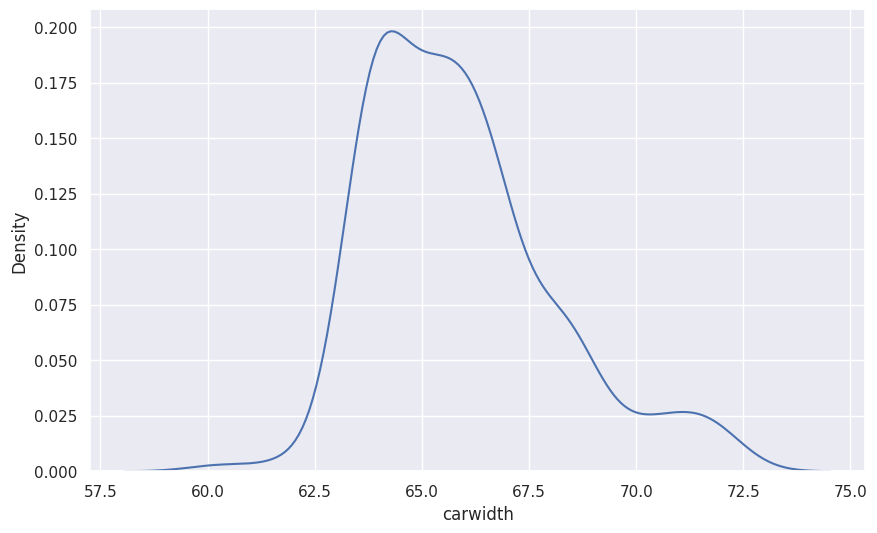

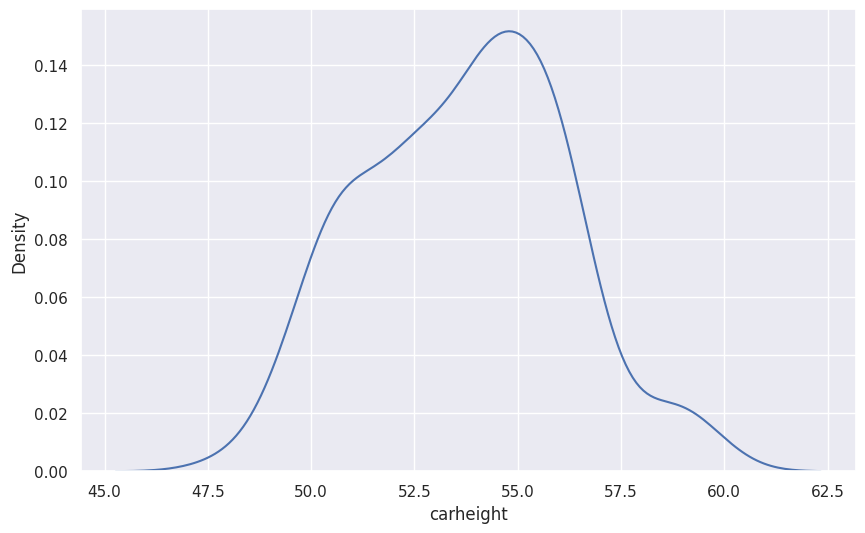

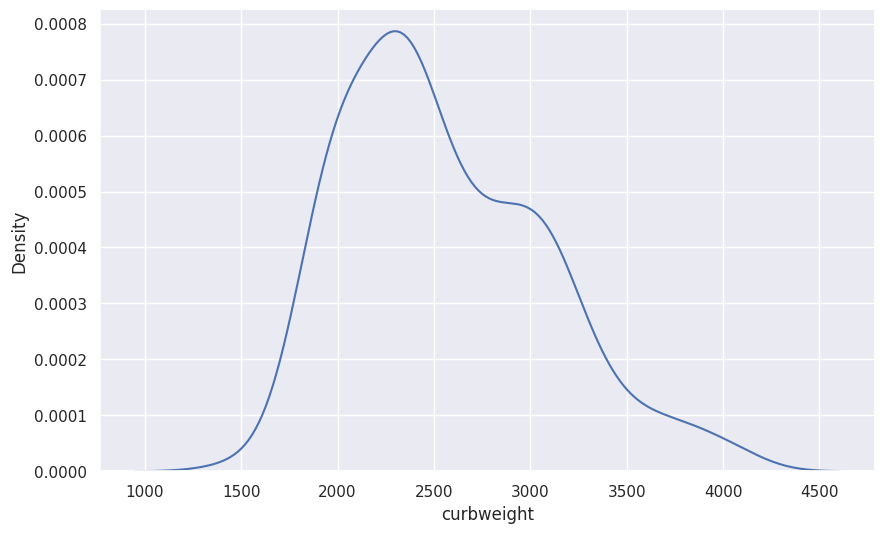

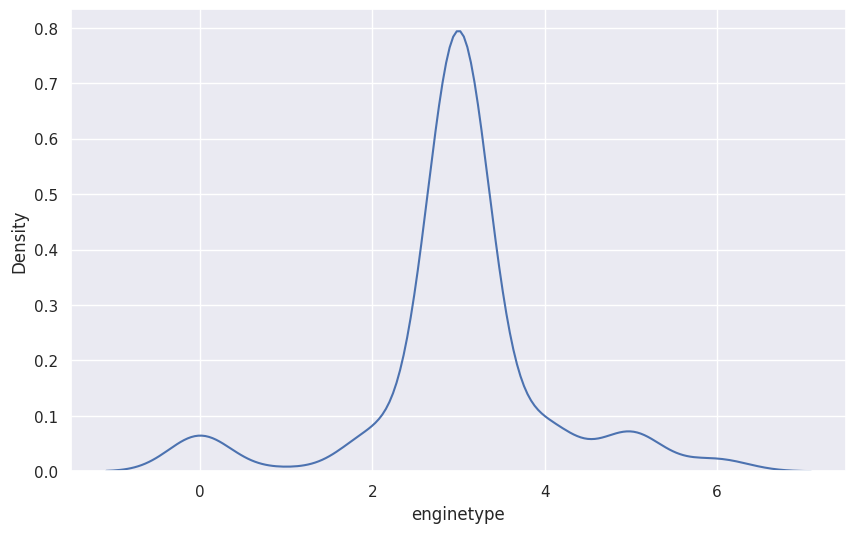

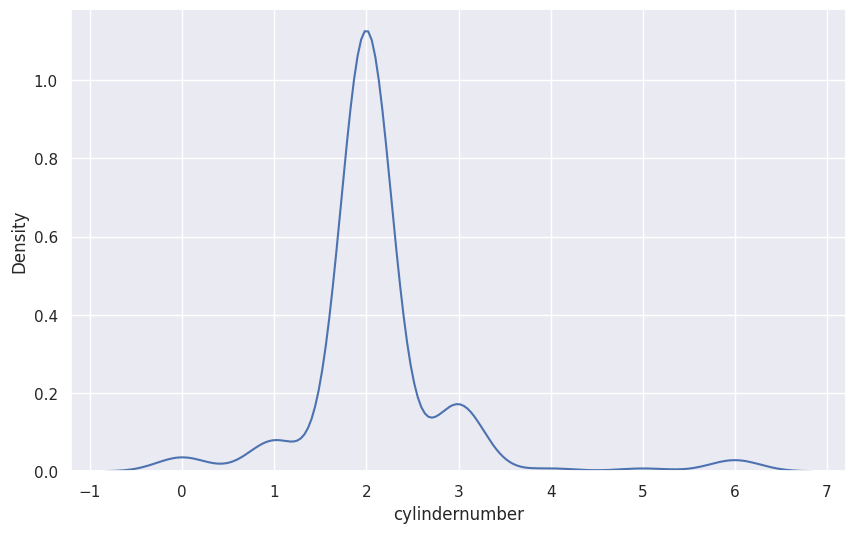

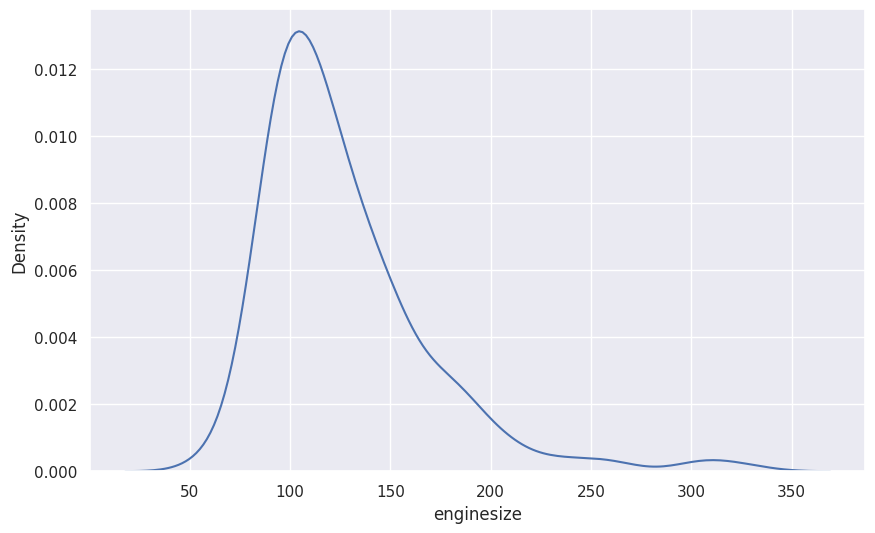

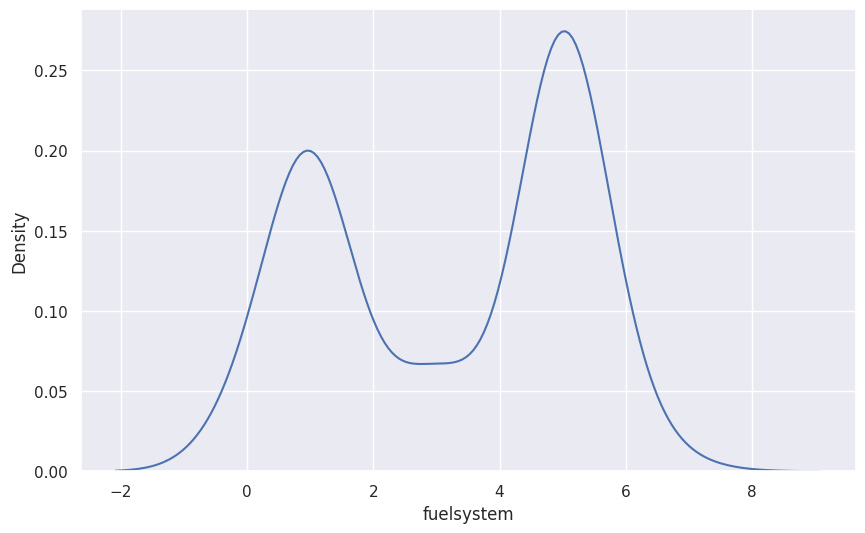

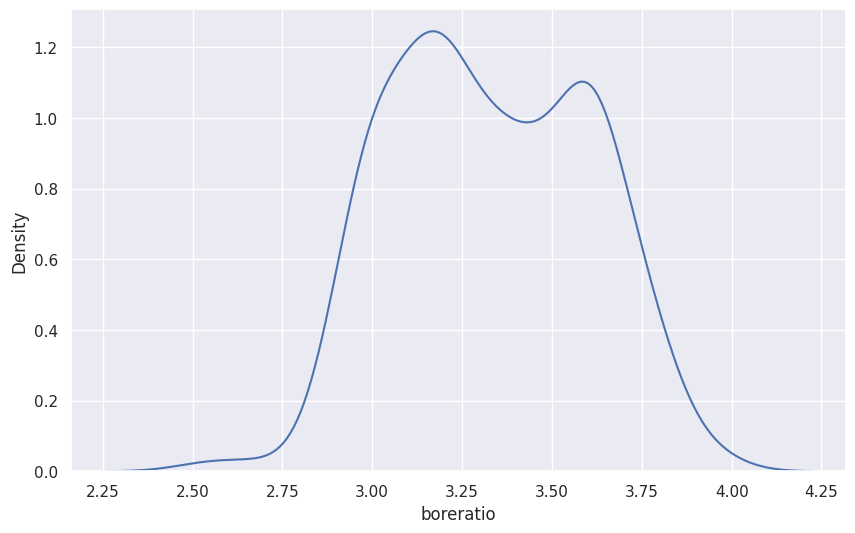

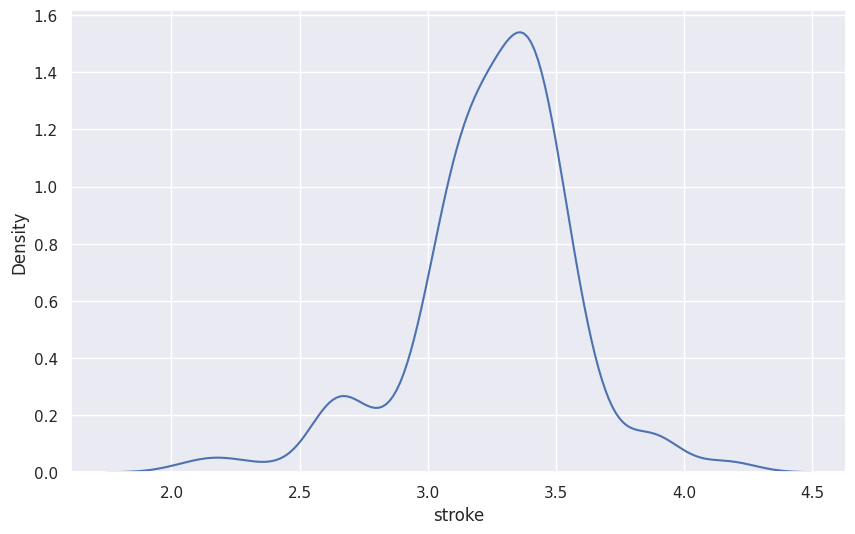

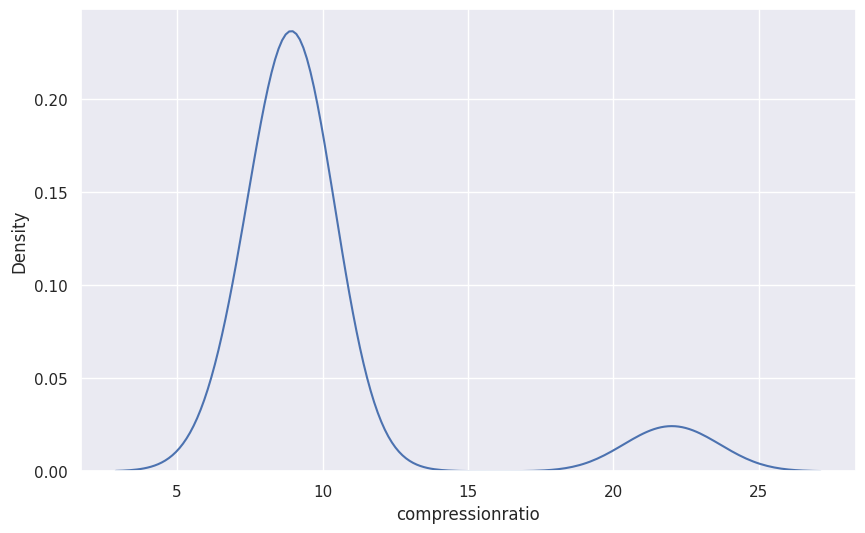

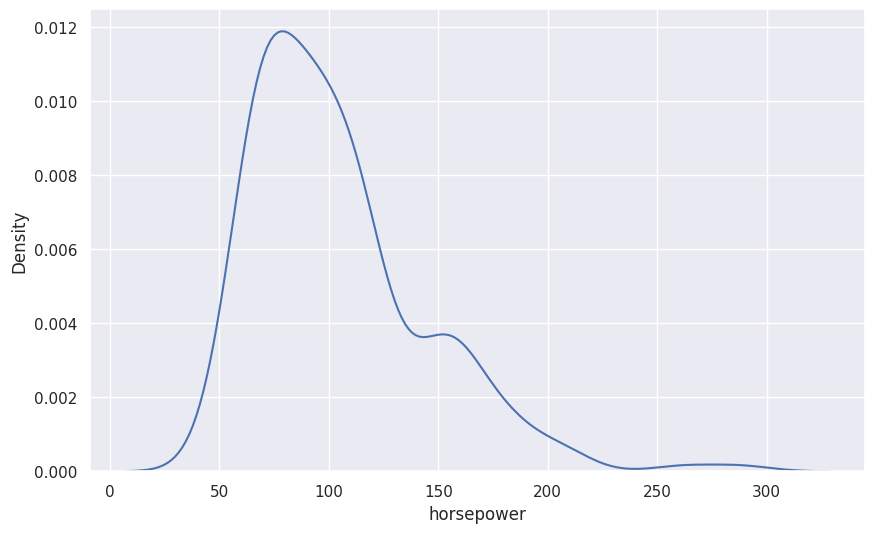

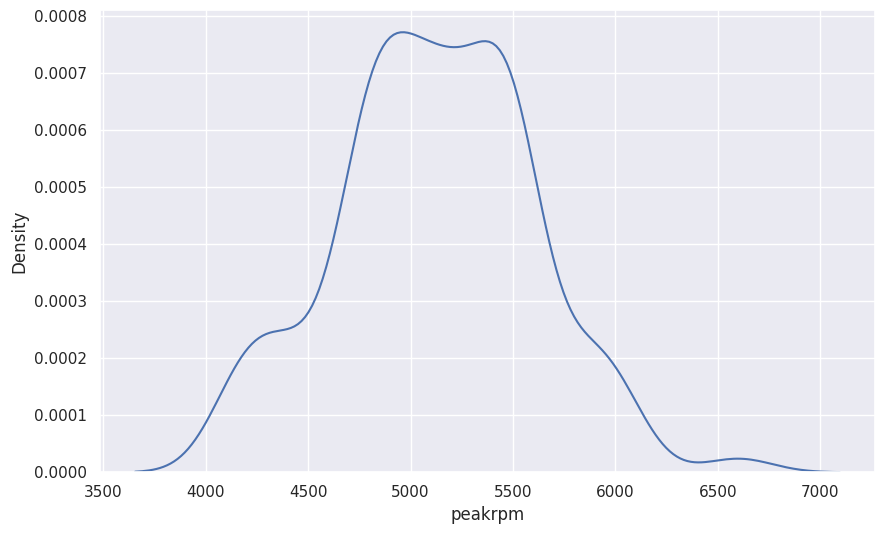

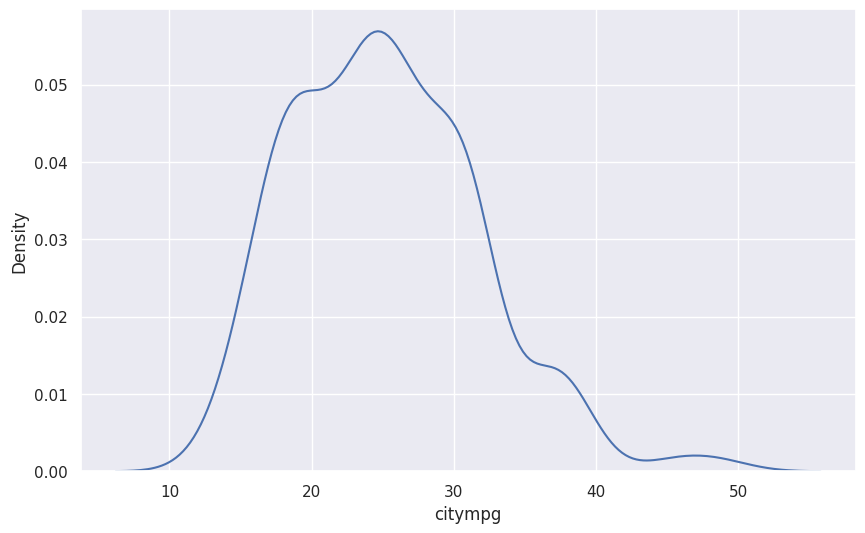

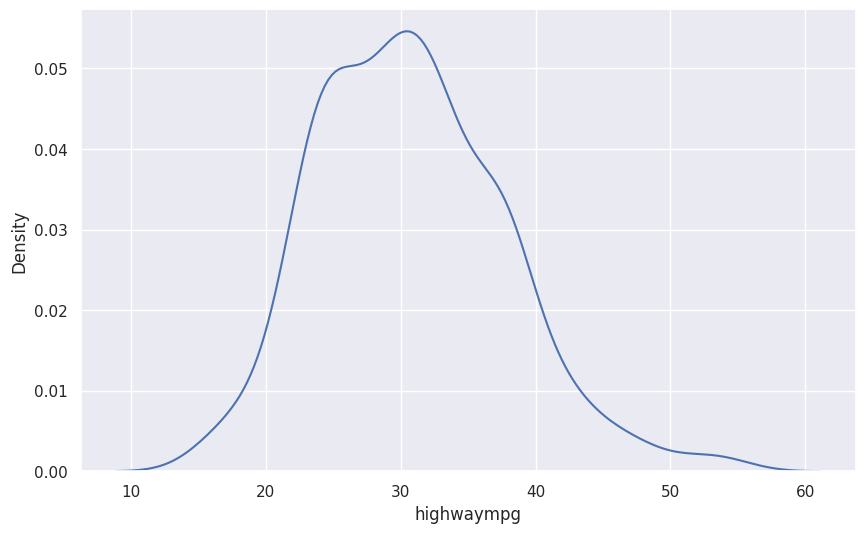

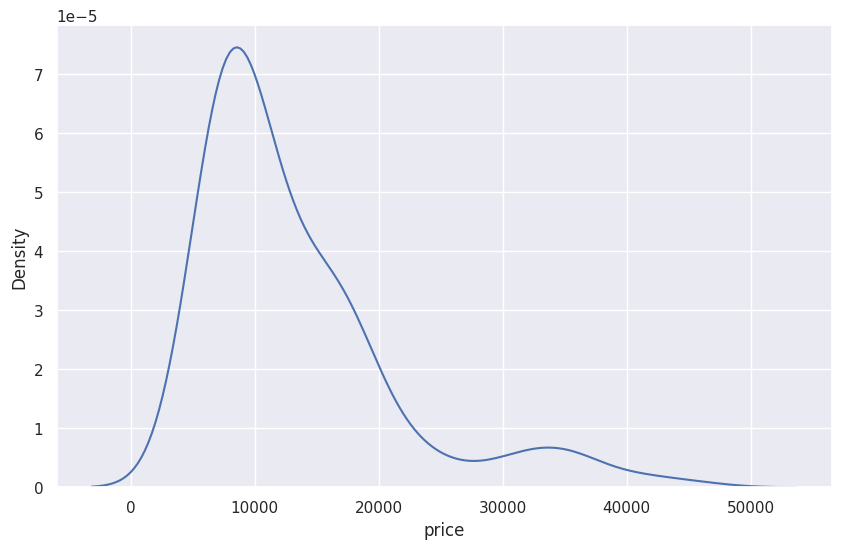

In [ ]:
for i in df.columns:
    plt.figure(figsize=[10,6])
    sns.kdeplot(x=i,data=df)

In [ ]:
df.skew()

symboling           0.211072
CarName             0.000000
fueltype           -2.732619
aspiration          1.673832
doornumber          0.247552
carbody            -0.665301
drivewheel         -0.058352
enginelocation      8.143531
wheelbase           1.050214
carlength           0.155954
carwidth            0.904003
carheight           0.063123
curbweight          0.681398
enginetype         -0.535603
cylindernumber      2.144253
enginesize          1.947655
fuelsystem         -0.242995
boreratio           0.020156
stroke             -0.689705
compressionratio    2.610862
horsepower          1.405310
peakrpm             0.075159
citympg             0.663704
highwaympg          0.539997
price               1.777678
dtype: float64

In [ ]:
df1 = np.sqrt(df)

df1.head(15)

symboling  CarName  fueltype  aspiration  doornumber   carbody  \
0    1.732051      0.0       1.0         0.0         1.0  0.000000   
1    1.732051      0.0       1.0         0.0         1.0  0.000000   
2    1.000000      0.0       1.0         0.0         1.0  1.414214   
3    1.414214      0.0       1.0         0.0         0.0  1.732051   
4    1.414214      0.0       1.0         0.0         0.0  1.732051   
5    1.414214      0.0       1.0         0.0         1.0  1.732051   
6    1.000000      0.0       1.0         0.0         0.0  1.732051   
7    1.000000      0.0       1.0         0.0         0.0  2.000000   
8    1.000000      0.0       1.0         1.0         0.0  1.732051   
9    0.000000      0.0       1.0         1.0         1.0  1.414214   
10   1.414214      0.0       1.0         0.0         1.0  1.732051   
11   0.000000      0.0       1.0         0.0         0.0  1.732051   
12   0.000000      0.0       1.0         0.0         1.0  1.732051   
13   0.000000      0.0       1.0         0.0         0.0  1.732051   
14   1.000000      0.0       1.0         0.0         0.0  1.732051   

    drivewheel  enginelocation  wheelbase  carlength  ...  enginesize  \
0     1.414214             0.0   9.412757  12.992305  ...   11.401754   
1     1.414214             0.0   9.412757  12.992305  ...   11.401754   
2     1.414214             0.0   9.721111  13.084342  ...   12.328828   
3     1.000000             0.0   9.989995  13.289093  ...   10.440307   
4     0.000000             0.0   9.969955  13.289093  ...   11.661904   
5     1.000000             0.0   9.989995  13.315405  ...   11.661904   
6     1.000000             0.0  10.285913  13.881643  ...   11.661904   
7     1.000000             0.0  10.285913  13.881643  ...   11.661904   
8     1.000000             0.0  10.285913  13.881643  ...   11.445523   
9     0.000000             0.0   9.974969  13.349157  ...   11.445523   
10    1.414214             0.0  10.059821  13.296616  ...   10.392305   
11    1.414214             0.0  10.059821  13.296616  ...   10.392305   
12    1.414214             0.0  10.059821  13.296616  ...   12.806248   
13    1.414214             0.0  10.059821  13.296616  ...   12.806248   
14    1.414214             0.0  10.173495  13.747727  ...   12.806248   

    fuelsystem  boreratio    stroke  compressionratio  horsepower    peakrpm  \
0     2.236068   1.862794  1.637071          3.000000   10.535654  70.710678   
1     2.236068   1.862794  1.637071          3.000000   10.535654  70.710678   
2     2.236068   1.637071  1.862794          3.000000   12.409674  70.710678   
3     2.236068   1.786057  1.843909          3.162278   10.099505  74.161985   
4     2.236068   1.786057  1.843909          2.828427   10.723805  74.161985   
5     2.236068   1.786057  1.843909          2.915476   10.488088  74.161985   
6     2.236068   1.786057  1.843909          2.915476   10.488088  74.161985   
7     2.236068   1.786057  1.843909          2.915476   10.488088  74.161985   
8     2.236068   1.769181  1.843909          2.880972   11.832160  74.161985   
9     2.236068   1.769181  1.843909          2.645751   12.649111  74.161985   
10    2.236068   1.870829  1.673320          2.966479   10.049876  76.157731   
11    2.236068   1.870829  1.673320          2.966479   10.049876  76.157731   
12    2.236068   1.819341  1.786057          3.000000   11.000000  65.192024   
13    2.236068   1.819341  1.786057          3.000000   11.000000  65.192024   
14    2.236068   1.819341  1.786057          3.000000   11.000000  65.192024   

     citympg  highwaympg       price  
0   4.582576    5.196152  116.167982  
1   4.582576    5.196152  128.452326  
2   4.358899    5.099020  128.452326  
3   4.898979    5.477226  118.110118  
4   4.242641    4.690416  132.098448  
5   4.358899    5.000000  123.490890  
6   4.358899    5.000000  133.078924  
7   4.358899    5.000000  137.549991  
8   4.123106    4.472136  154.515371  
9   4.000000    4.690416  133.638194  
10  

In [ ]:
df1.skew()

symboling          -0.136772
CarName             0.000000
fueltype           -2.732619
aspiration          1.673832
doornumber          0.247552
carbody            -2.483079
drivewheel         -1.716906
enginelocation      8.143531
wheelbase           0.966772
carlength           0.055254
carwidth            0.859087
carheight           0.011167
curbweight          0.473846
enginetype         -2.619189
cylindernumber     -1.562349
enginesize          1.364372
fuelsystem         -0.722430
boreratio          -0.056920
stroke             -0.970015
compressionratio    2.505819
horsepower          0.899857
peakrpm            -0.064354
citympg             0.316761
highwaympg          0.208411
price               1.204620
dtype: float64

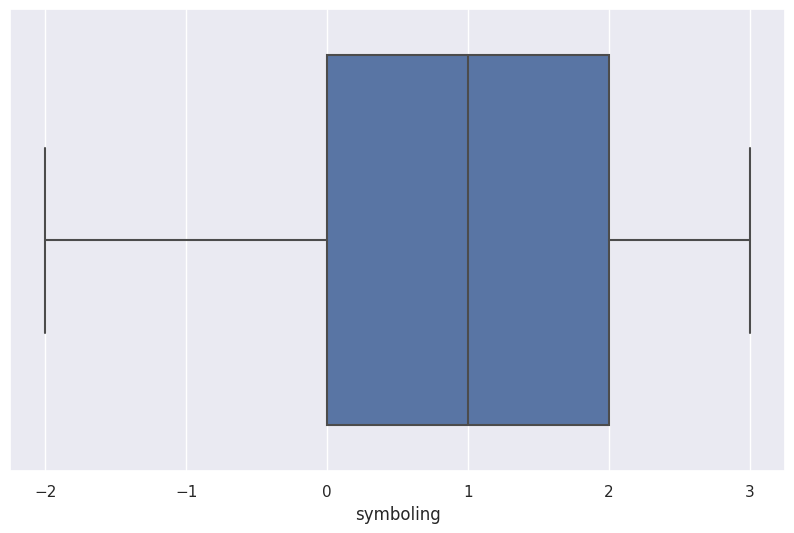

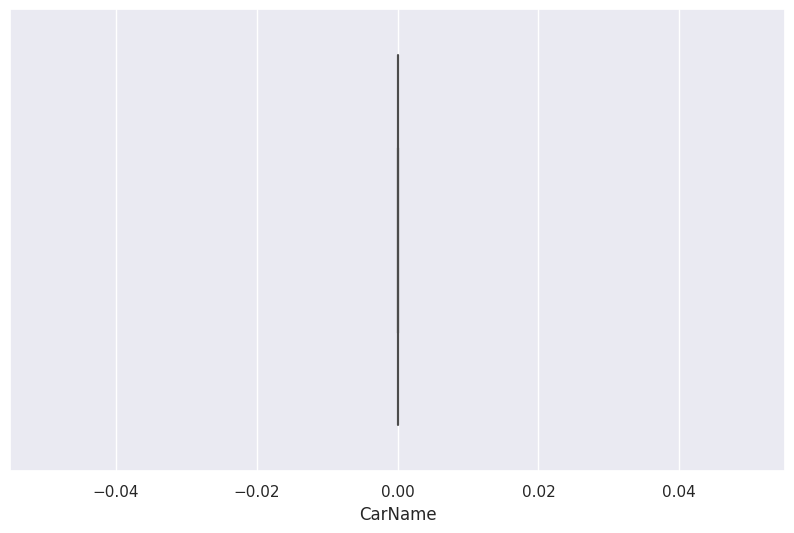

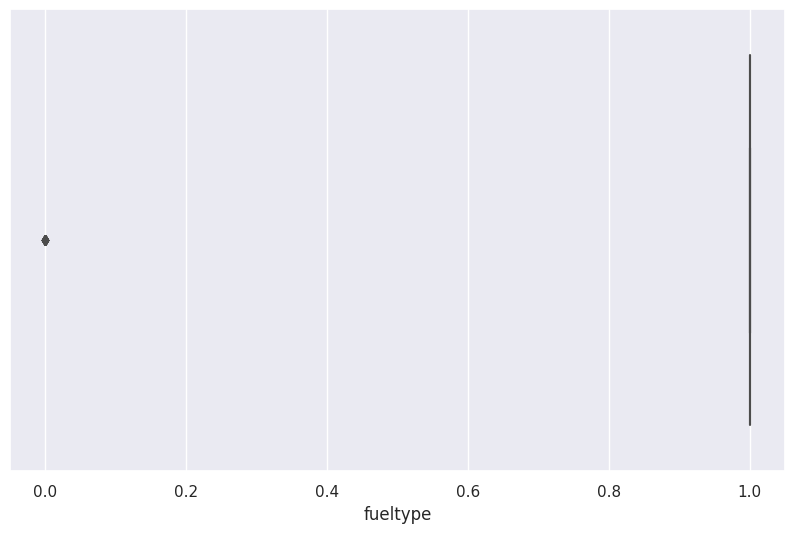

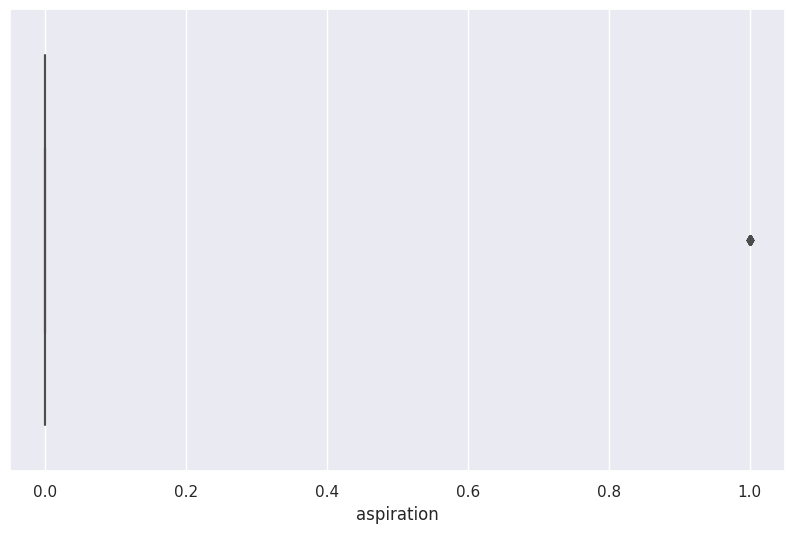

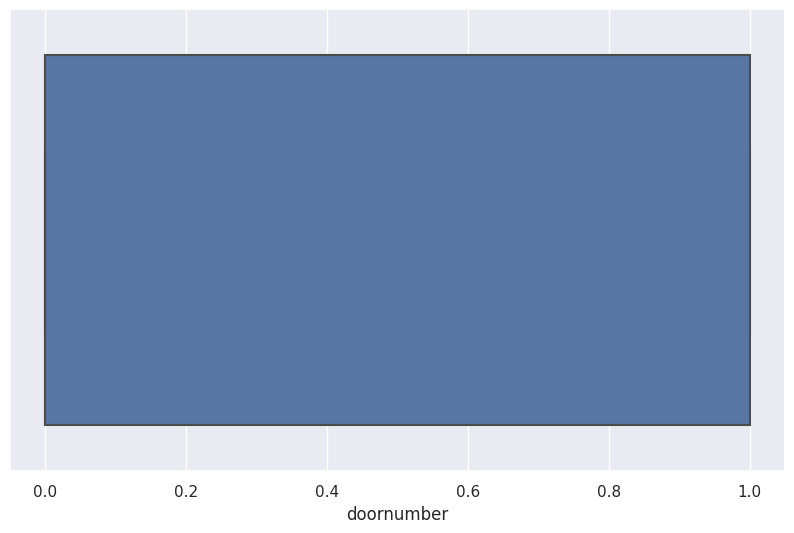

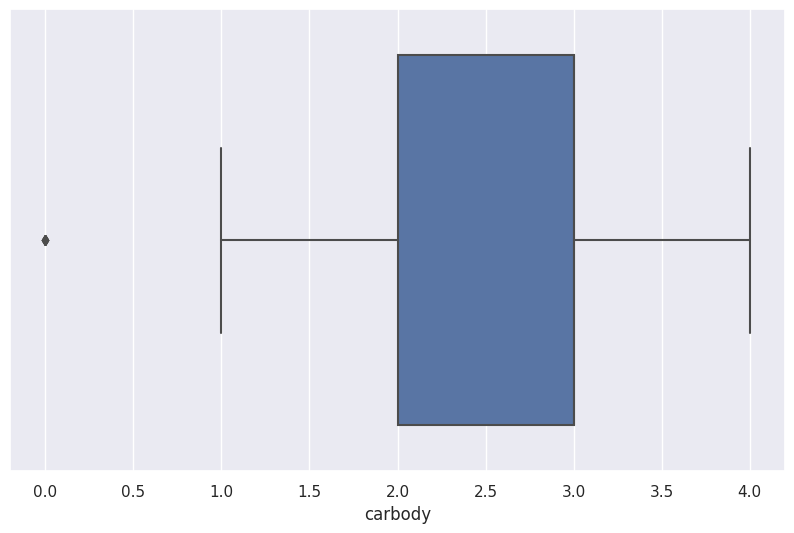

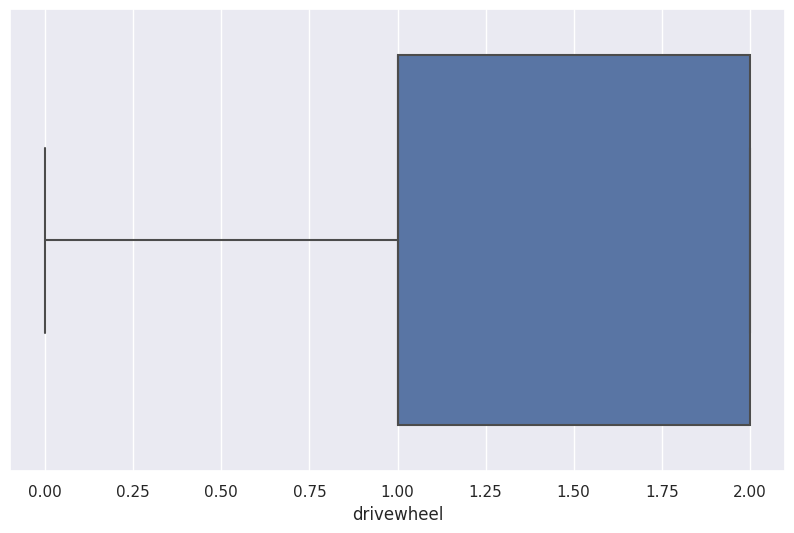

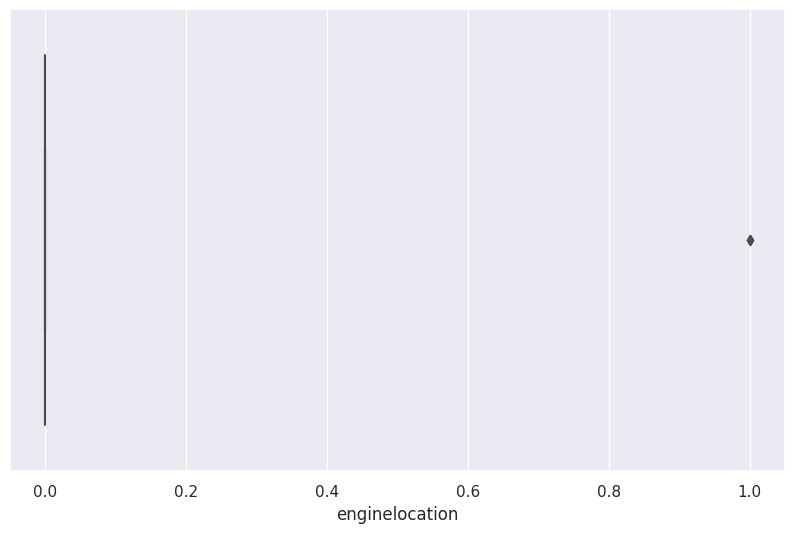

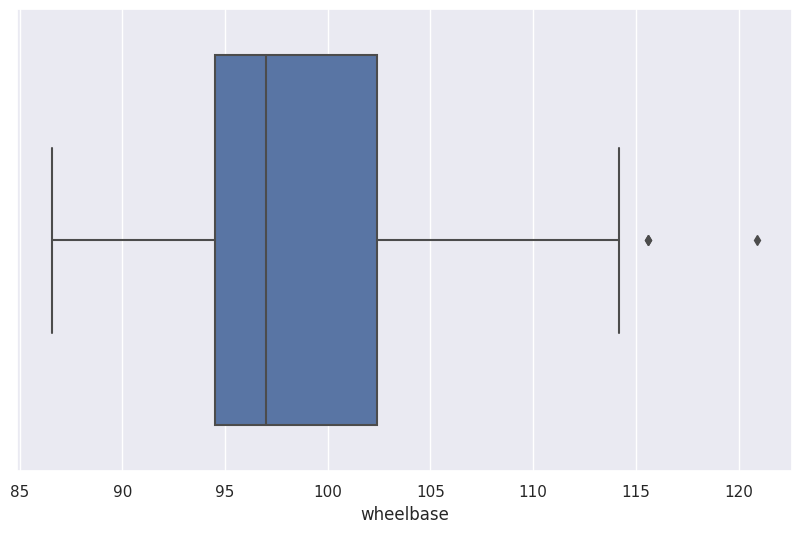

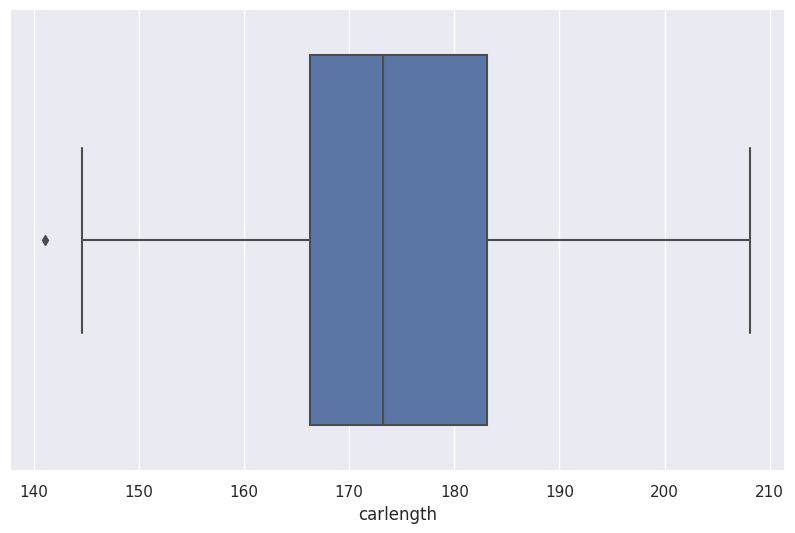

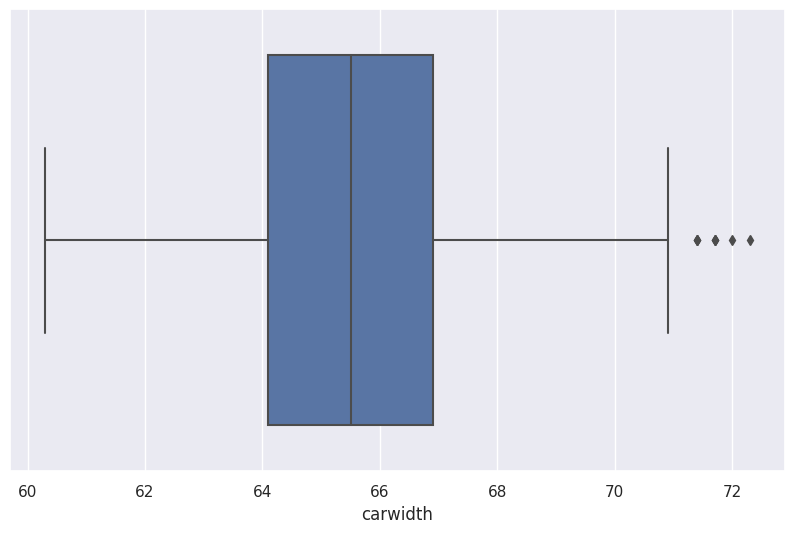

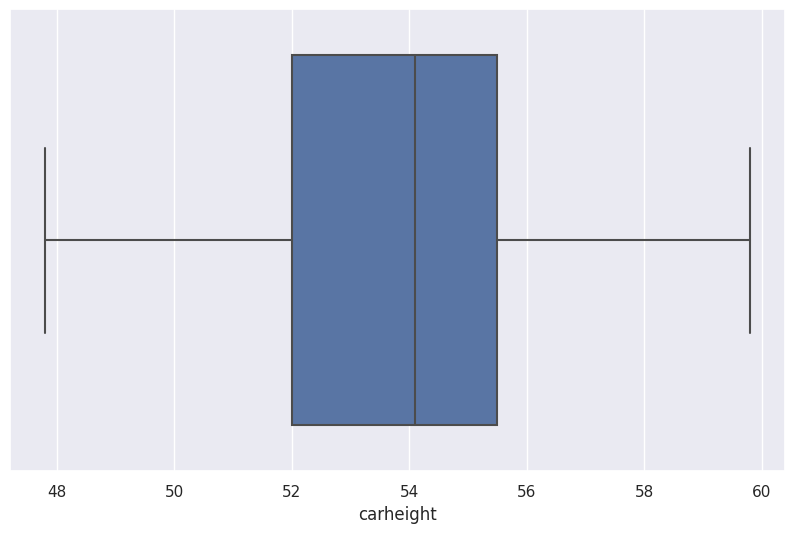

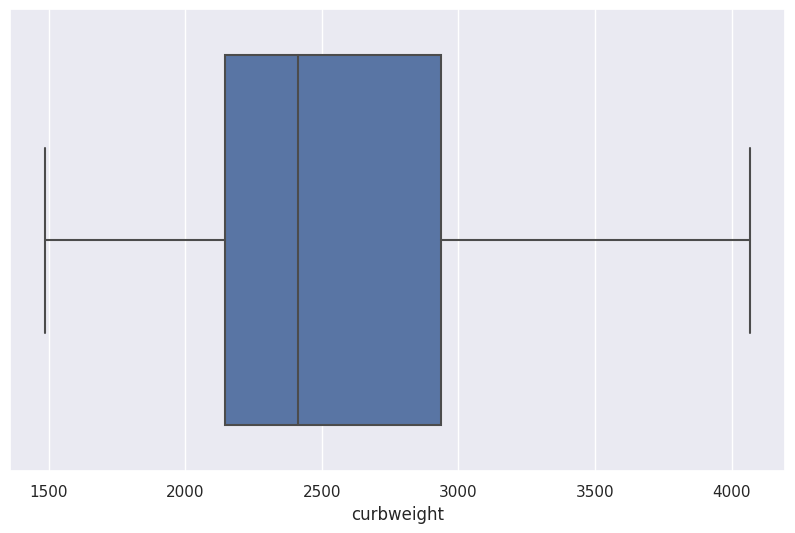

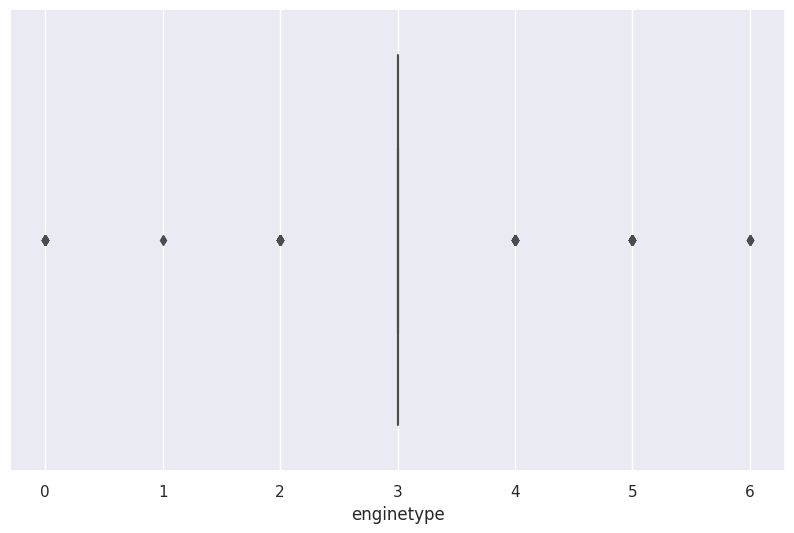

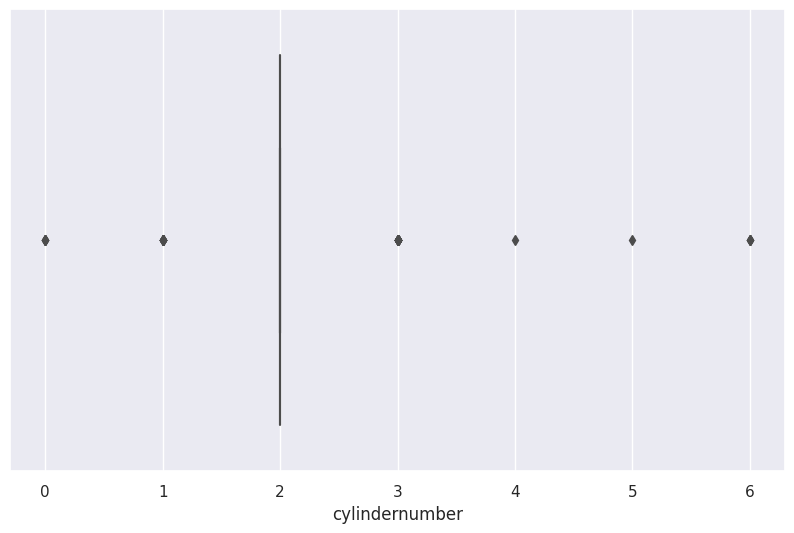

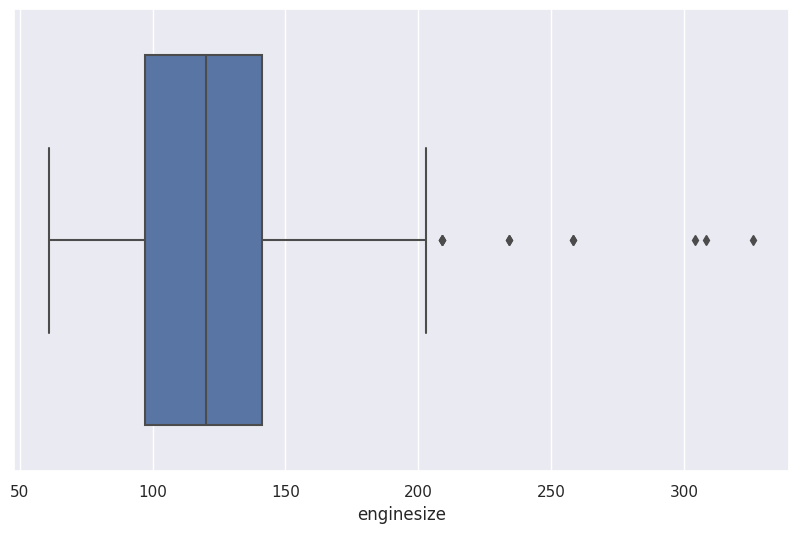

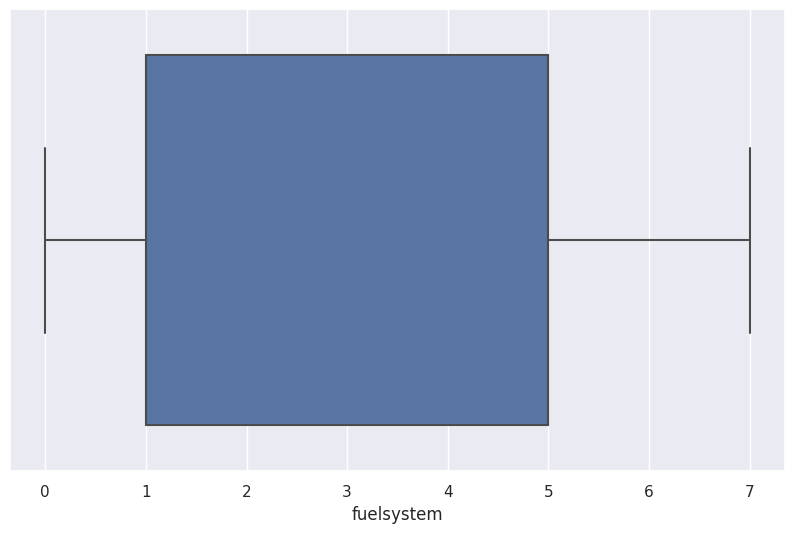

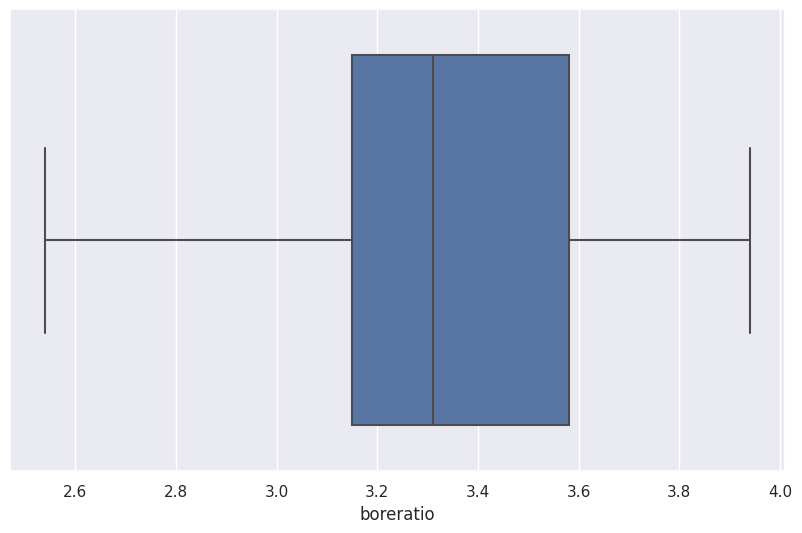

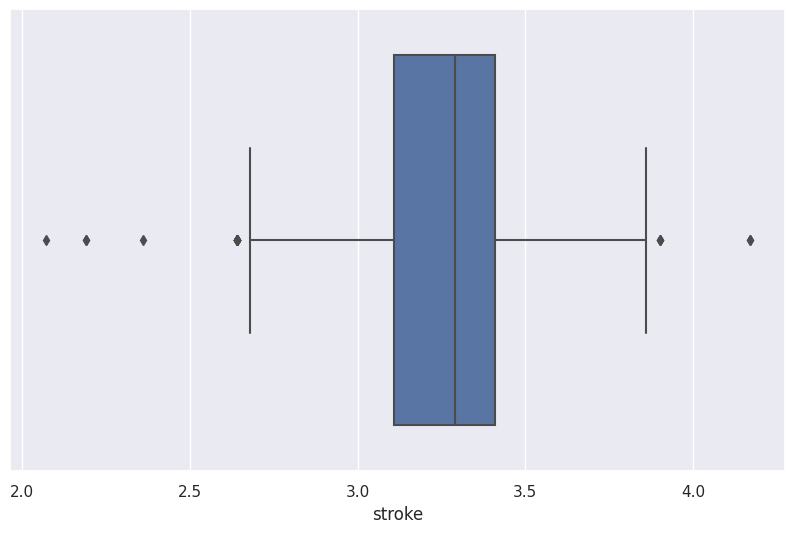

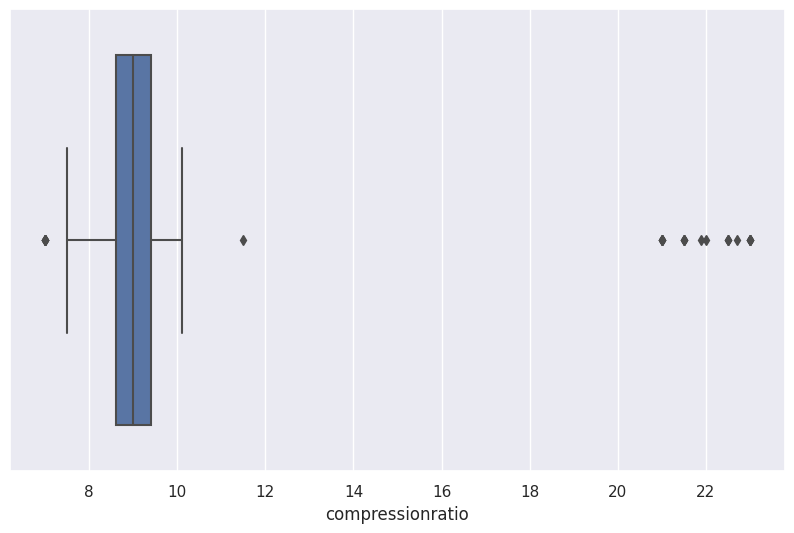

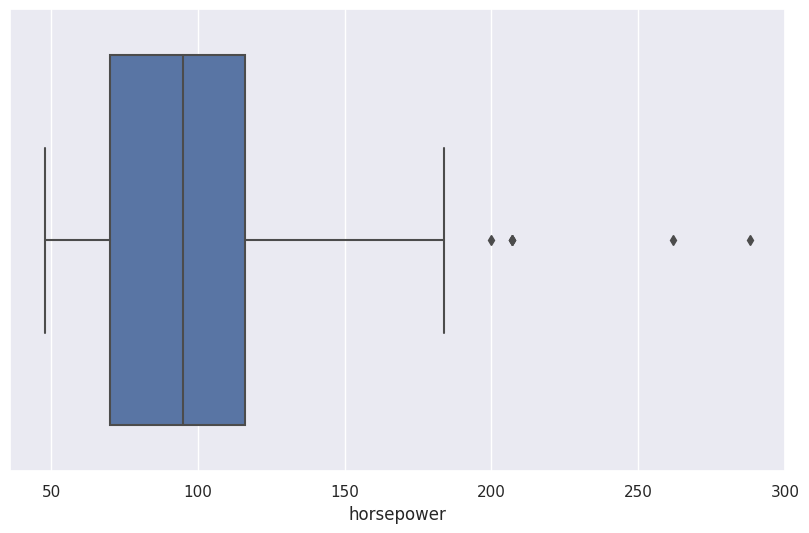

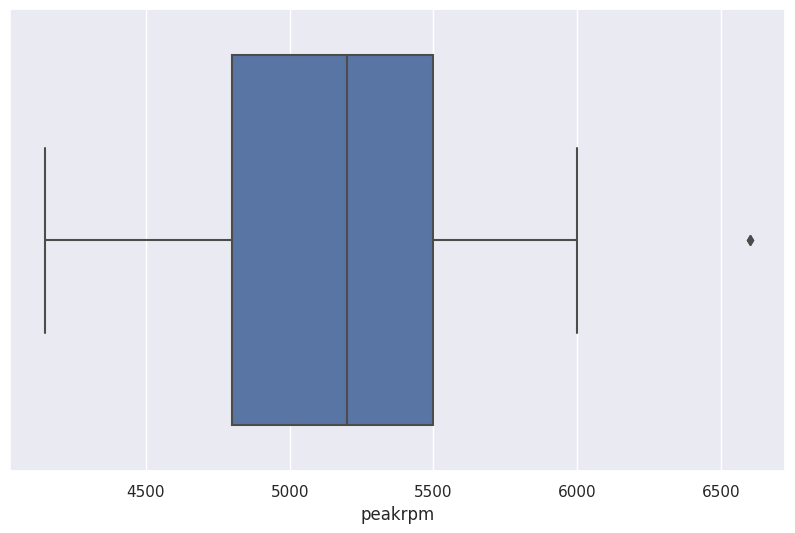

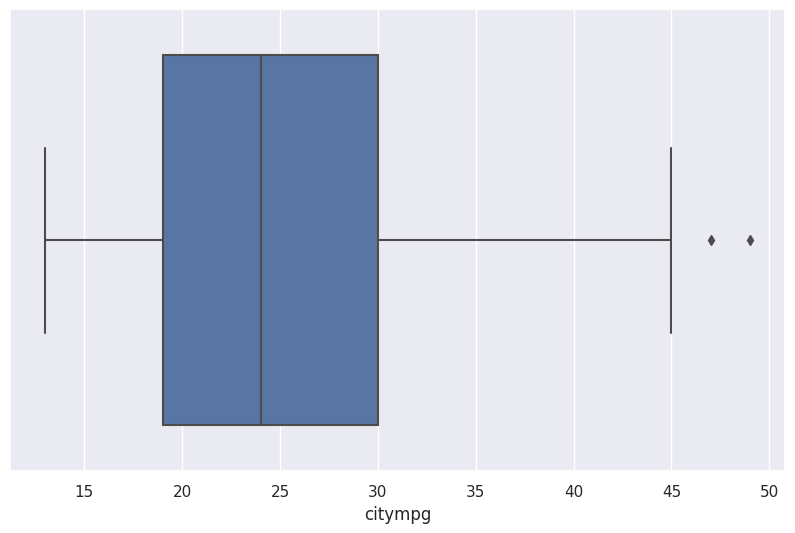

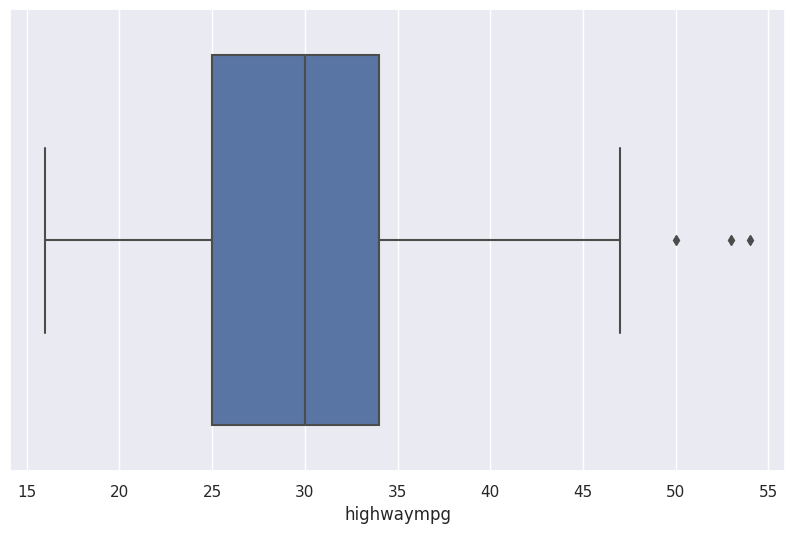

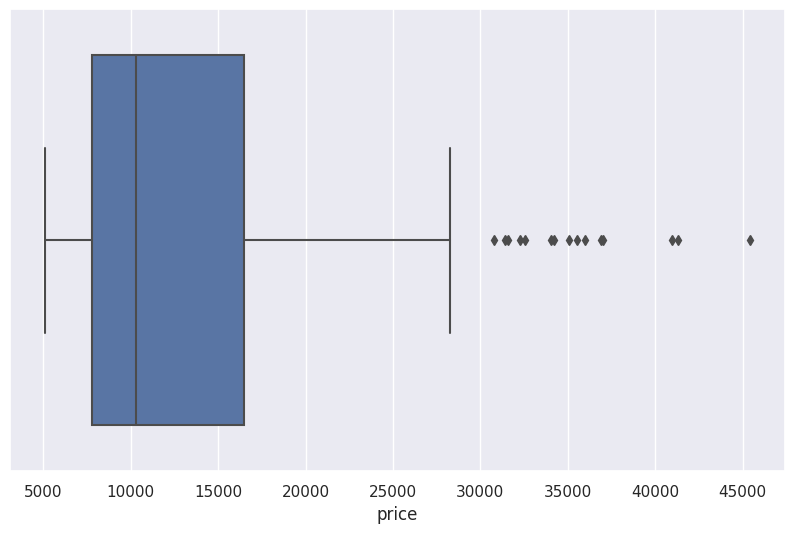

In [ ]:
for i in df.columns:
    plt.figure(figsize=[10,6])
    sns.boxplot(x=i,data=df)

In [ ]:
from scipy import stats
import numpy as np
print("Old Shape: ", df.shape)
z = np.abs(stats.zscore(df))
print(z)

Old Shape:  (205, 25)
     symboling  CarName  fueltype  aspiration  doornumber   carbody  \
0     1.743470      NaN  0.328798    0.469295    1.130388  3.050975   
1     1.743470      NaN  0.328798    0.469295    1.130388  3.050975   
2     0.133509      NaN  0.328798    0.469295    1.130388  0.717207   
3     0.938490      NaN  0.328798    0.469295    0.884652  0.449677   
4     0.938490      NaN  0.328798    0.469295    0.884652  0.449677   
..         ...      ...       ...         ...         ...       ...   
200   1.476452      NaN  0.328798    0.469295    0.884652  0.449677   
201   1.476452      NaN  0.328798    2.130854    0.884652  0.449677   
202   1.476452      NaN  0.328798    0.469295    0.884652  0.449677   
203   1.476452      NaN  3.041381    2.130854    0.884652  0.449677   
204   1.476452      NaN  0.328798    2.130854    0.884652  0.449677   

     drivewheel  enginelocation  wheelbase  carlength  ...  enginesize  \
0      1.213330        0.121867   1.690772   0.4265

In [ ]:
threshold = 3
print(np.where(z > 3))

(array([  0,   1,  16,  18,  18,  30,  30,  47,  48,  49,  49,  49,  55,
        56,  57,  58,  63,  63,  66,  67,  68,  69,  70,  72,  73,  73,
        73,  74,  74,  90,  90, 108, 110, 111, 112, 113, 114, 116, 126,
       127, 128, 128, 129, 134, 158, 158, 159, 159, 165, 166, 172, 174,
       174, 182, 182, 184, 184, 187, 187, 189, 192, 192, 203, 203]), array([ 5,  5, 24, 22, 23, 22, 23, 15, 15, 14, 15, 20, 14, 14, 14, 14,  2,
       19,  2,  2,  2,  2,  2,  5,  8, 15, 24, 15, 24,  2, 22,  2,  2, 18,
        2, 18,  2,  2,  7,  7,  5,  7, 20, 18,  2, 19,  2, 19, 21, 21,  5,
        2, 19,  2, 19,  2, 19,  2, 19,  5,  2, 19,  2, 19]))


In [ ]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(205, 25)
(0, 25)


In [ ]:
loss_percent=(205-159)/205*100
print(loss_percent)

22.439024390243905


In [ ]:
x= df.drop(columns='price')
y= df['price']
x= pd.get_dummies(x, prefix_sep="_")
x.head()

symboling  CarName  fueltype  aspiration  doornumber  carbody  drivewheel  \
0          3        0         1           0           1        0           2   
1          3        0         1           0           1        0           2   
2          1        0         1           0           1        2           2   
3          2        0         1           0           0        3           1   
4          2        0         1           0           0        3           0   

   enginelocation  wheelbase  carlength  ...  cylindernumber  enginesize  \
0               0       88.6      168.8  ...               2         130   
1               0       88.6      168.8  ...               2         130   
2               0       94.5      171.2  ...               3         152   
3               0       99.8      176.6  ...               2         109   
4               0       99.4      176.6  ...               1         136   

   fuelsystem  boreratio  stroke  compressionratio  horsepower  peakrpm  \
0           5       3.47    2.68               9.0         111     5000   
1           5       3.47    2.68               9.0         111     5000   
2           5       2.68    3.47               9.0         154     5000   
3           5       3.19    3.40              10.0         102     5500   
4           5       3.19    3.40               8.0         115     5500   

   citympg  highwaympg  
0       21          27  
1       21          27  
2       19          26  
3       24          30  
4       18          22  

[5 rows x 24 columns]

In [ ]:
x.shape

(205, 24)

In [ ]:
y.shape

(205,)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=47)

In [ ]:
#data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

#fit scaler on training data
norm = MinMaxScaler().fit(x_train)

#transform training data
x_train_norm = norm.transform(x_train)

#transform testing dataabs
x_test_norm = norm.transform(x_test)
x_test=pd.DataFrame(x_test_norm)
x_train=pd.DataFrame(x_train_norm)

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [ ]:
maxAcc = 0
maxRs = 0

for i in range(0, 100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=i)

    # Scale the features
    scaler = StandardScaler()
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)

    lm = LinearRegression(fit_intercept=True)
    lm.fit(x_train_scaled, y_train)
    pred = lm.predict(x_test_scaled)
    acc = r2_score(y_test, pred)

    print('accuracy', acc, 'random_state', i)

    if acc > maxAcc:
        maxAcc = acc
        maxRs = i

    print('max accuracy', maxAcc, 'random_state', maxRs)

print('Best accuracy is', maxAcc, 'on random_state', maxRs)

accuracy 0.7964399470768003 random_state 0
max accuracy 0.7964399470768003 random_state 0
accuracy 0.8048477007852498 random_state 1
max accuracy 0.8048477007852498 random_state 1
accuracy 0.7443336667067669 random_state 2
max accuracy 0.8048477007852498 random_state 1
accuracy 0.853767030207373 random_state 3
max accuracy 0.853767030207373 random_state 3
accuracy 0.7882639730035514 random_state 4
max accuracy 0.853767030207373 random_state 3
accuracy 0.9015868891571419 random_state 5
max accuracy 0.9015868891571419 random_state 5
accuracy 0.7692048006828449 random_state 6
max accuracy 0.9015868891571419 random_state 5
accuracy 0.863632805213685 random_state 7
max accuracy 0.9015868891571419 random_state 5
accuracy 0.8260948184875481 random_state 8
max accuracy 0.9015868891571419 random_state 5
accuracy 0.8832496455924506 random_state 9
max accuracy 0.9015868891571419 random_state 5
accuracy 0.7140267788870962 random_state 10
max accuracy 0.9015868891571419 random_state 5
accuracy 0.72

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=64)

In [ ]:
#LinearRegression
LR=LinearRegression()
LR.fit(x_train,y_train)
print(LR.score(x_train,y_train))
LR_predict=LR.predict(x_test)

0.8618169151036015


In [ ]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,LR_predict))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,LR_predict))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,LR_predict)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,LR_predict))
print('r2_score:',r2_score(y_test,LR_predict))

Mean Absolute Error:  1928.5274019969568
Mean Squared Error:  6719195.275911971
Root Mean Squared Error:  2592.1410601878847
Explained Variance Score:  0.9206386160402382
r2_score: 0.9202039781666527


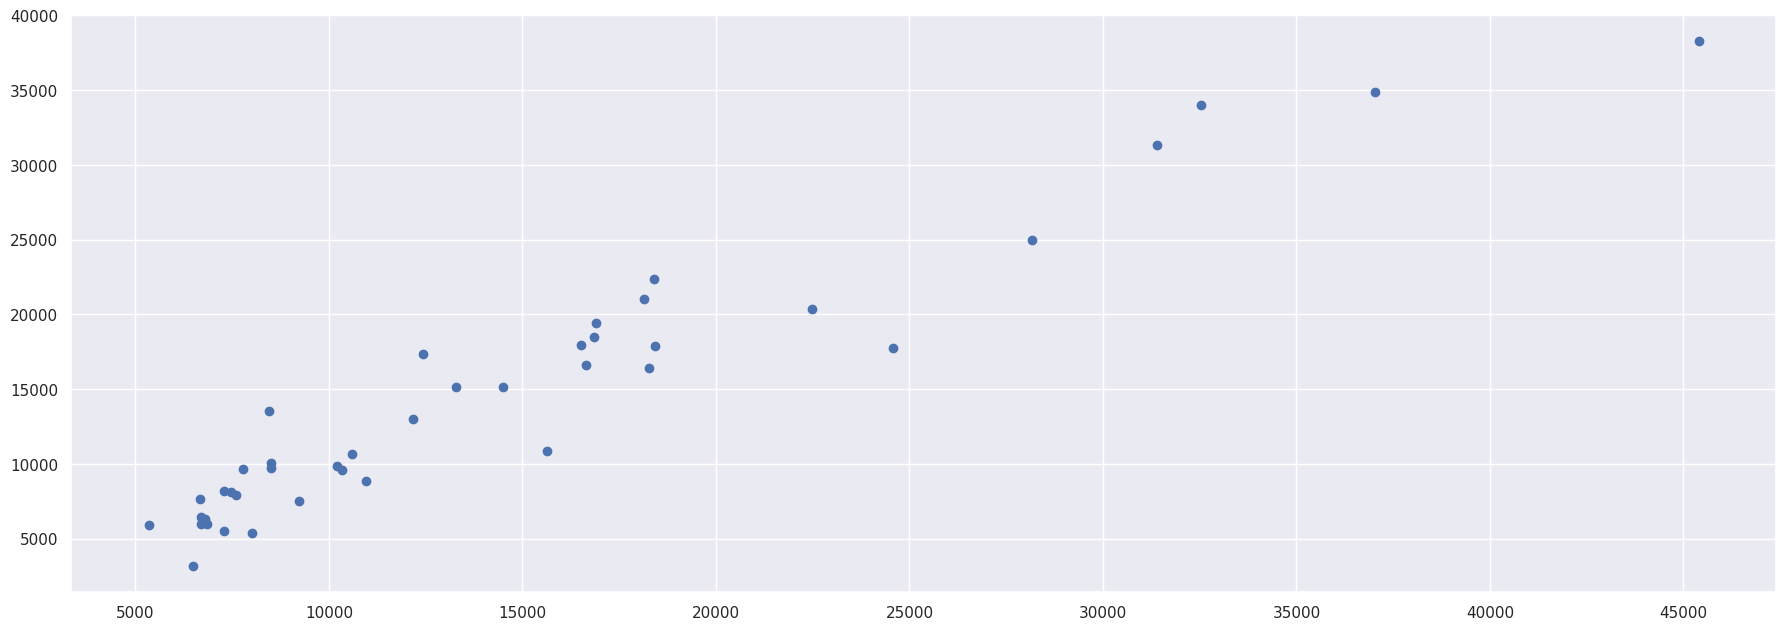

In [ ]:
#C-V Score
ln_cv=cross_val_score(LR,x,y, cv = 4).mean()
ln_cv

plt.scatter(y_test,LR_predict)

In [ ]:
#RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
predictions1=rf.predict(x_test)
print(rf.score(x_train,y_train))

0.9872593275611848


In [ ]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,predictions1))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,predictions1))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,predictions1)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,predictions1))
print('r2_score:',r2_score(y_test,predictions1))

Mean Absolute Error:  1506.7313455284554
Mean Squared Error:  5419118.886850382
Root Mean Squared Error:  2327.9001024207164
Explained Variance Score:  0.9390500105179839
r2_score: 0.9356434645436128


In [ ]:
#C-V score
rfr_cv=cross_val_score(rf,x,y, cv = 4).mean()
rfr_cv

0.7944574419069186

In [ ]:
#DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
print(DTR.score(x_train,y_train))
DTR_PRED=DTR.predict(x_test)

0.9987436507155357


In [ ]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,DTR_PRED))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,DTR_PRED))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,DTR_PRED)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,DTR_PRED))
print('r2_score:',r2_score(y_test,DTR_PRED))

Mean Absolute Error:  2282.8536585365855
Mean Squared Error:  11652920.548780488
Root Mean Squared Error:  3413.637436632732
Explained Variance Score:  0.8661043432613238
r2_score: 0.8616118948252262


In [ ]:
#C-V score
DTR_cv=cross_val_score(DTR,x,y, cv = 4).mean()
DTR_cv


0.6344339180508234